In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
def train_test_split(df, train_ratio, X, y, random = False, dtrain = False):
    """
    Argument
    df : DataFrame object
    train_ratio : float, in range(0,1)
    X : sequence data, such as list, tuple (Train Features)
    y : str
    random : boolean, you need "numpy" library cause we use np.random.permutation function.
    
    Return
    train : 학습시킬 Feature data
    train_idx : 지도학습의 Y value
    test : test 검증할 Feature data
    test_idx : test set의 Y value
    """
    train_size = int(len(df)*train_ratio)
    if random:
        shuffle_indicies = np.random.permutation(len(df))
        train_indicies = shuffle_indicies[:train_size]
        test_indicies = shuffle_indicies[train_size:]
    else:
        normal_indicies = np.arange(len(df))
        train_indicies = normal_indicies[:train_size]
        test_indicies = normal_indicies[train_size:]
    if dtrain:
        train = df.iloc[:train_size]
        train_idx = df.iloc[:train_size]
        test = df.iloc[train_size:]
        test_idx = df.iloc[train_size:]
    else:
        train = df.iloc[:train_size][X]
        train_idx = df.iloc[:train_size][y]
        test = df.iloc[train_size:][X]
        test_idx = df.iloc[train_size:][y]
    return train, train_idx, test, test_idx

In [3]:
kospi200 = pd.read_csv("./data/data.csv", encoding="cp949")
kospi200 = kospi200[kospi200.columns[:2]]
kospi200["종목코드"] = kospi200["종목코드"].map('{:06d}'.format)

name_dict = { i : j for i, j in zip(kospi200["종목명"], kospi200["종목코드"]) }
code_dict = { j : i for i, j in zip(kospi200["종목명"], kospi200["종목코드"]) }

In [4]:
import pickle
with open('raw_data_20180824.pickle','rb') as handle:
    raw_data = pickle.load(handle)

In [5]:
raw_data[name_dict['SK하이닉스']].loc['2012-01-01':'2018-07-31']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,22700.0,23500.0,22600.0,23450.0,22316.296875,12110276
2012-01-03,23700.0,23850.0,23350.0,23650.0,22506.626953,7179120
2012-01-04,23850.0,24350.0,23650.0,23850.0,22696.957031,9592895
2012-01-05,23900.0,24550.0,23700.0,24000.0,22839.707031,5926606
2012-01-06,24450.0,24550.0,24050.0,24400.0,23220.367188,7607761
2012-01-09,24550.0,24600.0,23800.0,23850.0,22696.957031,5168117
2012-01-10,24050.0,24350.0,23850.0,24350.0,23172.785156,4564072
2012-01-11,24400.0,24700.0,24100.0,24250.0,23077.621094,4729192
2012-01-12,24200.0,24350.0,23850.0,24150.0,22982.455078,3547966


In [6]:
raw_data[name_dict['삼성전자']].tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-07-26,46100.0,47000.0,46000.0,46900.0,46900.0,7374946
2018-07-27,46450.0,47000.0,46450.0,46900.0,46900.0,4762460
2018-07-30,46550.0,46800.0,46350.0,46500.0,46500.0,5723035
2018-07-31,46200.0,46450.0,46000.0,46250.0,46250.0,8033607
2018-08-01,46050.0,46850.0,46050.0,46550.0,46550.0,7484499


In [7]:
party_df = pd.read_csv('party_df.csv')

In [8]:
party_df["종목코드"] = party_df["종목코드"].map('{:06d}'.format)

In [9]:
party_df.head()

,업종,영문코드,종목명,종목코드,시가총액,income
0,정보기술,SEC,삼성전자,005930,296893767375000,high
1,정보기술,SKH,SK하이닉스,000660,62826604099500,high
2,헬스케어,CTRN,셀트리온,068270,34044987664500,high
3,철강소재,POSCO,POSCO,005490,28815248967500,high
4,경기소비재,HMC,현대차,005380,28525804030500,high


In [10]:
del_list = []
for key, df in raw_data.items():
    if len(df) < 252*2:
        del_list.append(key)
for code in del_list:
    del raw_data[code]

In [11]:
print([code_dict[i] for i in del_list],end=" ")

['BGF리테일', 'HDC현대산업개발', 'SK케미칼', '넷마블', '두산밥캣', '삼성바이오로직스', '오리온', '현대중공업지주', '효성중공업'] 

In [12]:
party_df.income.value_counts()

middle          52
low             50
lower middle    44
high            32
upper middle    24
Name: income, dtype: int64

In [13]:
party_df['업종'].value_counts()

경기소비재    38
생활소비재    37
에너지화학    26
헬스케어     18
금융       17
정보기술     16
산업재      15
건설       14
중공업      11
철강소재     10
Name: 업종, dtype: int64

In [14]:
len(raw_data)

193

In [15]:
252**0.5

15.874507866387544

In [16]:
import sys
mod = sys.modules[__name__]
for code in raw_data.keys():
    """
    X
    """
    raw_data[code]["pct_change"] = raw_data[code].Close.pct_change().shift(1)
    for i in range(3, 31):
        raw_data[code]["close_ma_{}".format(i)] = raw_data[code].Close.rolling(window = i).mean().shift(1)
        raw_data[code]["volume_ma_{}".format(i)] =  raw_data[code].Volume.rolling(window = i).mean().shift(1)
        #raw_data[code]["close_ewm_{}".format(i)] = raw_data[code].Close.ewm(span = i).mean()
        #raw_data[code]["volume_ewm_{}".format(i)] = raw_data[code].Volume.ewm(span = i).mean()
    for i in [7, 21, 30, 60, 90, 91, 100, 120]:
        raw_data[code]["his_vol_{}".format(i)] = raw_data[code]["pct_change"].fillna(0).rolling(window = i).std().shift(1)*(252**0.5)
    """
    Y
    """
    
    raw_data[code] = raw_data[code].assign(Y1 = raw_data[code].Close - raw_data[code].close_ma_7.shift(1))
    raw_data[code] = raw_data[code].assign(Y2 =
                                           raw_data[code]["pct_change"] - raw_data[code]["pct_change"].rolling(window = 7).mean().shift(1))
    raw_data[code] = raw_data[code].assign(Y3 = raw_data[code].Close.rolling(window=7).sum().pct_change())
    
    raw_data[code] = raw_data[code].assign(Y1 = np.where(raw_data[code].Y1>=0, 1, 0))
    raw_data[code] = raw_data[code].assign(Y2 = np.where(raw_data[code].Y2>=0, 1, 0))
    raw_data[code] = raw_data[code].assign(Y3 = np.where(raw_data[code].Y3>=0, 1, 0))
    """
    Drop NaN
    """
    raw_data[code] = raw_data[code].dropna(axis=0)

In [17]:
data = {}
for code in raw_data.keys():
    data[code] = raw_data[code].copy()
    data[code]['Close'] = data[code]['Close'].shift(1)
    data[code]['High'] = data[code]['High'].shift(1)
    data[code]['Low'] = data[code]['Low'].shift(1)
    data[code]['Adj Close'] = data[code]['Adj Close'].shift(1)
    data[code]['Volume'] = data[code]['Volume'].shift(1)
    data[code] = data[code].loc['2012-01-01':'2018-07-31']
    data[code] = data[code].dropna(axis=0)

In [18]:
data[name_dict["SK하이닉스"]]

,Open,High,Low,Close,Adj Close,Volume,pct_change,close_ma_3,volume_ma_3,close_ma_4,...,his_vol_21,his_vol_30,his_vol_60,his_vol_90,his_vol_91,his_vol_100,his_vol_120,Y1,Y2,Y3
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-02,22700.0,22000.0,20950.0,21950.0,20888.814453,4985262.0,0.037825,21400.000000,3.867025e+06,21450.0,...,0.369097,0.441308,0.492708,0.611010,0.628736,0.684830,0.650790,1,1,1
2012-01-03,23700.0,23500.0,22600.0,23450.0,22316.296875,12110276.0,0.068337,22183.333333,6.585013e+06,21912.5,...,0.392657,0.441148,0.483452,0.613549,0.610192,0.686538,0.653108,1,1,1
2012-01-04,23850.0,23850.0,23350.0,23650.0,22506.626953,7179120.0,0.008529,23016.666667,8.091553e+06,22550.0,...,0.455942,0.485264,0.502126,0.608871,0.619333,0.685053,0.660692,1,0,1
2012-01-05,23900.0,24350.0,23650.0,23850.0,22696.957031,9592895.0,0.008457,23650.000000,9.627430e+06,23225.0,...,0.453246,0.482768,0.500764,0.602712,0.605520,0.673863,0.658021,1,0,1
2012-01-06,24450.0,24550.0,23700.0,24000.0,22839.707031,5926606.0,0.006289,23833.333333,7.566207e+06,23737.5,...,0.453569,0.481480,0.500347,0.594217,0.599384,0.671303,0.655293,1,0,1
2012-01-09,24550.0,24550.0,24050.0,24400.0,23220.367188,7607761.0,0.016667,24083.333333,7.709087e+06,23975.0,...,0.445883,0.444843,0.499836,0.591550,0.590916,0.668523,0.654290,1,1,1
2012-01-10,24050.0,24600.0,23800.0,23850.0,22696.957031,5168117.0,-0.022541,24083.333333,6.234161e+06,24025.0,...,0.443115,0.445511,0.496111,0.576440,0.588637,0.650195,0.654468,1,0,1
2012-01-11,24400.0,24350.0,23850.0,24350.0,23172.785156,4564072.0,0.020964,24200.000000,5.779983e+06,24150.0,...,0.447687,0.447589,0.498689,0.576364,0.574822,0.648990,0.652115,1,1,1
2012-01-12,24200.0,24700.0,24100.0,24250.0,23077.621094,4729192.0,-0.004107,24150.000000,4.820460e+06,24212.5,...,0.433875,0.402881,0.500203,0.577124,0.573918,0.645386,0.652322,1,0,1


In [20]:
train = {}
train_y = {}
test = {}
test_y = {}
for code, df in data.items():
    X_train, y_train, X_test, y_test = train_test_split(df, 0.8, predictors, target, dtrain=True)
    train[code] = X_train
    train_y[code] = y_train
    test[code] = X_test
    test_y[code] = y_test

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

gnb_clf = GaussianNB()
knn_clf = KNeighborsClassifier()
rf_clf = RandomForestClassifier(random_state=42)
dt_clf = DecisionTreeClassifier()
log_clf = LogisticRegression()
svm_clf = SVC()
xgb_clf = XGBClassifier(random_state=42)

In [22]:
import time

In [67]:
predictors = [x for x in df.columns if x not in ['Y1','Y2','Y3']]
target = "Y2"

In [68]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

clf_li = [gnb_clf, knn_clf, rf_clf, dt_clf, log_clf, svm_clf, xgb_clf]
start = time.time()
trial = 1
NB = {}
KNN = {}
RF = {}
DT = {}
LOG = {}
SVM = {}
XGB = {}
result = [NB, KNN, RF, DT, LOG, SVM, XGB]
for i in raw_data.keys():
    print("{} Predict 실시 / {}개 중 {}번째 ".format(code_dict[i], len(raw_data), trial))
    Train = train[i][predictors].values
    Train_y = train[i][target].values
    Test = test[i][predictors].values
    Test_y = test[i][target].values
    semi_start = time.time()
    for clf, res in zip(clf_li, result):
        store = []
        clf.fit(Train, Train_y)
        y_pred = clf.predict(Test)
        acc = accuracy_score(Test_y, y_pred)
        precision = precision_score(Test_y, y_pred)
        recall = recall_score(Test_y, y_pred)
        auc = roc_auc_score(Test_y, y_pred)
        f1 = f1_score(Test_y, y_pred)
        store.extend([acc, precision, recall, auc, f1])
        res[i] = store
    semi_elapse = time.time() - semi_start
    print("\t{} Predict 완료".format(code_dict[i]))
    print("\telapse time is {}".format(round(semi_elapse,2)))
    ratio = round(trial*100/len(raw_data))
    print("{} {}%".format('/'*ratio + '_'*(100-ratio), ratio))
    print("")
    trial += 1
    
elapse = time.time() - start
print("\nFinally, ")
if elapse > 60:
    elapse = elapse / 60
    print("elapse time is {} minute".format(round(elapse,2)))
elif elapse > 3600:
    elapse = elapse / 3600
    print("elapse time is {} hour".format(round(elapse,2)))
else:
    print("elapse time is {} sec".format(round(elapse,2)))

AK홀딩스 Predict 실시 / 193개 중 1번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	AK홀딩스 Predict 완료
	elapse time is 1.55
/___________________________________________________________________________________________________ 1%

BGF Predict 실시 / 193개 중 2번째 
	BGF Predict 완료
	elapse time is 0.91
/___________________________________________________________________________________________________ 1%

BNK금융지주 Predict 실시 / 193개 중 3번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	BNK금융지주 Predict 완료
	elapse time is 1.63
//__________________________________________________________________________________________________ 2%

CJ Predict 실시 / 193개 중 4번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	CJ Predict 완료
	elapse time is 1.31
//__________________________________________________________________________________________________ 2%

CJ CGV Predict 실시 / 193개 중 5번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	CJ CGV Predict 완료
	elapse time is 1.76
///_________________________________________________________________________________________________ 3%

CJ대한통운 Predict 실시 / 193개 중 6번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	CJ대한통운 Predict 완료
	elapse time is 1.72
///_________________________________________________________________________________________________ 3%

CJ제일제당 Predict 실시 / 193개 중 7번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	CJ제일제당 Predict 완료
	elapse time is 1.23
////________________________________________________________________________________________________ 4%

DB손해보험 Predict 실시 / 193개 중 8번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	DB손해보험 Predict 완료
	elapse time is 1.3
////________________________________________________________________________________________________ 4%

DB하이텍 Predict 실시 / 193개 중 9번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	DB하이텍 Predict 완료
	elapse time is 1.7
/////_______________________________________________________________________________________________ 5%

GKL Predict 실시 / 193개 중 10번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	GKL Predict 완료
	elapse time is 1.78
/////_______________________________________________________________________________________________ 5%

GS Predict 실시 / 193개 중 11번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	GS Predict 완료
	elapse time is 2.14
//////______________________________________________________________________________________________ 6%

GS건설 Predict 실시 / 193개 중 12번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	GS건설 Predict 완료
	elapse time is 2.27
//////______________________________________________________________________________________________ 6%

GS리테일 Predict 실시 / 193개 중 13번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	GS리테일 Predict 완료
	elapse time is 1.78
///////_____________________________________________________________________________________________ 7%

HDC Predict 실시 / 193개 중 14번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	HDC Predict 완료
	elapse time is 2.32
///////_____________________________________________________________________________________________ 7%

JW중외제약 Predict 실시 / 193개 중 15번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	JW중외제약 Predict 완료
	elapse time is 2.14
////////____________________________________________________________________________________________ 8%

JW홀딩스 Predict 실시 / 193개 중 16번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	JW홀딩스 Predict 완료
	elapse time is 1.68
////////____________________________________________________________________________________________ 8%

KB금융 Predict 실시 / 193개 중 17번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	KB금융 Predict 완료
	elapse time is 1.54
/////////___________________________________________________________________________________________ 9%

KCC Predict 실시 / 193개 중 18번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	KCC Predict 완료
	elapse time is 1.29
/////////___________________________________________________________________________________________ 9%

KT Predict 실시 / 193개 중 19번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	KT Predict 완료
	elapse time is 1.86
//////////__________________________________________________________________________________________ 10%

KT&G Predict 실시 / 193개 중 20번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	KT&G Predict 완료
	elapse time is 1.52
//////////__________________________________________________________________________________________ 10%

LF Predict 실시 / 193개 중 21번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LF Predict 완료
	elapse time is 1.79
///////////_________________________________________________________________________________________ 11%

LG Predict 실시 / 193개 중 22번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LG Predict 완료
	elapse time is 1.78
///////////_________________________________________________________________________________________ 11%

LG디스플레이 Predict 실시 / 193개 중 23번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LG디스플레이 Predict 완료
	elapse time is 1.7
////////////________________________________________________________________________________________ 12%

LG상사 Predict 실시 / 193개 중 24번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LG상사 Predict 완료
	elapse time is 1.55
////////////________________________________________________________________________________________ 12%

LG생활건강 Predict 실시 / 193개 중 25번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LG생활건강 Predict 완료
	elapse time is 1.15
/////////////_______________________________________________________________________________________ 13%

LG유플러스 Predict 실시 / 193개 중 26번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LG유플러스 Predict 완료
	elapse time is 1.68
/////////////_______________________________________________________________________________________ 13%

LG이노텍 Predict 실시 / 193개 중 27번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LG이노텍 Predict 완료
	elapse time is 1.6
//////////////______________________________________________________________________________________ 14%

LG전자 Predict 실시 / 193개 중 28번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LG전자 Predict 완료
	elapse time is 1.54
///////////////_____________________________________________________________________________________ 15%

LG하우시스 Predict 실시 / 193개 중 29번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LG하우시스 Predict 완료
	elapse time is 1.16
///////////////_____________________________________________________________________________________ 15%

LG화학 Predict 실시 / 193개 중 30번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LG화학 Predict 완료
	elapse time is 1.42
////////////////____________________________________________________________________________________ 16%

LIG넥스원 Predict 실시 / 193개 중 31번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LIG넥스원 Predict 완료
	elapse time is 0.56
////////////////____________________________________________________________________________________ 16%

LS Predict 실시 / 193개 중 32번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LS Predict 완료
	elapse time is 1.7
/////////////////___________________________________________________________________________________ 17%

LS산전 Predict 실시 / 193개 중 33번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LS산전 Predict 완료
	elapse time is 1.71
/////////////////___________________________________________________________________________________ 17%

NAVER Predict 실시 / 193개 중 34번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	NAVER Predict 완료
	elapse time is 1.26
//////////////////__________________________________________________________________________________ 18%

NH투자증권 Predict 실시 / 193개 중 35번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	NH투자증권 Predict 완료
	elapse time is 1.58
//////////////////__________________________________________________________________________________ 18%

OCI Predict 실시 / 193개 중 36번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	OCI Predict 완료
	elapse time is 1.61
///////////////////_________________________________________________________________________________ 19%

POSCO Predict 실시 / 193개 중 37번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	POSCO Predict 완료
	elapse time is 1.43
///////////////////_________________________________________________________________________________ 19%

S&T모티브 Predict 실시 / 193개 중 38번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	S&T모티브 Predict 완료
	elapse time is 1.29
////////////////////________________________________________________________________________________ 20%

S-Oil Predict 실시 / 193개 중 39번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	S-Oil Predict 완료
	elapse time is 1.53
////////////////////________________________________________________________________________________ 20%

SBS Predict 실시 / 193개 중 40번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SBS Predict 완료
	elapse time is 1.51
/////////////////////_______________________________________________________________________________ 21%

SK Predict 실시 / 193개 중 41번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SK Predict 완료
	elapse time is 1.77
/////////////////////_______________________________________________________________________________ 21%

SKC Predict 실시 / 193개 중 42번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SKC Predict 완료
	elapse time is 1.96
//////////////////////______________________________________________________________________________ 22%

SK네트웍스 Predict 실시 / 193개 중 43번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SK네트웍스 Predict 완료
	elapse time is 1.71
//////////////////////______________________________________________________________________________ 22%

SK디스커버리 Predict 실시 / 193개 중 44번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SK디스커버리 Predict 완료
	elapse time is 2.35
///////////////////////_____________________________________________________________________________ 23%

SK이노베이션 Predict 실시 / 193개 중 45번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SK이노베이션 Predict 완료
	elapse time is 1.98
///////////////////////_____________________________________________________________________________ 23%

SK텔레콤 Predict 실시 / 193개 중 46번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SK텔레콤 Predict 완료
	elapse time is 2.82
////////////////////////____________________________________________________________________________ 24%

SK하이닉스 Predict 실시 / 193개 중 47번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SK하이닉스 Predict 완료
	elapse time is 2.7
////////////////////////____________________________________________________________________________ 24%

SPC삼립 Predict 실시 / 193개 중 48번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SPC삼립 Predict 완료
	elapse time is 1.58
/////////////////////////___________________________________________________________________________ 25%

강원랜드 Predict 실시 / 193개 중 49번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	강원랜드 Predict 완료
	elapse time is 1.6
/////////////////////////___________________________________________________________________________ 25%

고려아연 Predict 실시 / 193개 중 50번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	고려아연 Predict 완료
	elapse time is 1.18
//////////////////////////__________________________________________________________________________ 26%

고려제강 Predict 실시 / 193개 중 51번째 
	고려제강 Predict 완료
	elapse time is 1.61
//////////////////////////__________________________________________________________________________ 26%

금호석유 Predict 실시 / 193개 중 52번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	금호석유 Predict 완료
	elapse time is 1.37
///////////////////////////_________________________________________________________________________ 27%

금호타이어 Predict 실시 / 193개 중 53번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	금호타이어 Predict 완료
	elapse time is 1.61
///////////////////////////_________________________________________________________________________ 27%

기아차 Predict 실시 / 193개 중 54번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	기아차 Predict 완료
	elapse time is 1.93
////////////////////////////________________________________________________________________________ 28%

기업은행 Predict 실시 / 193개 중 55번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	기업은행 Predict 완료
	elapse time is 1.67
////////////////////////////________________________________________________________________________ 28%

남양유업 Predict 실시 / 193개 중 56번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	남양유업 Predict 완료
	elapse time is 1.12
/////////////////////////////_______________________________________________________________________ 29%

남해화학 Predict 실시 / 193개 중 57번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	남해화학 Predict 완료
	elapse time is 1.68
//////////////////////////////______________________________________________________________________ 30%

넥센타이어 Predict 실시 / 193개 중 58번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	넥센타이어 Predict 완료
	elapse time is 1.89
//////////////////////////////______________________________________________________________________ 30%

녹십자 Predict 실시 / 193개 중 59번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	녹십자 Predict 완료
	elapse time is 1.36
///////////////////////////////_____________________________________________________________________ 31%

녹십자홀딩스 Predict 실시 / 193개 중 60번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	녹십자홀딩스 Predict 완료
	elapse time is 1.74
///////////////////////////////_____________________________________________________________________ 31%

농심 Predict 실시 / 193개 중 61번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	농심 Predict 완료
	elapse time is 1.2
////////////////////////////////____________________________________________________________________ 32%

대교 Predict 실시 / 193개 중 62번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대교 Predict 완료
	elapse time is 1.89
////////////////////////////////____________________________________________________________________ 32%

대덕전자 Predict 실시 / 193개 중 63번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대덕전자 Predict 완료
	elapse time is 1.53
/////////////////////////////////___________________________________________________________________ 33%

대림산업 Predict 실시 / 193개 중 64번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대림산업 Predict 완료
	elapse time is 1.89
/////////////////////////////////___________________________________________________________________ 33%

대상 Predict 실시 / 193개 중 65번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대상 Predict 완료
	elapse time is 1.51
//////////////////////////////////__________________________________________________________________ 34%

대우건설 Predict 실시 / 193개 중 66번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대우건설 Predict 완료
	elapse time is 1.79
//////////////////////////////////__________________________________________________________________ 34%

대우조선해양 Predict 실시 / 193개 중 67번째 
	대우조선해양 Predict 완료
	elapse time is 1.93
///////////////////////////////////_________________________________________________________________ 35%

대웅제약 Predict 실시 / 193개 중 68번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대웅제약 Predict 완료
	elapse time is 1.47
///////////////////////////////////_________________________________________________________________ 35%

대한유화 Predict 실시 / 193개 중 69번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대한유화 Predict 완료
	elapse time is 1.18
////////////////////////////////////________________________________________________________________ 36%

대한항공 Predict 실시 / 193개 중 70번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대한항공 Predict 완료
	elapse time is 2.01
////////////////////////////////////________________________________________________________________ 36%

동국제강 Predict 실시 / 193개 중 71번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	동국제강 Predict 완료
	elapse time is 1.8
/////////////////////////////////////_______________________________________________________________ 37%

동서 Predict 실시 / 193개 중 72번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	동서 Predict 완료
	elapse time is 2.05
/////////////////////////////////////_______________________________________________________________ 37%

동아쏘시오홀딩스 Predict 실시 / 193개 중 73번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	동아쏘시오홀딩스 Predict 완료
	elapse time is 1.29
//////////////////////////////////////______________________________________________________________ 38%

동아에스티 Predict 실시 / 193개 중 74번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	동아에스티 Predict 완료
	elapse time is 0.96
//////////////////////////////////////______________________________________________________________ 38%

동양 Predict 실시 / 193개 중 75번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	동양 Predict 완료
	elapse time is 2.14
///////////////////////////////////////_____________________________________________________________ 39%

동원F&B Predict 실시 / 193개 중 76번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	동원F&B Predict 완료
	elapse time is 1.19
///////////////////////////////////////_____________________________________________________________ 39%

동원시스템즈 Predict 실시 / 193개 중 77번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	동원시스템즈 Predict 완료
	elapse time is 1.54
////////////////////////////////////////____________________________________________________________ 40%

두산 Predict 실시 / 193개 중 78번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	두산 Predict 완료
	elapse time is 1.45
////////////////////////////////////////____________________________________________________________ 40%

두산인프라코어 Predict 실시 / 193개 중 79번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	두산인프라코어 Predict 완료
	elapse time is 1.62
/////////////////////////////////////////___________________________________________________________ 41%

두산중공업 Predict 실시 / 193개 중 80번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	두산중공업 Predict 완료
	elapse time is 1.75
/////////////////////////////////////////___________________________________________________________ 41%

락앤락 Predict 실시 / 193개 중 81번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	락앤락 Predict 완료
	elapse time is 1.9
//////////////////////////////////////////__________________________________________________________ 42%

롯데쇼핑 Predict 실시 / 193개 중 82번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데쇼핑 Predict 완료
	elapse time is 1.65
//////////////////////////////////////////__________________________________________________________ 42%

롯데정밀화학 Predict 실시 / 193개 중 83번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데정밀화학 Predict 완료
	elapse time is 2.04
///////////////////////////////////////////_________________________________________________________ 43%

롯데지주 Predict 실시 / 193개 중 84번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데지주 Predict 완료
	elapse time is 1.89
////////////////////////////////////////////________________________________________________________ 44%

롯데칠성 Predict 실시 / 193개 중 85번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데칠성 Predict 완료
	elapse time is 1.1
////////////////////////////////////////////________________________________________________________ 44%

롯데케미칼 Predict 실시 / 193개 중 86번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데케미칼 Predict 완료
	elapse time is 1.7
/////////////////////////////////////////////_______________________________________________________ 45%

롯데푸드 Predict 실시 / 193개 중 87번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데푸드 Predict 완료
	elapse time is 1.34
/////////////////////////////////////////////_______________________________________________________ 45%

롯데하이마트 Predict 실시 / 193개 중 88번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데하이마트 Predict 완료
	elapse time is 1.46
//////////////////////////////////////////////______________________________________________________ 46%

만도 Predict 실시 / 193개 중 89번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	만도 Predict 완료
	elapse time is 0.83
//////////////////////////////////////////////______________________________________________________ 46%

메리츠종금증권 Predict 실시 / 193개 중 90번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	메리츠종금증권 Predict 완료
	elapse time is 1.7
///////////////////////////////////////////////_____________________________________________________ 47%

무학 Predict 실시 / 193개 중 91번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	무학 Predict 완료
	elapse time is 2.3
///////////////////////////////////////////////_____________________________________________________ 47%

미래에셋대우 Predict 실시 / 193개 중 92번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	미래에셋대우 Predict 완료
	elapse time is 1.49
////////////////////////////////////////////////____________________________________________________ 48%

보령제약 Predict 실시 / 193개 중 93번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	보령제약 Predict 완료
	elapse time is 1.69
////////////////////////////////////////////////____________________________________________________ 48%

부광약품 Predict 실시 / 193개 중 94번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	부광약품 Predict 완료
	elapse time is 1.99
/////////////////////////////////////////////////___________________________________________________ 49%

빙그레 Predict 실시 / 193개 중 95번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	빙그레 Predict 완료
	elapse time is 1.37
/////////////////////////////////////////////////___________________________________________________ 49%

삼성SDI Predict 실시 / 193개 중 96번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성SDI Predict 완료
	elapse time is 1.91
//////////////////////////////////////////////////__________________________________________________ 50%

삼성물산 Predict 실시 / 193개 중 97번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성물산 Predict 완료
	elapse time is 0.9
//////////////////////////////////////////////////__________________________________________________ 50%

삼성생명 Predict 실시 / 193개 중 98번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성생명 Predict 완료
	elapse time is 1.52
///////////////////////////////////////////////////_________________________________________________ 51%

삼성에스디에스 Predict 실시 / 193개 중 99번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성에스디에스 Predict 완료
	elapse time is 1.0
///////////////////////////////////////////////////_________________________________________________ 51%

삼성엔지니어링 Predict 실시 / 193개 중 100번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성엔지니어링 Predict 완료
	elapse time is 1.92
////////////////////////////////////////////////////________________________________________________ 52%

삼성전기 Predict 실시 / 193개 중 101번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성전기 Predict 완료
	elapse time is 1.45
////////////////////////////////////////////////////________________________________________________ 52%

삼성전자 Predict 실시 / 193개 중 102번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성전자 Predict 완료
	elapse time is 1.75
/////////////////////////////////////////////////////_______________________________________________ 53%

삼성중공업 Predict 실시 / 193개 중 103번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성중공업 Predict 완료
	elapse time is 1.54
/////////////////////////////////////////////////////_______________________________________________ 53%

삼성증권 Predict 실시 / 193개 중 104번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성증권 Predict 완료
	elapse time is 1.45
//////////////////////////////////////////////////////______________________________________________ 54%

삼성카드 Predict 실시 / 193개 중 105번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성카드 Predict 완료
	elapse time is 1.3
//////////////////////////////////////////////////////______________________________________________ 54%

삼성화재 Predict 실시 / 193개 중 106번째 
	삼성화재 Predict 완료
	elapse time is 1.22
///////////////////////////////////////////////////////_____________________________________________ 55%

삼양사 Predict 실시 / 193개 중 107번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼양사 Predict 완료
	elapse time is 1.15
///////////////////////////////////////////////////////_____________________________________________ 55%

삼양홀딩스 Predict 실시 / 193개 중 108번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼양홀딩스 Predict 완료
	elapse time is 1.25
////////////////////////////////////////////////////////____________________________________________ 56%

세방전지 Predict 실시 / 193개 중 109번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	세방전지 Predict 완료
	elapse time is 1.58
////////////////////////////////////////////////////////____________________________________________ 56%

세아베스틸 Predict 실시 / 193개 중 110번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	세아베스틸 Predict 완료
	elapse time is 1.68
/////////////////////////////////////////////////////////___________________________________________ 57%

세아제강 Predict 실시 / 193개 중 111번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	세아제강 Predict 완료
	elapse time is 1.26
//////////////////////////////////////////////////////////__________________________________________ 58%

셀트리온 Predict 실시 / 193개 중 112번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	셀트리온 Predict 완료
	elapse time is 1.63
//////////////////////////////////////////////////////////__________________________________________ 58%

신세계 Predict 실시 / 193개 중 113번째 
	신세계 Predict 완료
	elapse time is 1.21
///////////////////////////////////////////////////////////_________________________________________ 59%

신한지주 Predict 실시 / 193개 중 114번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	신한지주 Predict 완료
	elapse time is 1.69
///////////////////////////////////////////////////////////_________________________________________ 59%

쌍용양회 Predict 실시 / 193개 중 115번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	쌍용양회 Predict 완료
	elapse time is 1.77
////////////////////////////////////////////////////////////________________________________________ 60%

쌍용차 Predict 실시 / 193개 중 116번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	쌍용차 Predict 완료
	elapse time is 1.47
////////////////////////////////////////////////////////////________________________________________ 60%

아모레G Predict 실시 / 193개 중 117번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	아모레G Predict 완료
	elapse time is 1.3
/////////////////////////////////////////////////////////////_______________________________________ 61%

아모레퍼시픽 Predict 실시 / 193개 중 118번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	아모레퍼시픽 Predict 완료
	elapse time is 1.37
/////////////////////////////////////////////////////////////_______________________________________ 61%

아이에스동서 Predict 실시 / 193개 중 119번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	아이에스동서 Predict 완료
	elapse time is 1.54
//////////////////////////////////////////////////////////////______________________________________ 62%

에스엘 Predict 실시 / 193개 중 120번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	에스엘 Predict 완료
	elapse time is 1.58
//////////////////////////////////////////////////////////////______________________________________ 62%

에스원 Predict 실시 / 193개 중 121번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	에스원 Predict 완료
	elapse time is 1.27
///////////////////////////////////////////////////////////////_____________________________________ 63%

엔씨소프트 Predict 실시 / 193개 중 122번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	엔씨소프트 Predict 완료
	elapse time is 1.59
///////////////////////////////////////////////////////////////_____________________________________ 63%

영원무역 Predict 실시 / 193개 중 123번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	영원무역 Predict 완료
	elapse time is 1.52
////////////////////////////////////////////////////////////////____________________________________ 64%

영진약품 Predict 실시 / 193개 중 124번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	영진약품 Predict 완료
	elapse time is 1.64
////////////////////////////////////////////////////////////////____________________________________ 64%

영풍 Predict 실시 / 193개 중 125번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	영풍 Predict 완료
	elapse time is 1.18
/////////////////////////////////////////////////////////////////___________________________________ 65%

오뚜기 Predict 실시 / 193개 중 126번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	오뚜기 Predict 완료
	elapse time is 1.22
/////////////////////////////////////////////////////////////////___________________________________ 65%

오리온홀딩스 Predict 실시 / 193개 중 127번째 
	오리온홀딩스 Predict 완료
	elapse time is 1.7
//////////////////////////////////////////////////////////////////__________________________________ 66%

우리은행 Predict 실시 / 193개 중 128번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	우리은행 Predict 완료
	elapse time is 1.47
//////////////////////////////////////////////////////////////////__________________________________ 66%

유니드 Predict 실시 / 193개 중 129번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	유니드 Predict 완료
	elapse time is 1.35
///////////////////////////////////////////////////////////////////_________________________________ 67%

유한양행 Predict 실시 / 193개 중 130번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	유한양행 Predict 완료
	elapse time is 1.2
///////////////////////////////////////////////////////////////////_________________________________ 67%

이노션 Predict 실시 / 193개 중 131번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	이노션 Predict 완료
	elapse time is 0.46
////////////////////////////////////////////////////////////////////________________________________ 68%

이마트 Predict 실시 / 193개 중 132번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	이마트 Predict 완료
	elapse time is 1.51
////////////////////////////////////////////////////////////////////________________________________ 68%

일양약품 Predict 실시 / 193개 중 133번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	일양약품 Predict 완료
	elapse time is 1.7
/////////////////////////////////////////////////////////////////////_______________________________ 69%

일진머티리얼즈 Predict 실시 / 193개 중 134번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	일진머티리얼즈 Predict 완료
	elapse time is 1.51
/////////////////////////////////////////////////////////////////////_______________________________ 69%

제일기획 Predict 실시 / 193개 중 135번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	제일기획 Predict 완료
	elapse time is 1.49
//////////////////////////////////////////////////////////////////////______________________________ 70%

종근당 Predict 실시 / 193개 중 136번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	종근당 Predict 완료
	elapse time is 0.96
//////////////////////////////////////////////////////////////////////______________________________ 70%

카카오 Predict 실시 / 193개 중 137번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	카카오 Predict 완료
	elapse time is 1.69
///////////////////////////////////////////////////////////////////////_____________________________ 71%

코스맥스 Predict 실시 / 193개 중 138번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	코스맥스 Predict 완료
	elapse time is 0.69
////////////////////////////////////////////////////////////////////////____________________________ 72%

코오롱인더 Predict 실시 / 193개 중 139번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	코오롱인더 Predict 완료
	elapse time is 1.45
////////////////////////////////////////////////////////////////////////____________________________ 72%

코웨이 Predict 실시 / 193개 중 140번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	코웨이 Predict 완료
	elapse time is 1.71
/////////////////////////////////////////////////////////////////////////___________________________ 73%

쿠쿠홀딩스 Predict 실시 / 193개 중 141번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	쿠쿠홀딩스 Predict 완료
	elapse time is 0.56
/////////////////////////////////////////////////////////////////////////___________________________ 73%

태광산업 Predict 실시 / 193개 중 142번째 
	태광산업 Predict 완료
	elapse time is 1.15
//////////////////////////////////////////////////////////////////////////__________________________ 74%

팜스코 Predict 실시 / 193개 중 143번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	팜스코 Predict 완료
	elapse time is 1.47
//////////////////////////////////////////////////////////////////////////__________________________ 74%

팬오션 Predict 실시 / 193개 중 144번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	팬오션 Predict 완료
	elapse time is 1.65
///////////////////////////////////////////////////////////////////////////_________________________ 75%

포스코대우 Predict 실시 / 193개 중 145번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	포스코대우 Predict 완료
	elapse time is 1.68
///////////////////////////////////////////////////////////////////////////_________________________ 75%

풍산 Predict 실시 / 193개 중 146번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	풍산 Predict 완료
	elapse time is 1.64
////////////////////////////////////////////////////////////////////////////________________________ 76%

하나금융지주 Predict 실시 / 193개 중 147번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	하나금융지주 Predict 완료
	elapse time is 1.54
////////////////////////////////////////////////////////////////////////////________________________ 76%

하이트진로 Predict 실시 / 193개 중 148번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	하이트진로 Predict 완료
	elapse time is 1.61
/////////////////////////////////////////////////////////////////////////////_______________________ 77%

한국가스공사 Predict 실시 / 193개 중 149번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한국가스공사 Predict 완료
	elapse time is 1.4
/////////////////////////////////////////////////////////////////////////////_______________________ 77%

한국금융지주 Predict 실시 / 193개 중 150번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한국금융지주 Predict 완료
	elapse time is 1.5
//////////////////////////////////////////////////////////////////////////////______________________ 78%

한국단자 Predict 실시 / 193개 중 151번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한국단자 Predict 완료
	elapse time is 1.19
//////////////////////////////////////////////////////////////////////////////______________________ 78%

한국쉘석유 Predict 실시 / 193개 중 152번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한국쉘석유 Predict 완료
	elapse time is 1.08
///////////////////////////////////////////////////////////////////////////////_____________________ 79%

한국전력 Predict 실시 / 193개 중 153번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한국전력 Predict 완료
	elapse time is 1.53
///////////////////////////////////////////////////////////////////////////////_____________________ 79%

한국콜마 Predict 실시 / 193개 중 154번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한국콜마 Predict 완료
	elapse time is 1.23
////////////////////////////////////////////////////////////////////////////////____________________ 80%

한국타이어 Predict 실시 / 193개 중 155번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한국타이어 Predict 완료
	elapse time is 1.3
////////////////////////////////////////////////////////////////////////////////____________________ 80%

한국타이어월드와이드 Predict 실시 / 193개 중 156번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한국타이어월드와이드 Predict 완료
	elapse time is 1.54
/////////////////////////////////////////////////////////////////////////////////___________________ 81%

한국항공우주 Predict 실시 / 193개 중 157번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한국항공우주 Predict 완료
	elapse time is 1.64
/////////////////////////////////////////////////////////////////////////////////___________________ 81%

한라홀딩스 Predict 실시 / 193개 중 158번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한라홀딩스 Predict 완료
	elapse time is 1.75
//////////////////////////////////////////////////////////////////////////////////__________________ 82%

한미사이언스 Predict 실시 / 193개 중 159번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한미사이언스 Predict 완료
	elapse time is 1.69
//////////////////////////////////////////////////////////////////////////////////__________________ 82%

한미약품 Predict 실시 / 193개 중 160번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한미약품 Predict 완료
	elapse time is 1.45
///////////////////////////////////////////////////////////////////////////////////_________________ 83%

한샘 Predict 실시 / 193개 중 161번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한샘 Predict 완료
	elapse time is 1.27
///////////////////////////////////////////////////////////////////////////////////_________________ 83%

한섬 Predict 실시 / 193개 중 162번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한섬 Predict 완료
	elapse time is 1.54
////////////////////////////////////////////////////////////////////////////////////________________ 84%

한세실업 Predict 실시 / 193개 중 163번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한세실업 Predict 완료
	elapse time is 1.71
////////////////////////////////////////////////////////////////////////////////////________________ 84%

한솔케미칼 Predict 실시 / 193개 중 164번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한솔케미칼 Predict 완료
	elapse time is 1.36
/////////////////////////////////////////////////////////////////////////////////////_______________ 85%

한온시스템 Predict 실시 / 193개 중 165번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한온시스템 Predict 완료
	elapse time is 1.57
/////////////////////////////////////////////////////////////////////////////////////_______________ 85%

한올바이오파마 Predict 실시 / 193개 중 166번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한올바이오파마 Predict 완료
	elapse time is 1.56
//////////////////////////////////////////////////////////////////////////////////////______________ 86%

한일시멘트 Predict 실시 / 193개 중 167번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한일시멘트 Predict 완료
	elapse time is 1.2
///////////////////////////////////////////////////////////////////////////////////////_____________ 87%

한전KPS Predict 실시 / 193개 중 168번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한전KPS Predict 완료
	elapse time is 1.34
///////////////////////////////////////////////////////////////////////////////////////_____________ 87%

한전기술 Predict 실시 / 193개 중 169번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한전기술 Predict 완료
	elapse time is 1.64
////////////////////////////////////////////////////////////////////////////////////////____________ 88%

한진중공업 Predict 실시 / 193개 중 170번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한진중공업 Predict 완료
	elapse time is 1.7
////////////////////////////////////////////////////////////////////////////////////////____________ 88%

한화 Predict 실시 / 193개 중 171번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한화 Predict 완료
	elapse time is 1.46
/////////////////////////////////////////////////////////////////////////////////////////___________ 89%

한화생명 Predict 실시 / 193개 중 172번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한화생명 Predict 완료
	elapse time is 1.73
/////////////////////////////////////////////////////////////////////////////////////////___________ 89%

한화에어로스페이스 Predict 실시 / 193개 중 173번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한화에어로스페이스 Predict 완료
	elapse time is 1.54
//////////////////////////////////////////////////////////////////////////////////////////__________ 90%

한화케미칼 Predict 실시 / 193개 중 174번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한화케미칼 Predict 완료
	elapse time is 1.58
//////////////////////////////////////////////////////////////////////////////////////////__________ 90%

현대건설 Predict 실시 / 193개 중 175번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대건설 Predict 완료
	elapse time is 1.91
///////////////////////////////////////////////////////////////////////////////////////////_________ 91%

현대그린푸드 Predict 실시 / 193개 중 176번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대그린푸드 Predict 완료
	elapse time is 2.1
///////////////////////////////////////////////////////////////////////////////////////////_________ 91%

현대글로비스 Predict 실시 / 193개 중 177번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대글로비스 Predict 완료
	elapse time is 2.02
////////////////////////////////////////////////////////////////////////////////////////////________ 92%

현대로템 Predict 실시 / 193개 중 178번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대로템 Predict 완료
	elapse time is 0.99
////////////////////////////////////////////////////////////////////////////////////////////________ 92%

현대리바트 Predict 실시 / 193개 중 179번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대리바트 Predict 완료
	elapse time is 2.01
/////////////////////////////////////////////////////////////////////////////////////////////_______ 93%

현대모비스 Predict 실시 / 193개 중 180번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대모비스 Predict 완료
	elapse time is 1.44
/////////////////////////////////////////////////////////////////////////////////////////////_______ 93%

현대미포조선 Predict 실시 / 193개 중 181번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대미포조선 Predict 완료
	elapse time is 1.42
//////////////////////////////////////////////////////////////////////////////////////////////______ 94%

현대백화점 Predict 실시 / 193개 중 182번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대백화점 Predict 완료
	elapse time is 1.28
//////////////////////////////////////////////////////////////////////////////////////////////______ 94%

현대엘리베이 Predict 실시 / 193개 중 183번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대엘리베이 Predict 완료
	elapse time is 1.74
///////////////////////////////////////////////////////////////////////////////////////////////_____ 95%

현대위아 Predict 실시 / 193개 중 184번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대위아 Predict 완료
	elapse time is 1.31
///////////////////////////////////////////////////////////////////////////////////////////////_____ 95%

현대제철 Predict 실시 / 193개 중 185번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대제철 Predict 완료
	elapse time is 1.27
////////////////////////////////////////////////////////////////////////////////////////////////____ 96%

현대중공업 Predict 실시 / 193개 중 186번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대중공업 Predict 완료
	elapse time is 1.4
////////////////////////////////////////////////////////////////////////////////////////////////____ 96%

현대차 Predict 실시 / 193개 중 187번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대차 Predict 완료
	elapse time is 1.51
/////////////////////////////////////////////////////////////////////////////////////////////////___ 97%

현대해상 Predict 실시 / 193개 중 188번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대해상 Predict 완료
	elapse time is 1.72
/////////////////////////////////////////////////////////////////////////////////////////////////___ 97%

현대홈쇼핑 Predict 실시 / 193개 중 189번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대홈쇼핑 Predict 완료
	elapse time is 1.21
//////////////////////////////////////////////////////////////////////////////////////////////////__ 98%

호텔신라 Predict 실시 / 193개 중 190번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	호텔신라 Predict 완료
	elapse time is 1.87
//////////////////////////////////////////////////////////////////////////////////////////////////__ 98%

효성 Predict 실시 / 193개 중 191번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	효성 Predict 완료
	elapse time is 1.6
///////////////////////////////////////////////////////////////////////////////////////////////////_ 99%

후성 Predict 실시 / 193개 중 192번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	후성 Predict 완료
	elapse time is 1.53
///////////////////////////////////////////////////////////////////////////////////////////////////_ 99%

휴켐스 Predict 실시 / 193개 중 193번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	휴켐스 Predict 완료
	elapse time is 1.57
//////////////////////////////////////////////////////////////////////////////////////////////////// 100%


Finally, 
elapse time is 4.99 minute


In [69]:
res = pd.DataFrame(index=['accuracy','precision','recall','auc','f1'],columns=['NB','KNN','RF','DT','LOG','SVM','XGB'])
for clf, name in zip(result,['NB','KNN','RF','DT','LOG','SVM','XGB']):
    res[name] = pd.DataFrame(clf, index=['accuracy','precision','recall','auc','f1']).mean(axis=1)
res

,NB,KNN,RF,DT,LOG,SVM,XGB
accuracy,0.509221,0.512497,0.811138,0.795405,0.821170,0.514933,0.878051
precision,0.470839,0.499802,0.851143,0.803784,0.817313,0.021009,0.888540
recall,0.487942,0.486506,0.753624,0.783044,0.832127,0.034332,0.861973
auc,0.506753,0.511263,0.810093,0.794635,0.821261,0.501622,0.877960
f1,0.411356,0.488428,0.791326,0.786404,0.820950,0.024935,0.872577


In [70]:
res = pd.DataFrame(index=['accuracy','precision','recall','auc','f1'],columns=['NB','KNN','RF','DT','LOG','SVM','XGB'])
for clf, name in zip(result,['NB','KNN','RF','DT','LOG','SVM','XGB']):
    print(name)
    print(pd.DataFrame(clf, index=['accuracy','precision','recall','auc','f1']).T.describe())
    print("")

NB
         accuracy   precision      recall         auc          f1
count  193.000000  193.000000  193.000000  193.000000  193.000000
mean     0.509221    0.470839    0.487942    0.506753    0.411356
std      0.027888    0.161880    0.362362    0.018723    0.229994
min      0.450617    0.000000    0.000000    0.456103    0.000000
25%      0.493671    0.466049    0.140940    0.497656    0.219895
50%      0.506173    0.494624    0.448052    0.503978    0.462069
75%      0.527778    0.520231    0.874251    0.517967    0.630137
max      0.688272    1.000000    1.000000    0.567079    0.814679

KNN
         accuracy   precision      recall         auc          f1
count  193.000000  193.000000  193.000000  193.000000  193.000000
mean     0.512497    0.499802    0.486506    0.511263    0.488428
std      0.037229    0.044853    0.102009    0.034126    0.062609
min      0.432099    0.376543    0.217391    0.428631    0.318182
25%      0.487654    0.472441    0.422819    0.488851    0.446667
50

In [71]:
predictors=['Open', 'close_ma_3', 'close_ma_5', 'close_ma_7', 'his_vol_7']
target ='Y2'

In [72]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

clf_li = [gnb_clf, knn_clf, rf_clf, dt_clf, log_clf, svm_clf, xgb_clf]
start = time.time()
trial = 1
NB = {}
KNN = {}
RF = {}
DT = {}
LOG = {}
SVM = {}
XGB = {}
result1 = [NB, KNN, RF, DT, LOG, SVM, XGB]
for i in raw_data.keys():
    print("{} Predict 실시 / {}개 중 {}번째 ".format(code_dict[i], len(raw_data), trial))
    Train = train[i][predictors].values
    Train_y = train[i][target].values
    Test = test[i][predictors].values
    Test_y = test[i][target].values
    semi_start = time.time()
    for clf, res in zip(clf_li, result1):
        store = []
        clf.fit(Train, Train_y)
        y_pred = clf.predict(Test)
        acc = accuracy_score(Test_y, y_pred)
        precision = precision_score(Test_y, y_pred)
        recall = recall_score(Test_y, y_pred)
        auc = roc_auc_score(Test_y, y_pred)
        f1 = f1_score(Test_y, y_pred)
        store.extend([acc, precision, recall, auc, f1])
        res[i] = store
    semi_elapse = time.time() - semi_start
    print("\t{} Predict 완료".format(code_dict[i]))
    print("\telapse time is {} sec".format(round(semi_elapse,2)))
    ratio = round(trial*100/len(raw_data))
    print("{} {}%".format('/'*ratio + '_'*(100-ratio), ratio))
    print("")
    trial += 1
    
elapse = time.time() - start
print("\nFinally, ")
if elapse > 60:
    elapse = elapse / 60
    print("elapse time is {} minute".format(round(elapse,2)))
elif elapse > 3600:
    elapse = elapse / 3600
    print("elapse time is {} hour".format(round(elapse,2)))
else:
    print("elapse time is {} sec".format(round(elapse,2)))

AK홀딩스 Predict 실시 / 193개 중 1번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	AK홀딩스 Predict 완료
	elapse time is 0.32 sec
/___________________________________________________________________________________________________ 1%

BGF Predict 실시 / 193개 중 2번째 
	BGF Predict 완료
	elapse time is 0.15 sec
/___________________________________________________________________________________________________ 1%

BNK금융지주 Predict 실시 / 193개 중 3번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	BNK금융지주 Predict 완료
	elapse time is 0.32 sec
//__________________________________________________________________________________________________ 2%

CJ Predict 실시 / 193개 중 4번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	CJ Predict 완료
	elapse time is 0.32 sec
//__________________________________________________________________________________________________ 2%

CJ CGV Predict 실시 / 193개 중 5번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	CJ CGV Predict 완료
	elapse time is 0.3 sec
///_________________________________________________________________________________________________ 3%

CJ대한통운 Predict 실시 / 193개 중 6번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	CJ대한통운 Predict 완료
	elapse time is 0.32 sec
///_________________________________________________________________________________________________ 3%

CJ제일제당 Predict 실시 / 193개 중 7번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	CJ제일제당 Predict 완료
	elapse time is 0.29 sec
////________________________________________________________________________________________________ 4%

DB손해보험 Predict 실시 / 193개 중 8번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	DB손해보험 Predict 완료
	elapse time is 0.32 sec
////________________________________________________________________________________________________ 4%

DB하이텍 Predict 실시 / 193개 중 9번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	DB하이텍 Predict 완료
	elapse time is 0.32 sec
/////_______________________________________________________________________________________________ 5%

GKL Predict 실시 / 193개 중 10번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	GKL Predict 완료
	elapse time is 0.28 sec
/////_______________________________________________________________________________________________ 5%

GS Predict 실시 / 193개 중 11번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	GS Predict 완료
	elapse time is 0.28 sec
//////______________________________________________________________________________________________ 6%

GS건설 Predict 실시 / 193개 중 12번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	GS건설 Predict 완료
	elapse time is 0.27 sec
//////______________________________________________________________________________________________ 6%

GS리테일 Predict 실시 / 193개 중 13번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	GS리테일 Predict 완료
	elapse time is 0.25 sec
///////_____________________________________________________________________________________________ 7%

HDC Predict 실시 / 193개 중 14번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	HDC Predict 완료
	elapse time is 0.28 sec
///////_____________________________________________________________________________________________ 7%

JW중외제약 Predict 실시 / 193개 중 15번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	JW중외제약 Predict 완료
	elapse time is 0.28 sec
////////____________________________________________________________________________________________ 8%

JW홀딩스 Predict 실시 / 193개 중 16번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	JW홀딩스 Predict 완료
	elapse time is 0.28 sec
////////____________________________________________________________________________________________ 8%

KB금융 Predict 실시 / 193개 중 17번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	KB금융 Predict 완료
	elapse time is 0.28 sec
/////////___________________________________________________________________________________________ 9%

KCC Predict 실시 / 193개 중 18번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	KCC Predict 완료
	elapse time is 0.28 sec
/////////___________________________________________________________________________________________ 9%

KT Predict 실시 / 193개 중 19번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	KT Predict 완료
	elapse time is 0.26 sec
//////////__________________________________________________________________________________________ 10%

KT&G Predict 실시 / 193개 중 20번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	KT&G Predict 완료
	elapse time is 0.29 sec
//////////__________________________________________________________________________________________ 10%

LF Predict 실시 / 193개 중 21번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LF Predict 완료
	elapse time is 0.26 sec
///////////_________________________________________________________________________________________ 11%

LG Predict 실시 / 193개 중 22번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LG Predict 완료
	elapse time is 0.26 sec
///////////_________________________________________________________________________________________ 11%

LG디스플레이 Predict 실시 / 193개 중 23번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LG디스플레이 Predict 완료
	elapse time is 0.27 sec
////////////________________________________________________________________________________________ 12%

LG상사 Predict 실시 / 193개 중 24번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LG상사 Predict 완료
	elapse time is 0.28 sec
////////////________________________________________________________________________________________ 12%

LG생활건강 Predict 실시 / 193개 중 25번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LG생활건강 Predict 완료
	elapse time is 0.26 sec
/////////////_______________________________________________________________________________________ 13%

LG유플러스 Predict 실시 / 193개 중 26번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LG유플러스 Predict 완료
	elapse time is 0.27 sec
/////////////_______________________________________________________________________________________ 13%

LG이노텍 Predict 실시 / 193개 중 27번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LG이노텍 Predict 완료
	elapse time is 0.28 sec
//////////////______________________________________________________________________________________ 14%

LG전자 Predict 실시 / 193개 중 28번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LG전자 Predict 완료
	elapse time is 0.28 sec
///////////////_____________________________________________________________________________________ 15%

LG하우시스 Predict 실시 / 193개 중 29번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LG하우시스 Predict 완료
	elapse time is 0.28 sec
///////////////_____________________________________________________________________________________ 15%

LG화학 Predict 실시 / 193개 중 30번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LG화학 Predict 완료
	elapse time is 0.27 sec
////////////////____________________________________________________________________________________ 16%

LIG넥스원 Predict 실시 / 193개 중 31번째 
	LIG넥스원 Predict 완료
	elapse time is 0.08 sec
////////////////____________________________________________________________________________________ 16%

LS Predict 실시 / 193개 중 32번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LS Predict 완료
	elapse time is 0.27 sec
/////////////////___________________________________________________________________________________ 17%

LS산전 Predict 실시 / 193개 중 33번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LS산전 Predict 완료
	elapse time is 0.26 sec
/////////////////___________________________________________________________________________________ 17%

NAVER Predict 실시 / 193개 중 34번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	NAVER Predict 완료
	elapse time is 0.27 sec
//////////////////__________________________________________________________________________________ 18%

NH투자증권 Predict 실시 / 193개 중 35번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	NH투자증권 Predict 완료
	elapse time is 0.26 sec
//////////////////__________________________________________________________________________________ 18%

OCI Predict 실시 / 193개 중 36번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	OCI Predict 완료
	elapse time is 0.28 sec
///////////////////_________________________________________________________________________________ 19%

POSCO Predict 실시 / 193개 중 37번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	POSCO Predict 완료
	elapse time is 0.27 sec
///////////////////_________________________________________________________________________________ 19%

S&T모티브 Predict 실시 / 193개 중 38번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	S&T모티브 Predict 완료
	elapse time is 0.3 sec
////////////////////________________________________________________________________________________ 20%

S-Oil Predict 실시 / 193개 중 39번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	S-Oil Predict 완료
	elapse time is 0.28 sec
////////////////////________________________________________________________________________________ 20%

SBS Predict 실시 / 193개 중 40번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SBS Predict 완료
	elapse time is 0.27 sec
/////////////////////_______________________________________________________________________________ 21%

SK Predict 실시 / 193개 중 41번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SK Predict 완료
	elapse time is 0.27 sec
/////////////////////_______________________________________________________________________________ 21%

SKC Predict 실시 / 193개 중 42번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SKC Predict 완료
	elapse time is 0.28 sec
//////////////////////______________________________________________________________________________ 22%

SK네트웍스 Predict 실시 / 193개 중 43번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SK네트웍스 Predict 완료
	elapse time is 0.28 sec
//////////////////////______________________________________________________________________________ 22%

SK디스커버리 Predict 실시 / 193개 중 44번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SK디스커버리 Predict 완료
	elapse time is 0.27 sec
///////////////////////_____________________________________________________________________________ 23%

SK이노베이션 Predict 실시 / 193개 중 45번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SK이노베이션 Predict 완료
	elapse time is 0.28 sec
///////////////////////_____________________________________________________________________________ 23%

SK텔레콤 Predict 실시 / 193개 중 46번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SK텔레콤 Predict 완료
	elapse time is 0.27 sec
////////////////////////____________________________________________________________________________ 24%

SK하이닉스 Predict 실시 / 193개 중 47번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SK하이닉스 Predict 완료
	elapse time is 0.28 sec
////////////////////////____________________________________________________________________________ 24%

SPC삼립 Predict 실시 / 193개 중 48번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SPC삼립 Predict 완료
	elapse time is 0.28 sec
/////////////////////////___________________________________________________________________________ 25%

강원랜드 Predict 실시 / 193개 중 49번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	강원랜드 Predict 완료
	elapse time is 0.28 sec
/////////////////////////___________________________________________________________________________ 25%

고려아연 Predict 실시 / 193개 중 50번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	고려아연 Predict 완료
	elapse time is 0.27 sec
//////////////////////////__________________________________________________________________________ 26%

고려제강 Predict 실시 / 193개 중 51번째 
	고려제강 Predict 완료
	elapse time is 0.27 sec
//////////////////////////__________________________________________________________________________ 26%

금호석유 Predict 실시 / 193개 중 52번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	금호석유 Predict 완료
	elapse time is 0.27 sec
///////////////////////////_________________________________________________________________________ 27%

금호타이어 Predict 실시 / 193개 중 53번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	금호타이어 Predict 완료
	elapse time is 0.28 sec
///////////////////////////_________________________________________________________________________ 27%

기아차 Predict 실시 / 193개 중 54번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	기아차 Predict 완료
	elapse time is 0.27 sec
////////////////////////////________________________________________________________________________ 28%

기업은행 Predict 실시 / 193개 중 55번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	기업은행 Predict 완료
	elapse time is 0.26 sec
////////////////////////////________________________________________________________________________ 28%

남양유업 Predict 실시 / 193개 중 56번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	남양유업 Predict 완료
	elapse time is 0.26 sec
/////////////////////////////_______________________________________________________________________ 29%

남해화학 Predict 실시 / 193개 중 57번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	남해화학 Predict 완료
	elapse time is 0.27 sec
//////////////////////////////______________________________________________________________________ 30%

넥센타이어 Predict 실시 / 193개 중 58번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	넥센타이어 Predict 완료
	elapse time is 0.26 sec
//////////////////////////////______________________________________________________________________ 30%

녹십자 Predict 실시 / 193개 중 59번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	녹십자 Predict 완료
	elapse time is 0.27 sec
///////////////////////////////_____________________________________________________________________ 31%

녹십자홀딩스 Predict 실시 / 193개 중 60번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	녹십자홀딩스 Predict 완료
	elapse time is 0.27 sec
///////////////////////////////_____________________________________________________________________ 31%

농심 Predict 실시 / 193개 중 61번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	농심 Predict 완료
	elapse time is 0.27 sec
////////////////////////////////____________________________________________________________________ 32%

대교 Predict 실시 / 193개 중 62번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대교 Predict 완료
	elapse time is 0.27 sec
////////////////////////////////____________________________________________________________________ 32%

대덕전자 Predict 실시 / 193개 중 63번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대덕전자 Predict 완료
	elapse time is 0.28 sec
/////////////////////////////////___________________________________________________________________ 33%

대림산업 Predict 실시 / 193개 중 64번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대림산업 Predict 완료
	elapse time is 0.28 sec
/////////////////////////////////___________________________________________________________________ 33%

대상 Predict 실시 / 193개 중 65번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대상 Predict 완료
	elapse time is 0.27 sec
//////////////////////////////////__________________________________________________________________ 34%

대우건설 Predict 실시 / 193개 중 66번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대우건설 Predict 완료
	elapse time is 0.27 sec
//////////////////////////////////__________________________________________________________________ 34%

대우조선해양 Predict 실시 / 193개 중 67번째 
	대우조선해양 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////_________________________________________________________________ 35%

대웅제약 Predict 실시 / 193개 중 68번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\e

	대웅제약 Predict 완료
	elapse time is 0.29 sec
///////////////////////////////////_________________________________________________________________ 35%

대한유화 Predict 실시 / 193개 중 69번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대한유화 Predict 완료
	elapse time is 0.31 sec
////////////////////////////////////________________________________________________________________ 36%

대한항공 Predict 실시 / 193개 중 70번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대한항공 Predict 완료
	elapse time is 0.29 sec
////////////////////////////////////________________________________________________________________ 36%

동국제강 Predict 실시 / 193개 중 71번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	동국제강 Predict 완료
	elapse time is 0.28 sec
/////////////////////////////////////_______________________________________________________________ 37%

동서 Predict 실시 / 193개 중 72번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	동서 Predict 완료
	elapse time is 0.28 sec
/////////////////////////////////////_______________________________________________________________ 37%

동아쏘시오홀딩스 Predict 실시 / 193개 중 73번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	동아쏘시오홀딩스 Predict 완료
	elapse time is 0.37 sec
//////////////////////////////////////______________________________________________________________ 38%

동아에스티 Predict 실시 / 193개 중 74번째 
	동아에스티 Predict 완료
	elapse time is 0.18 sec
//////////////////////////////////////______________________________________________________________ 38%

동양 Predict 실시 / 193개 중 75번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	동양 Predict 완료
	elapse time is 0.27 sec
///////////////////////////////////////_____________________________________________________________ 39%

동원F&B Predict 실시 / 193개 중 76번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	동원F&B Predict 완료
	elapse time is 0.28 sec
///////////////////////////////////////_____________________________________________________________ 39%

동원시스템즈 Predict 실시 / 193개 중 77번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	동원시스템즈 Predict 완료
	elapse time is 0.27 sec
////////////////////////////////////////____________________________________________________________ 40%

두산 Predict 실시 / 193개 중 78번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	두산 Predict 완료
	elapse time is 0.27 sec
////////////////////////////////////////____________________________________________________________ 40%

두산인프라코어 Predict 실시 / 193개 중 79번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	두산인프라코어 Predict 완료
	elapse time is 0.29 sec
/////////////////////////////////////////___________________________________________________________ 41%

두산중공업 Predict 실시 / 193개 중 80번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	두산중공업 Predict 완료
	elapse time is 0.28 sec
/////////////////////////////////////////___________________________________________________________ 41%

락앤락 Predict 실시 / 193개 중 81번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	락앤락 Predict 완료
	elapse time is 0.27 sec
//////////////////////////////////////////__________________________________________________________ 42%

롯데쇼핑 Predict 실시 / 193개 중 82번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데쇼핑 Predict 완료
	elapse time is 0.28 sec
//////////////////////////////////////////__________________________________________________________ 42%

롯데정밀화학 Predict 실시 / 193개 중 83번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데정밀화학 Predict 완료
	elapse time is 0.28 sec
///////////////////////////////////////////_________________________________________________________ 43%

롯데지주 Predict 실시 / 193개 중 84번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데지주 Predict 완료
	elapse time is 0.28 sec
////////////////////////////////////////////________________________________________________________ 44%

롯데칠성 Predict 실시 / 193개 중 85번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데칠성 Predict 완료
	elapse time is 0.27 sec
////////////////////////////////////////////________________________________________________________ 44%

롯데케미칼 Predict 실시 / 193개 중 86번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데케미칼 Predict 완료
	elapse time is 0.27 sec
/////////////////////////////////////////////_______________________________________________________ 45%

롯데푸드 Predict 실시 / 193개 중 87번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데푸드 Predict 완료
	elapse time is 0.27 sec
/////////////////////////////////////////////_______________________________________________________ 45%

롯데하이마트 Predict 실시 / 193개 중 88번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\e

	롯데하이마트 Predict 완료
	elapse time is 0.27 sec
//////////////////////////////////////////////______________________________________________________ 46%

만도 Predict 실시 / 193개 중 89번째 
	만도 Predict 완료
	elapse time is 0.12 sec
//////////////////////////////////////////////______________________________________________________ 46%

메리츠종금증권 Predict 실시 / 193개 중 90번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	메리츠종금증권 Predict 완료
	elapse time is 0.29 sec
///////////////////////////////////////////////_____________________________________________________ 47%

무학 Predict 실시 / 193개 중 91번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	무학 Predict 완료
	elapse time is 0.29 sec
///////////////////////////////////////////////_____________________________________________________ 47%

미래에셋대우 Predict 실시 / 193개 중 92번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	미래에셋대우 Predict 완료
	elapse time is 0.27 sec
////////////////////////////////////////////////____________________________________________________ 48%

보령제약 Predict 실시 / 193개 중 93번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	보령제약 Predict 완료
	elapse time is 0.3 sec
////////////////////////////////////////////////____________________________________________________ 48%

부광약품 Predict 실시 / 193개 중 94번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	부광약품 Predict 완료
	elapse time is 0.32 sec
/////////////////////////////////////////////////___________________________________________________ 49%

빙그레 Predict 실시 / 193개 중 95번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	빙그레 Predict 완료
	elapse time is 0.37 sec
/////////////////////////////////////////////////___________________________________________________ 49%

삼성SDI Predict 실시 / 193개 중 96번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성SDI Predict 완료
	elapse time is 0.34 sec
//////////////////////////////////////////////////__________________________________________________ 50%

삼성물산 Predict 실시 / 193개 중 97번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성물산 Predict 완료
	elapse time is 0.23 sec
//////////////////////////////////////////////////__________________________________________________ 50%

삼성생명 Predict 실시 / 193개 중 98번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성생명 Predict 완료
	elapse time is 0.34 sec
///////////////////////////////////////////////////_________________________________________________ 51%

삼성에스디에스 Predict 실시 / 193개 중 99번째 
	삼성에스디에스 Predict 완료
	elapse time is 0.15 sec
///////////////////////////////////////////////////_________________________________________________ 51%

삼성엔지니어링 Predict 실시 / 193개 중 100번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성엔지니어링 Predict 완료
	elapse time is 0.41 sec
////////////////////////////////////////////////////________________________________________________ 52%

삼성전기 Predict 실시 / 193개 중 101번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성전기 Predict 완료
	elapse time is 0.4 sec
////////////////////////////////////////////////////________________________________________________ 52%

삼성전자 Predict 실시 / 193개 중 102번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성전자 Predict 완료
	elapse time is 0.35 sec
/////////////////////////////////////////////////////_______________________________________________ 53%

삼성중공업 Predict 실시 / 193개 중 103번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성중공업 Predict 완료
	elapse time is 0.43 sec
/////////////////////////////////////////////////////_______________________________________________ 53%

삼성증권 Predict 실시 / 193개 중 104번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성증권 Predict 완료
	elapse time is 0.42 sec
//////////////////////////////////////////////////////______________________________________________ 54%

삼성카드 Predict 실시 / 193개 중 105번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성카드 Predict 완료
	elapse time is 0.31 sec
//////////////////////////////////////////////////////______________________________________________ 54%

삼성화재 Predict 실시 / 193개 중 106번째 
	삼성화재 Predict 완료
	elapse time is 0.4 sec
///////////////////////////////////////////////////////_____________________________________________ 55%

삼양사 Predict 실시 / 193개 중 107번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼양사 Predict 완료
	elapse time is 0.31 sec
///////////////////////////////////////////////////////_____________________________________________ 55%

삼양홀딩스 Predict 실시 / 193개 중 108번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼양홀딩스 Predict 완료
	elapse time is 0.38 sec
////////////////////////////////////////////////////////____________________________________________ 56%

세방전지 Predict 실시 / 193개 중 109번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	세방전지 Predict 완료
	elapse time is 0.37 sec
////////////////////////////////////////////////////////____________________________________________ 56%

세아베스틸 Predict 실시 / 193개 중 110번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	세아베스틸 Predict 완료
	elapse time is 0.31 sec
/////////////////////////////////////////////////////////___________________________________________ 57%

세아제강 Predict 실시 / 193개 중 111번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	세아제강 Predict 완료
	elapse time is 0.35 sec
//////////////////////////////////////////////////////////__________________________________________ 58%

셀트리온 Predict 실시 / 193개 중 112번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	셀트리온 Predict 완료
	elapse time is 0.37 sec
//////////////////////////////////////////////////////////__________________________________________ 58%

신세계 Predict 실시 / 193개 중 113번째 
	신세계 Predict 완료
	elapse time is 0.33 sec
///////////////////////////////////////////////////////////_________________________________________ 59%

신한지주 Predict 실시 / 193개 중 114번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	신한지주 Predict 완료
	elapse time is 0.4 sec
///////////////////////////////////////////////////////////_________________________________________ 59%

쌍용양회 Predict 실시 / 193개 중 115번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	쌍용양회 Predict 완료
	elapse time is 0.35 sec
////////////////////////////////////////////////////////////________________________________________ 60%

쌍용차 Predict 실시 / 193개 중 116번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	쌍용차 Predict 완료
	elapse time is 0.38 sec
////////////////////////////////////////////////////////////________________________________________ 60%

아모레G Predict 실시 / 193개 중 117번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	아모레G Predict 완료
	elapse time is 0.36 sec
/////////////////////////////////////////////////////////////_______________________________________ 61%

아모레퍼시픽 Predict 실시 / 193개 중 118번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	아모레퍼시픽 Predict 완료
	elapse time is 0.39 sec
/////////////////////////////////////////////////////////////_______________________________________ 61%

아이에스동서 Predict 실시 / 193개 중 119번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	아이에스동서 Predict 완료
	elapse time is 0.43 sec
//////////////////////////////////////////////////////////////______________________________________ 62%

에스엘 Predict 실시 / 193개 중 120번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	에스엘 Predict 완료
	elapse time is 0.35 sec
//////////////////////////////////////////////////////////////______________________________________ 62%

에스원 Predict 실시 / 193개 중 121번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	에스원 Predict 완료
	elapse time is 0.39 sec
///////////////////////////////////////////////////////////////_____________________________________ 63%

엔씨소프트 Predict 실시 / 193개 중 122번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	엔씨소프트 Predict 완료
	elapse time is 0.27 sec
///////////////////////////////////////////////////////////////_____________________________________ 63%

영원무역 Predict 실시 / 193개 중 123번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	영원무역 Predict 완료
	elapse time is 0.27 sec
////////////////////////////////////////////////////////////////____________________________________ 64%

영진약품 Predict 실시 / 193개 중 124번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	영진약품 Predict 완료
	elapse time is 0.27 sec
////////////////////////////////////////////////////////////////____________________________________ 64%

영풍 Predict 실시 / 193개 중 125번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	영풍 Predict 완료
	elapse time is 0.27 sec
/////////////////////////////////////////////////////////////////___________________________________ 65%

오뚜기 Predict 실시 / 193개 중 126번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	오뚜기 Predict 완료
	elapse time is 0.28 sec
/////////////////////////////////////////////////////////////////___________________________________ 65%

오리온홀딩스 Predict 실시 / 193개 중 127번째 
	오리온홀딩스 Predict 완료
	elapse time is 0.26 sec
//////////////////////////////////////////////////////////////////__________________________________ 66%

우리은행 Predict 실시 / 193개 중 128번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\e

	우리은행 Predict 완료
	elapse time is 0.27 sec
//////////////////////////////////////////////////////////////////__________________________________ 66%

유니드 Predict 실시 / 193개 중 129번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	유니드 Predict 완료
	elapse time is 0.28 sec
///////////////////////////////////////////////////////////////////_________________________________ 67%

유한양행 Predict 실시 / 193개 중 130번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	유한양행 Predict 완료
	elapse time is 0.27 sec
///////////////////////////////////////////////////////////////////_________________________________ 67%

이노션 Predict 실시 / 193개 중 131번째 
	이노션 Predict 완료
	elapse time is 0.09 sec
////////////////////////////////////////////////////////////////////________________________________ 68%

이마트 Predict 실시 / 193개 중 132번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	이마트 Predict 완료
	elapse time is 0.28 sec
////////////////////////////////////////////////////////////////////________________________________ 68%

일양약품 Predict 실시 / 193개 중 133번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	일양약품 Predict 완료
	elapse time is 0.27 sec
/////////////////////////////////////////////////////////////////////_______________________________ 69%

일진머티리얼즈 Predict 실시 / 193개 중 134번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	일진머티리얼즈 Predict 완료
	elapse time is 0.26 sec
/////////////////////////////////////////////////////////////////////_______________________________ 69%

제일기획 Predict 실시 / 193개 중 135번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\e

	제일기획 Predict 완료
	elapse time is 0.27 sec
//////////////////////////////////////////////////////////////////////______________________________ 70%

종근당 Predict 실시 / 193개 중 136번째 
	종근당 Predict 완료
	elapse time is 0.16 sec
//////////////////////////////////////////////////////////////////////______________________________ 70%

카카오 Predict 실시 / 193개 중 137번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	카카오 Predict 완료
	elapse time is 0.27 sec
///////////////////////////////////////////////////////////////////////_____________________________ 71%

코스맥스 Predict 실시 / 193개 중 138번째 
	코스맥스 Predict 완료
	elapse time is 0.13 sec
////////////////////////////////////////////////////////////////////////____________________________ 72%

코오롱인더 Predict 실시 / 193개 중 139번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	코오롱인더 Predict 완료
	elapse time is 0.26 sec
////////////////////////////////////////////////////////////////////////____________________________ 72%

코웨이 Predict 실시 / 193개 중 140번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	코웨이 Predict 완료
	elapse time is 0.27 sec
/////////////////////////////////////////////////////////////////////////___________________________ 73%

쿠쿠홀딩스 Predict 실시 / 193개 중 141번째 
	쿠쿠홀딩스 Predict 완료
	elapse time is 0.13 sec
/////////////////////////////////////////////////////////////////////////___________________________ 73%

태광산업 Predict 실시 / 193개 중 142번째 
	태광산업 Predict 완료
	elapse time is 0.28 sec
//////////////////////////////////////////////////////////////////////////__________________________ 74%

팜스코 Predict 실시 / 193개 중 143번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	팜스코 Predict 완료
	elapse time is 0.26 sec
//////////////////////////////////////////////////////////////////////////__________________________ 74%

팬오션 Predict 실시 / 193개 중 144번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	팬오션 Predict 완료
	elapse time is 0.27 sec
///////////////////////////////////////////////////////////////////////////_________________________ 75%

포스코대우 Predict 실시 / 193개 중 145번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	포스코대우 Predict 완료
	elapse time is 0.28 sec
///////////////////////////////////////////////////////////////////////////_________________________ 75%

풍산 Predict 실시 / 193개 중 146번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	풍산 Predict 완료
	elapse time is 0.27 sec
////////////////////////////////////////////////////////////////////////////________________________ 76%

하나금융지주 Predict 실시 / 193개 중 147번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	하나금융지주 Predict 완료
	elapse time is 0.27 sec
////////////////////////////////////////////////////////////////////////////________________________ 76%

하이트진로 Predict 실시 / 193개 중 148번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	하이트진로 Predict 완료
	elapse time is 0.28 sec
/////////////////////////////////////////////////////////////////////////////_______________________ 77%

한국가스공사 Predict 실시 / 193개 중 149번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한국가스공사 Predict 완료
	elapse time is 0.27 sec
/////////////////////////////////////////////////////////////////////////////_______________________ 77%

한국금융지주 Predict 실시 / 193개 중 150번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한국금융지주 Predict 완료
	elapse time is 0.27 sec
//////////////////////////////////////////////////////////////////////////////______________________ 78%

한국단자 Predict 실시 / 193개 중 151번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한국단자 Predict 완료
	elapse time is 0.28 sec
//////////////////////////////////////////////////////////////////////////////______________________ 78%

한국쉘석유 Predict 실시 / 193개 중 152번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한국쉘석유 Predict 완료
	elapse time is 0.28 sec
///////////////////////////////////////////////////////////////////////////////_____________________ 79%

한국전력 Predict 실시 / 193개 중 153번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한국전력 Predict 완료
	elapse time is 0.27 sec
///////////////////////////////////////////////////////////////////////////////_____________________ 79%

한국콜마 Predict 실시 / 193개 중 154번째 
	한국콜마 Predict 완료
	elapse time is 0.21 sec
////////////////////////////////////////////////////////////////////////////////____________________ 80%

한국타이어 Predict 실시 / 193개 중 155번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한국타이어 Predict 완료
	elapse time is 0.2 sec
////////////////////////////////////////////////////////////////////////////////____________________ 80%

한국타이어월드와이드 Predict 실시 / 193개 중 156번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한국타이어월드와이드 Predict 완료
	elapse time is 0.28 sec
/////////////////////////////////////////////////////////////////////////////////___________________ 81%

한국항공우주 Predict 실시 / 193개 중 157번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한국항공우주 Predict 완료
	elapse time is 0.27 sec
/////////////////////////////////////////////////////////////////////////////////___________________ 81%

한라홀딩스 Predict 실시 / 193개 중 158번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한라홀딩스 Predict 완료
	elapse time is 0.28 sec
//////////////////////////////////////////////////////////////////////////////////__________________ 82%

한미사이언스 Predict 실시 / 193개 중 159번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한미사이언스 Predict 완료
	elapse time is 0.27 sec
//////////////////////////////////////////////////////////////////////////////////__________________ 82%

한미약품 Predict 실시 / 193개 중 160번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한미약품 Predict 완료
	elapse time is 0.3 sec
///////////////////////////////////////////////////////////////////////////////////_________________ 83%

한샘 Predict 실시 / 193개 중 161번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한샘 Predict 완료
	elapse time is 0.28 sec
///////////////////////////////////////////////////////////////////////////////////_________________ 83%

한섬 Predict 실시 / 193개 중 162번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한섬 Predict 완료
	elapse time is 0.29 sec
////////////////////////////////////////////////////////////////////////////////////________________ 84%

한세실업 Predict 실시 / 193개 중 163번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한세실업 Predict 완료
	elapse time is 0.28 sec
////////////////////////////////////////////////////////////////////////////////////________________ 84%

한솔케미칼 Predict 실시 / 193개 중 164번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한솔케미칼 Predict 완료
	elapse time is 0.28 sec
/////////////////////////////////////////////////////////////////////////////////////_______________ 85%

한온시스템 Predict 실시 / 193개 중 165번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한온시스템 Predict 완료
	elapse time is 0.28 sec
/////////////////////////////////////////////////////////////////////////////////////_______________ 85%

한올바이오파마 Predict 실시 / 193개 중 166번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한올바이오파마 Predict 완료
	elapse time is 0.28 sec
//////////////////////////////////////////////////////////////////////////////////////______________ 86%

한일시멘트 Predict 실시 / 193개 중 167번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한일시멘트 Predict 완료
	elapse time is 0.28 sec
///////////////////////////////////////////////////////////////////////////////////////_____________ 87%

한전KPS Predict 실시 / 193개 중 168번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한전KPS Predict 완료
	elapse time is 0.28 sec
///////////////////////////////////////////////////////////////////////////////////////_____________ 87%

한전기술 Predict 실시 / 193개 중 169번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한전기술 Predict 완료
	elapse time is 0.28 sec
////////////////////////////////////////////////////////////////////////////////////////____________ 88%

한진중공업 Predict 실시 / 193개 중 170번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한진중공업 Predict 완료
	elapse time is 0.28 sec
////////////////////////////////////////////////////////////////////////////////////////____________ 88%

한화 Predict 실시 / 193개 중 171번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한화 Predict 완료
	elapse time is 0.28 sec
/////////////////////////////////////////////////////////////////////////////////////////___________ 89%

한화생명 Predict 실시 / 193개 중 172번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한화생명 Predict 완료
	elapse time is 0.26 sec
/////////////////////////////////////////////////////////////////////////////////////////___________ 89%

한화에어로스페이스 Predict 실시 / 193개 중 173번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한화에어로스페이스 Predict 완료
	elapse time is 0.27 sec
//////////////////////////////////////////////////////////////////////////////////////////__________ 90%

한화케미칼 Predict 실시 / 193개 중 174번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한화케미칼 Predict 완료
	elapse time is 0.27 sec
//////////////////////////////////////////////////////////////////////////////////////////__________ 90%

현대건설 Predict 실시 / 193개 중 175번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대건설 Predict 완료
	elapse time is 0.28 sec
///////////////////////////////////////////////////////////////////////////////////////////_________ 91%

현대그린푸드 Predict 실시 / 193개 중 176번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대그린푸드 Predict 완료
	elapse time is 0.26 sec
///////////////////////////////////////////////////////////////////////////////////////////_________ 91%

현대글로비스 Predict 실시 / 193개 중 177번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대글로비스 Predict 완료
	elapse time is 0.27 sec
////////////////////////////////////////////////////////////////////////////////////////////________ 92%

현대로템 Predict 실시 / 193개 중 178번째 
	현대로템 Predict 완료
	elapse time is 0.16 sec
////////////////////////////////////////////////////////////////////////////////////////////________ 92%

현대리바트 Predict 실시 / 193개 중 179번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대리바트 Predict 완료
	elapse time is 0.29 sec
/////////////////////////////////////////////////////////////////////////////////////////////_______ 93%

현대모비스 Predict 실시 / 193개 중 180번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대모비스 Predict 완료
	elapse time is 0.26 sec
/////////////////////////////////////////////////////////////////////////////////////////////_______ 93%

현대미포조선 Predict 실시 / 193개 중 181번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대미포조선 Predict 완료
	elapse time is 0.28 sec
//////////////////////////////////////////////////////////////////////////////////////////////______ 94%

현대백화점 Predict 실시 / 193개 중 182번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대백화점 Predict 완료
	elapse time is 0.27 sec
//////////////////////////////////////////////////////////////////////////////////////////////______ 94%

현대엘리베이 Predict 실시 / 193개 중 183번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대엘리베이 Predict 완료
	elapse time is 0.28 sec
///////////////////////////////////////////////////////////////////////////////////////////////_____ 95%

현대위아 Predict 실시 / 193개 중 184번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대위아 Predict 완료
	elapse time is 0.27 sec
///////////////////////////////////////////////////////////////////////////////////////////////_____ 95%

현대제철 Predict 실시 / 193개 중 185번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대제철 Predict 완료
	elapse time is 0.27 sec
////////////////////////////////////////////////////////////////////////////////////////////////____ 96%

현대중공업 Predict 실시 / 193개 중 186번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대중공업 Predict 완료
	elapse time is 0.29 sec
////////////////////////////////////////////////////////////////////////////////////////////////____ 96%

현대차 Predict 실시 / 193개 중 187번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대차 Predict 완료
	elapse time is 0.27 sec
/////////////////////////////////////////////////////////////////////////////////////////////////___ 97%

현대해상 Predict 실시 / 193개 중 188번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대해상 Predict 완료
	elapse time is 0.27 sec
/////////////////////////////////////////////////////////////////////////////////////////////////___ 97%

현대홈쇼핑 Predict 실시 / 193개 중 189번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대홈쇼핑 Predict 완료
	elapse time is 0.26 sec
//////////////////////////////////////////////////////////////////////////////////////////////////__ 98%

호텔신라 Predict 실시 / 193개 중 190번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	호텔신라 Predict 완료
	elapse time is 0.28 sec
//////////////////////////////////////////////////////////////////////////////////////////////////__ 98%

효성 Predict 실시 / 193개 중 191번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	효성 Predict 완료
	elapse time is 0.27 sec
///////////////////////////////////////////////////////////////////////////////////////////////////_ 99%

후성 Predict 실시 / 193개 중 192번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	후성 Predict 완료
	elapse time is 0.27 sec
///////////////////////////////////////////////////////////////////////////////////////////////////_ 99%

휴켐스 Predict 실시 / 193개 중 193번째 
	휴켐스 Predict 완료
	elapse time is 0.27 sec
//////////////////////////////////////////////////////////////////////////////////////////////////// 100%


Finally, 
elapse time is 54.46 sec


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [73]:
res = pd.DataFrame(index=['accuracy','precision','recall','auc','f1'],columns=['NB','KNN','RF','DT','LOG','SVM','XGB'])
for clf, name in zip(result1,['NB','KNN','RF','DT','LOG','SVM','XGB']):
    res[name] = pd.DataFrame(clf, index=['accuracy','precision','recall','auc','f1']).mean(axis=1)
res

,NB,KNN,RF,DT,LOG,SVM,XGB
accuracy,0.512823,0.615657,0.578070,0.571059,0.755803,0.514933,0.591318
precision,0.357123,0.627976,0.591920,0.565719,0.774226,0.021009,0.607189
recall,0.390091,0.548112,0.466143,0.558415,0.709708,0.034332,0.504132
auc,0.507408,0.614577,0.575427,0.570367,0.755611,0.501622,0.587746
f1,0.317842,0.565002,0.506493,0.548388,0.738061,0.024935,0.524617


In [74]:
res = pd.DataFrame(index=['accuracy','precision','recall','auc','f1'],columns=['NB','KNN','RF','DT','LOG','SVM','XGB'])
for clf, name in zip(result1,['NB','KNN','RF','DT','LOG','SVM','XGB']):
    print(name)
    print(pd.DataFrame(clf, index=['accuracy','precision','recall','auc','f1']).T.describe())
    print("")

NB
         accuracy   precision      recall         auc          f1
count  193.000000  193.000000  193.000000  193.000000  193.000000
mean     0.512823    0.357123    0.390091    0.507408    0.317842
std      0.029133    0.255604    0.397015    0.020833    0.279685
min      0.453552    0.000000    0.000000    0.377273    0.000000
25%      0.496914    0.000000    0.000000    0.500000    0.000000
50%      0.509259    0.484568    0.269231    0.500000    0.342857
75%      0.527778    0.516556    0.795699    0.513150    0.609337
max      0.685185    1.000000    1.000000    0.581394    0.813187

KNN
         accuracy   precision      recall         auc          f1
count  193.000000  193.000000  193.000000  193.000000  193.000000
mean     0.615657    0.627976    0.548112    0.614577    0.565002
std      0.050458    0.077462    0.171112    0.049741    0.126578
min      0.398907    0.000000    0.000000    0.485299    0.000000
25%      0.584718    0.600000    0.487500    0.581638    0.540351
50

In [75]:
predictors=['close_ma_3', 'close_ma_7', 'Volume']
target ='Y2'

In [76]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

clf_li = [gnb_clf, knn_clf, rf_clf, dt_clf, log_clf, svm_clf, xgb_clf]
start = time.time()
trial = 1
NB = {}
KNN = {}
RF = {}
DT = {}
LOG = {}
SVM = {}
XGB = {}
result2 = [NB, KNN, RF, DT, LOG, SVM, XGB]
for i in raw_data.keys():
    print("{} Predict 실시 / {}개 중 {}번째 ".format(code_dict[i], len(raw_data), trial))
    Train = train[i][predictors].values
    Train_y = train[i][target].values
    Test = test[i][predictors].values
    Test_y = test[i][target].values
    semi_start = time.time()
    for clf, res in zip(clf_li, result2):
        store = []
        clf.fit(Train, Train_y)
        y_pred = clf.predict(Test)
        acc = accuracy_score(Test_y, y_pred)
        precision = precision_score(Test_y, y_pred)
        recall = recall_score(Test_y, y_pred)
        auc = roc_auc_score(Test_y, y_pred)
        f1 = f1_score(Test_y, y_pred)
        store.extend([acc, precision, recall, auc, f1])
        res[i] = store
    semi_elapse = time.time() - semi_start
    print("\t{} Predict 완료".format(code_dict[i]))
    print("\telapse time is {} sec".format(round(semi_elapse,2)))
    ratio = round(trial*100/len(raw_data))
    print("{} {}%".format('/'*ratio + '_'*(100-ratio), ratio))
    print("")
    trial += 1
    
elapse = time.time() - start
print("\nFinally, ")
if elapse > 60:
    elapse = elapse / 60
    print("elapse time is {} minute".format(round(elapse,2)))
elif elapse > 3600:
    elapse = elapse / 3600
    print("elapse time is {} hour".format(round(elapse,2)))
else:
    print("elapse time is {} sec".format(round(elapse,2)))

AK홀딩스 Predict 실시 / 193개 중 1번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	AK홀딩스 Predict 완료
	elapse time is 0.31 sec
/___________________________________________________________________________________________________ 1%

BGF Predict 실시 / 193개 중 2번째 
	BGF Predict 완료
	elapse time is 0.12 sec
/___________________________________________________________________________________________________ 1%

BNK금융지주 Predict 실시 / 193개 중 3번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	BNK금융지주 Predict 완료
	elapse time is 0.28 sec
//__________________________________________________________________________________________________ 2%

CJ Predict 실시 / 193개 중 4번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	CJ Predict 완료
	elapse time is 0.28 sec
//__________________________________________________________________________________________________ 2%

CJ CGV Predict 실시 / 193개 중 5번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	CJ CGV Predict 완료
	elapse time is 0.28 sec
///_________________________________________________________________________________________________ 3%

CJ대한통운 Predict 실시 / 193개 중 6번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	CJ대한통운 Predict 완료
	elapse time is 0.28 sec
///_________________________________________________________________________________________________ 3%

CJ제일제당 Predict 실시 / 193개 중 7번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	CJ제일제당 Predict 완료
	elapse time is 0.3 sec
////________________________________________________________________________________________________ 4%

DB손해보험 Predict 실시 / 193개 중 8번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	DB손해보험 Predict 완료
	elapse time is 0.29 sec
////________________________________________________________________________________________________ 4%

DB하이텍 Predict 실시 / 193개 중 9번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	DB하이텍 Predict 완료
	elapse time is 0.26 sec
/////_______________________________________________________________________________________________ 5%

GKL Predict 실시 / 193개 중 10번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	GKL Predict 완료
	elapse time is 0.3 sec
/////_______________________________________________________________________________________________ 5%

GS Predict 실시 / 193개 중 11번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	GS Predict 완료
	elapse time is 0.28 sec
//////______________________________________________________________________________________________ 6%

GS건설 Predict 실시 / 193개 중 12번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	GS건설 Predict 완료
	elapse time is 0.24 sec
//////______________________________________________________________________________________________ 6%

GS리테일 Predict 실시 / 193개 중 13번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	GS리테일 Predict 완료
	elapse time is 0.21 sec
///////_____________________________________________________________________________________________ 7%

HDC Predict 실시 / 193개 중 14번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	HDC Predict 완료
	elapse time is 0.25 sec
///////_____________________________________________________________________________________________ 7%

JW중외제약 Predict 실시 / 193개 중 15번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	JW중외제약 Predict 완료
	elapse time is 0.24 sec
////////____________________________________________________________________________________________ 8%

JW홀딩스 Predict 실시 / 193개 중 16번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	JW홀딩스 Predict 완료
	elapse time is 0.24 sec
////////____________________________________________________________________________________________ 8%

KB금융 Predict 실시 / 193개 중 17번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	KB금융 Predict 완료
	elapse time is 0.24 sec
/////////___________________________________________________________________________________________ 9%

KCC Predict 실시 / 193개 중 18번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	KCC Predict 완료
	elapse time is 0.24 sec
/////////___________________________________________________________________________________________ 9%

KT Predict 실시 / 193개 중 19번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	KT Predict 완료
	elapse time is 0.24 sec
//////////__________________________________________________________________________________________ 10%

KT&G Predict 실시 / 193개 중 20번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	KT&G Predict 완료
	elapse time is 0.26 sec
//////////__________________________________________________________________________________________ 10%

LF Predict 실시 / 193개 중 21번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LF Predict 완료
	elapse time is 0.24 sec
///////////_________________________________________________________________________________________ 11%

LG Predict 실시 / 193개 중 22번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LG Predict 완료
	elapse time is 0.25 sec
///////////_________________________________________________________________________________________ 11%

LG디스플레이 Predict 실시 / 193개 중 23번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LG디스플레이 Predict 완료
	elapse time is 0.26 sec
////////////________________________________________________________________________________________ 12%

LG상사 Predict 실시 / 193개 중 24번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LG상사 Predict 완료
	elapse time is 0.25 sec
////////////________________________________________________________________________________________ 12%

LG생활건강 Predict 실시 / 193개 중 25번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LG생활건강 Predict 완료
	elapse time is 0.24 sec
/////////////_______________________________________________________________________________________ 13%

LG유플러스 Predict 실시 / 193개 중 26번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LG유플러스 Predict 완료
	elapse time is 0.24 sec
/////////////_______________________________________________________________________________________ 13%

LG이노텍 Predict 실시 / 193개 중 27번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LG이노텍 Predict 완료
	elapse time is 0.24 sec
//////////////______________________________________________________________________________________ 14%

LG전자 Predict 실시 / 193개 중 28번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LG전자 Predict 완료
	elapse time is 0.25 sec
///////////////_____________________________________________________________________________________ 15%

LG하우시스 Predict 실시 / 193개 중 29번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LG하우시스 Predict 완료
	elapse time is 0.25 sec
///////////////_____________________________________________________________________________________ 15%

LG화학 Predict 실시 / 193개 중 30번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LG화학 Predict 완료
	elapse time is 0.25 sec
////////////////____________________________________________________________________________________ 16%

LIG넥스원 Predict 실시 / 193개 중 31번째 
	LIG넥스원 Predict 완료
	elapse time is 0.08 sec
////////////////____________________________________________________________________________________ 16%

LS Predict 실시 / 193개 중 32번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LS Predict 완료
	elapse time is 0.24 sec
/////////////////___________________________________________________________________________________ 17%

LS산전 Predict 실시 / 193개 중 33번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LS산전 Predict 완료
	elapse time is 0.25 sec
/////////////////___________________________________________________________________________________ 17%

NAVER Predict 실시 / 193개 중 34번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	NAVER Predict 완료
	elapse time is 0.24 sec
//////////////////__________________________________________________________________________________ 18%

NH투자증권 Predict 실시 / 193개 중 35번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	NH투자증권 Predict 완료
	elapse time is 0.24 sec
//////////////////__________________________________________________________________________________ 18%

OCI Predict 실시 / 193개 중 36번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	OCI Predict 완료
	elapse time is 0.25 sec
///////////////////_________________________________________________________________________________ 19%

POSCO Predict 실시 / 193개 중 37번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	POSCO Predict 완료
	elapse time is 0.25 sec
///////////////////_________________________________________________________________________________ 19%

S&T모티브 Predict 실시 / 193개 중 38번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	S&T모티브 Predict 완료
	elapse time is 0.24 sec
////////////////////________________________________________________________________________________ 20%

S-Oil Predict 실시 / 193개 중 39번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	S-Oil Predict 완료
	elapse time is 0.25 sec
////////////////////________________________________________________________________________________ 20%

SBS Predict 실시 / 193개 중 40번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SBS Predict 완료
	elapse time is 0.24 sec
/////////////////////_______________________________________________________________________________ 21%

SK Predict 실시 / 193개 중 41번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SK Predict 완료
	elapse time is 0.24 sec
/////////////////////_______________________________________________________________________________ 21%

SKC Predict 실시 / 193개 중 42번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SKC Predict 완료
	elapse time is 0.24 sec
//////////////////////______________________________________________________________________________ 22%

SK네트웍스 Predict 실시 / 193개 중 43번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SK네트웍스 Predict 완료
	elapse time is 0.25 sec
//////////////////////______________________________________________________________________________ 22%

SK디스커버리 Predict 실시 / 193개 중 44번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SK디스커버리 Predict 완료
	elapse time is 0.24 sec
///////////////////////_____________________________________________________________________________ 23%

SK이노베이션 Predict 실시 / 193개 중 45번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SK이노베이션 Predict 완료
	elapse time is 0.25 sec
///////////////////////_____________________________________________________________________________ 23%

SK텔레콤 Predict 실시 / 193개 중 46번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SK텔레콤 Predict 완료
	elapse time is 0.24 sec
////////////////////////____________________________________________________________________________ 24%

SK하이닉스 Predict 실시 / 193개 중 47번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SK하이닉스 Predict 완료
	elapse time is 0.24 sec
////////////////////////____________________________________________________________________________ 24%

SPC삼립 Predict 실시 / 193개 중 48번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SPC삼립 Predict 완료
	elapse time is 0.24 sec
/////////////////////////___________________________________________________________________________ 25%

강원랜드 Predict 실시 / 193개 중 49번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	강원랜드 Predict 완료
	elapse time is 0.24 sec
/////////////////////////___________________________________________________________________________ 25%

고려아연 Predict 실시 / 193개 중 50번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	고려아연 Predict 완료
	elapse time is 0.25 sec
//////////////////////////__________________________________________________________________________ 26%

고려제강 Predict 실시 / 193개 중 51번째 
	고려제강 Predict 완료
	elapse time is 0.24 sec
//////////////////////////__________________________________________________________________________ 26%

금호석유 Predict 실시 / 193개 중 52번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	금호석유 Predict 완료
	elapse time is 0.24 sec
///////////////////////////_________________________________________________________________________ 27%

금호타이어 Predict 실시 / 193개 중 53번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	금호타이어 Predict 완료
	elapse time is 0.24 sec
///////////////////////////_________________________________________________________________________ 27%

기아차 Predict 실시 / 193개 중 54번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	기아차 Predict 완료
	elapse time is 0.26 sec
////////////////////////////________________________________________________________________________ 28%

기업은행 Predict 실시 / 193개 중 55번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	기업은행 Predict 완료
	elapse time is 0.24 sec
////////////////////////////________________________________________________________________________ 28%

남양유업 Predict 실시 / 193개 중 56번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	남양유업 Predict 완료
	elapse time is 0.24 sec
/////////////////////////////_______________________________________________________________________ 29%

남해화학 Predict 실시 / 193개 중 57번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	남해화학 Predict 완료
	elapse time is 0.24 sec
//////////////////////////////______________________________________________________________________ 30%

넥센타이어 Predict 실시 / 193개 중 58번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	넥센타이어 Predict 완료
	elapse time is 0.24 sec
//////////////////////////////______________________________________________________________________ 30%

녹십자 Predict 실시 / 193개 중 59번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	녹십자 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////_____________________________________________________________________ 31%

녹십자홀딩스 Predict 실시 / 193개 중 60번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	녹십자홀딩스 Predict 완료
	elapse time is 0.25 sec
///////////////////////////////_____________________________________________________________________ 31%

농심 Predict 실시 / 193개 중 61번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	농심 Predict 완료
	elapse time is 0.24 sec
////////////////////////////////____________________________________________________________________ 32%

대교 Predict 실시 / 193개 중 62번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대교 Predict 완료
	elapse time is 0.25 sec
////////////////////////////////____________________________________________________________________ 32%

대덕전자 Predict 실시 / 193개 중 63번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대덕전자 Predict 완료
	elapse time is 0.24 sec
/////////////////////////////////___________________________________________________________________ 33%

대림산업 Predict 실시 / 193개 중 64번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대림산업 Predict 완료
	elapse time is 0.25 sec
/////////////////////////////////___________________________________________________________________ 33%

대상 Predict 실시 / 193개 중 65번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대상 Predict 완료
	elapse time is 0.24 sec
//////////////////////////////////__________________________________________________________________ 34%

대우건설 Predict 실시 / 193개 중 66번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대우건설 Predict 완료
	elapse time is 0.25 sec
//////////////////////////////////__________________________________________________________________ 34%

대우조선해양 Predict 실시 / 193개 중 67번째 
	대우조선해양 Predict 완료
	elapse time is 0.22 sec
///////////////////////////////////_________________________________________________________________ 35%

대웅제약 Predict 실시 / 193개 중 68번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대웅제약 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////_________________________________________________________________ 35%

대한유화 Predict 실시 / 193개 중 69번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대한유화 Predict 완료
	elapse time is 0.24 sec
////////////////////////////////////________________________________________________________________ 36%

대한항공 Predict 실시 / 193개 중 70번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대한항공 Predict 완료
	elapse time is 0.24 sec
////////////////////////////////////________________________________________________________________ 36%

동국제강 Predict 실시 / 193개 중 71번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	동국제강 Predict 완료
	elapse time is 0.25 sec
/////////////////////////////////////_______________________________________________________________ 37%

동서 Predict 실시 / 193개 중 72번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	동서 Predict 완료
	elapse time is 0.25 sec
/////////////////////////////////////_______________________________________________________________ 37%

동아쏘시오홀딩스 Predict 실시 / 193개 중 73번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	동아쏘시오홀딩스 Predict 완료
	elapse time is 0.23 sec
//////////////////////////////////////______________________________________________________________ 38%

동아에스티 Predict 실시 / 193개 중 74번째 
	동아에스티 Predict 완료
	elapse time is 0.15 sec
//////////////////////////////////////______________________________________________________________ 38%

동양 Predict 실시 / 193개 중 75번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	동양 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////_____________________________________________________________ 39%

동원F&B Predict 실시 / 193개 중 76번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	동원F&B Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////_____________________________________________________________ 39%

동원시스템즈 Predict 실시 / 193개 중 77번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	동원시스템즈 Predict 완료
	elapse time is 0.24 sec
////////////////////////////////////////____________________________________________________________ 40%

두산 Predict 실시 / 193개 중 78번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	두산 Predict 완료
	elapse time is 0.24 sec
////////////////////////////////////////____________________________________________________________ 40%

두산인프라코어 Predict 실시 / 193개 중 79번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	두산인프라코어 Predict 완료
	elapse time is 0.25 sec
/////////////////////////////////////////___________________________________________________________ 41%

두산중공업 Predict 실시 / 193개 중 80번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	두산중공업 Predict 완료
	elapse time is 0.25 sec
/////////////////////////////////////////___________________________________________________________ 41%

락앤락 Predict 실시 / 193개 중 81번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	락앤락 Predict 완료
	elapse time is 0.24 sec
//////////////////////////////////////////__________________________________________________________ 42%

롯데쇼핑 Predict 실시 / 193개 중 82번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데쇼핑 Predict 완료
	elapse time is 0.24 sec
//////////////////////////////////////////__________________________________________________________ 42%

롯데정밀화학 Predict 실시 / 193개 중 83번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데정밀화학 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////_________________________________________________________ 43%

롯데지주 Predict 실시 / 193개 중 84번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데지주 Predict 완료
	elapse time is 0.25 sec
////////////////////////////////////////////________________________________________________________ 44%

롯데칠성 Predict 실시 / 193개 중 85번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데칠성 Predict 완료
	elapse time is 0.24 sec
////////////////////////////////////////////________________________________________________________ 44%

롯데케미칼 Predict 실시 / 193개 중 86번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데케미칼 Predict 완료
	elapse time is 0.25 sec
/////////////////////////////////////////////_______________________________________________________ 45%

롯데푸드 Predict 실시 / 193개 중 87번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데푸드 Predict 완료
	elapse time is 0.24 sec
/////////////////////////////////////////////_______________________________________________________ 45%

롯데하이마트 Predict 실시 / 193개 중 88번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데하이마트 Predict 완료
	elapse time is 0.25 sec
//////////////////////////////////////////////______________________________________________________ 46%

만도 Predict 실시 / 193개 중 89번째 
	만도 Predict 완료
	elapse time is 0.1 sec
//////////////////////////////////////////////______________________________________________________ 46%

메리츠종금증권 Predict 실시 / 193개 중 90번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	메리츠종금증권 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////////_____________________________________________________ 47%

무학 Predict 실시 / 193개 중 91번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	무학 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////////_____________________________________________________ 47%

미래에셋대우 Predict 실시 / 193개 중 92번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	미래에셋대우 Predict 완료
	elapse time is 0.25 sec
////////////////////////////////////////////////____________________________________________________ 48%

보령제약 Predict 실시 / 193개 중 93번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	보령제약 Predict 완료
	elapse time is 0.25 sec
////////////////////////////////////////////////____________________________________________________ 48%

부광약품 Predict 실시 / 193개 중 94번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	부광약품 Predict 완료
	elapse time is 0.24 sec
/////////////////////////////////////////////////___________________________________________________ 49%

빙그레 Predict 실시 / 193개 중 95번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	빙그레 Predict 완료
	elapse time is 0.24 sec
/////////////////////////////////////////////////___________________________________________________ 49%

삼성SDI Predict 실시 / 193개 중 96번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성SDI Predict 완료
	elapse time is 0.24 sec
//////////////////////////////////////////////////__________________________________________________ 50%

삼성물산 Predict 실시 / 193개 중 97번째 
	삼성물산 Predict 완료
	elapse time is 0.1 sec
//////////////////////////////////////////////////__________________________________________________ 50%

삼성생명 Predict 실시 / 193개 중 98번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성생명 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////////////_________________________________________________ 51%

삼성에스디에스 Predict 실시 / 193개 중 99번째 
	삼성에스디에스 Predict 완료
	elapse time is 0.1 sec
///////////////////////////////////////////////////_________________________________________________ 51%

삼성엔지니어링 Predict 실시 / 193개 중 100번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성엔지니어링 Predict 완료
	elapse time is 0.24 sec
////////////////////////////////////////////////////________________________________________________ 52%

삼성전기 Predict 실시 / 193개 중 101번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성전기 Predict 완료
	elapse time is 0.33 sec
////////////////////////////////////////////////////________________________________________________ 52%

삼성전자 Predict 실시 / 193개 중 102번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성전자 Predict 완료
	elapse time is 0.36 sec
/////////////////////////////////////////////////////_______________________________________________ 53%

삼성중공업 Predict 실시 / 193개 중 103번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성중공업 Predict 완료
	elapse time is 0.36 sec
/////////////////////////////////////////////////////_______________________________________________ 53%

삼성증권 Predict 실시 / 193개 중 104번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성증권 Predict 완료
	elapse time is 0.34 sec
//////////////////////////////////////////////////////______________________________________________ 54%

삼성카드 Predict 실시 / 193개 중 105번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성카드 Predict 완료
	elapse time is 0.37 sec
//////////////////////////////////////////////////////______________________________________________ 54%

삼성화재 Predict 실시 / 193개 중 106번째 
	삼성화재 Predict 완료
	elapse time is 0.33 sec
///////////////////////////////////////////////////////_____________________________________________ 55%

삼양사 Predict 실시 / 193개 중 107번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼양사 Predict 완료
	elapse time is 0.37 sec
///////////////////////////////////////////////////////_____________________________________________ 55%

삼양홀딩스 Predict 실시 / 193개 중 108번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼양홀딩스 Predict 완료
	elapse time is 0.34 sec
////////////////////////////////////////////////////////____________________________________________ 56%

세방전지 Predict 실시 / 193개 중 109번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	세방전지 Predict 완료
	elapse time is 0.36 sec
////////////////////////////////////////////////////////____________________________________________ 56%

세아베스틸 Predict 실시 / 193개 중 110번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	세아베스틸 Predict 완료
	elapse time is 0.34 sec
/////////////////////////////////////////////////////////___________________________________________ 57%

세아제강 Predict 실시 / 193개 중 111번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	세아제강 Predict 완료
	elapse time is 0.36 sec
//////////////////////////////////////////////////////////__________________________________________ 58%

셀트리온 Predict 실시 / 193개 중 112번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	셀트리온 Predict 완료
	elapse time is 0.34 sec
//////////////////////////////////////////////////////////__________________________________________ 58%

신세계 Predict 실시 / 193개 중 113번째 
	신세계 Predict 완료
	elapse time is 0.37 sec
///////////////////////////////////////////////////////////_________________________________________ 59%

신한지주 Predict 실시 / 193개 중 114번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	신한지주 Predict 완료
	elapse time is 0.33 sec
///////////////////////////////////////////////////////////_________________________________________ 59%

쌍용양회 Predict 실시 / 193개 중 115번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	쌍용양회 Predict 완료
	elapse time is 0.36 sec
////////////////////////////////////////////////////////////________________________________________ 60%

쌍용차 Predict 실시 / 193개 중 116번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	쌍용차 Predict 완료
	elapse time is 0.37 sec
////////////////////////////////////////////////////////////________________________________________ 60%

아모레G Predict 실시 / 193개 중 117번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	아모레G Predict 완료
	elapse time is 0.34 sec
/////////////////////////////////////////////////////////////_______________________________________ 61%

아모레퍼시픽 Predict 실시 / 193개 중 118번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	아모레퍼시픽 Predict 완료
	elapse time is 0.38 sec
/////////////////////////////////////////////////////////////_______________________________________ 61%

아이에스동서 Predict 실시 / 193개 중 119번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	아이에스동서 Predict 완료
	elapse time is 0.37 sec
//////////////////////////////////////////////////////////////______________________________________ 62%

에스엘 Predict 실시 / 193개 중 120번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	에스엘 Predict 완료
	elapse time is 0.35 sec
//////////////////////////////////////////////////////////////______________________________________ 62%

에스원 Predict 실시 / 193개 중 121번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	에스원 Predict 완료
	elapse time is 0.34 sec
///////////////////////////////////////////////////////////////_____________________________________ 63%

엔씨소프트 Predict 실시 / 193개 중 122번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	엔씨소프트 Predict 완료
	elapse time is 0.38 sec
///////////////////////////////////////////////////////////////_____________________________________ 63%

영원무역 Predict 실시 / 193개 중 123번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	영원무역 Predict 완료
	elapse time is 0.34 sec
////////////////////////////////////////////////////////////////____________________________________ 64%

영진약품 Predict 실시 / 193개 중 124번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	영진약품 Predict 완료
	elapse time is 0.35 sec
////////////////////////////////////////////////////////////////____________________________________ 64%

영풍 Predict 실시 / 193개 중 125번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	영풍 Predict 완료
	elapse time is 0.36 sec
/////////////////////////////////////////////////////////////////___________________________________ 65%

오뚜기 Predict 실시 / 193개 중 126번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	오뚜기 Predict 완료
	elapse time is 0.34 sec
/////////////////////////////////////////////////////////////////___________________________________ 65%

오리온홀딩스 Predict 실시 / 193개 중 127번째 
	오리온홀딩스 Predict 완료
	elapse time is 0.34 sec
//////////////////////////////////////////////////////////////////__________________________________ 66%

우리은행 Predict 실시 / 193개 중 128번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	우리은행 Predict 완료
	elapse time is 0.34 sec
//////////////////////////////////////////////////////////////////__________________________________ 66%

유니드 Predict 실시 / 193개 중 129번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	유니드 Predict 완료
	elapse time is 0.27 sec
///////////////////////////////////////////////////////////////////_________________________________ 67%

유한양행 Predict 실시 / 193개 중 130번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	유한양행 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////////////////////////////_________________________________ 67%

이노션 Predict 실시 / 193개 중 131번째 
	이노션 Predict 완료
	elapse time is 0.08 sec
////////////////////////////////////////////////////////////////////________________________________ 68%

이마트 Predict 실시 / 193개 중 132번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	이마트 Predict 완료
	elapse time is 0.25 sec
////////////////////////////////////////////////////////////////////________________________________ 68%

일양약품 Predict 실시 / 193개 중 133번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	일양약품 Predict 완료
	elapse time is 0.24 sec
/////////////////////////////////////////////////////////////////////_______________________________ 69%

일진머티리얼즈 Predict 실시 / 193개 중 134번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	일진머티리얼즈 Predict 완료
	elapse time is 0.24 sec
/////////////////////////////////////////////////////////////////////_______________________________ 69%

제일기획 Predict 실시 / 193개 중 135번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\e

	제일기획 Predict 완료
	elapse time is 0.25 sec
//////////////////////////////////////////////////////////////////////______________________________ 70%

종근당 Predict 실시 / 193개 중 136번째 
	종근당 Predict 완료
	elapse time is 0.13 sec
//////////////////////////////////////////////////////////////////////______________________________ 70%

카카오 Predict 실시 / 193개 중 137번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	카카오 Predict 완료
	elapse time is 0.26 sec
///////////////////////////////////////////////////////////////////////_____________________________ 71%

코스맥스 Predict 실시 / 193개 중 138번째 
	코스맥스 Predict 완료
	elapse time is 0.12 sec
////////////////////////////////////////////////////////////////////////____________________________ 72%

코오롱인더 Predict 실시 / 193개 중 139번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	코오롱인더 Predict 완료
	elapse time is 0.24 sec
////////////////////////////////////////////////////////////////////////____________________________ 72%

코웨이 Predict 실시 / 193개 중 140번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	코웨이 Predict 완료
	elapse time is 0.24 sec
/////////////////////////////////////////////////////////////////////////___________________________ 73%

쿠쿠홀딩스 Predict 실시 / 193개 중 141번째 
	쿠쿠홀딩스 Predict 완료
	elapse time is 0.11 sec
/////////////////////////////////////////////////////////////////////////___________________________ 73%

태광산업 Predict 실시 / 193개 중 142번째 
	태광산업 Predict 완료
	elapse time is 0.31 sec
//////////////////////////////////////////////////////////////////////////__________________________ 74%

팜스코 Predict 실시 / 193개 중 143번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	팜스코 Predict 완료
	elapse time is 0.26 sec
//////////////////////////////////////////////////////////////////////////__________________________ 74%

팬오션 Predict 실시 / 193개 중 144번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	팬오션 Predict 완료
	elapse time is 0.23 sec
///////////////////////////////////////////////////////////////////////////_________________________ 75%

포스코대우 Predict 실시 / 193개 중 145번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	포스코대우 Predict 완료
	elapse time is 0.25 sec
///////////////////////////////////////////////////////////////////////////_________________________ 75%

풍산 Predict 실시 / 193개 중 146번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	풍산 Predict 완료
	elapse time is 0.25 sec
////////////////////////////////////////////////////////////////////////////________________________ 76%

하나금융지주 Predict 실시 / 193개 중 147번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	하나금융지주 Predict 완료
	elapse time is 0.25 sec
////////////////////////////////////////////////////////////////////////////________________________ 76%

하이트진로 Predict 실시 / 193개 중 148번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	하이트진로 Predict 완료
	elapse time is 0.24 sec
/////////////////////////////////////////////////////////////////////////////_______________________ 77%

한국가스공사 Predict 실시 / 193개 중 149번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한국가스공사 Predict 완료
	elapse time is 0.23 sec
/////////////////////////////////////////////////////////////////////////////_______________________ 77%

한국금융지주 Predict 실시 / 193개 중 150번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한국금융지주 Predict 완료
	elapse time is 0.24 sec
//////////////////////////////////////////////////////////////////////////////______________________ 78%

한국단자 Predict 실시 / 193개 중 151번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한국단자 Predict 완료
	elapse time is 0.25 sec
//////////////////////////////////////////////////////////////////////////////______________________ 78%

한국쉘석유 Predict 실시 / 193개 중 152번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한국쉘석유 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////////////////////////////////////////_____________________ 79%

한국전력 Predict 실시 / 193개 중 153번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한국전력 Predict 완료
	elapse time is 0.25 sec
///////////////////////////////////////////////////////////////////////////////_____________________ 79%

한국콜마 Predict 실시 / 193개 중 154번째 
	한국콜마 Predict 완료
	elapse time is 0.18 sec
////////////////////////////////////////////////////////////////////////////////____________________ 80%

한국타이어 Predict 실시 / 193개 중 155번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\e

	한국타이어 Predict 완료
	elapse time is 0.19 sec
////////////////////////////////////////////////////////////////////////////////____________________ 80%

한국타이어월드와이드 Predict 실시 / 193개 중 156번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한국타이어월드와이드 Predict 완료
	elapse time is 0.27 sec
/////////////////////////////////////////////////////////////////////////////////___________________ 81%

한국항공우주 Predict 실시 / 193개 중 157번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한국항공우주 Predict 완료
	elapse time is 0.27 sec
/////////////////////////////////////////////////////////////////////////////////___________________ 81%

한라홀딩스 Predict 실시 / 193개 중 158번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한라홀딩스 Predict 완료
	elapse time is 0.24 sec
//////////////////////////////////////////////////////////////////////////////////__________________ 82%

한미사이언스 Predict 실시 / 193개 중 159번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한미사이언스 Predict 완료
	elapse time is 0.25 sec
//////////////////////////////////////////////////////////////////////////////////__________________ 82%

한미약품 Predict 실시 / 193개 중 160번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한미약품 Predict 완료
	elapse time is 0.25 sec
///////////////////////////////////////////////////////////////////////////////////_________________ 83%

한샘 Predict 실시 / 193개 중 161번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한샘 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////////////////////////////////////////////_________________ 83%

한섬 Predict 실시 / 193개 중 162번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한섬 Predict 완료
	elapse time is 0.24 sec
////////////////////////////////////////////////////////////////////////////////////________________ 84%

한세실업 Predict 실시 / 193개 중 163번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한세실업 Predict 완료
	elapse time is 0.25 sec
////////////////////////////////////////////////////////////////////////////////////________________ 84%

한솔케미칼 Predict 실시 / 193개 중 164번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한솔케미칼 Predict 완료
	elapse time is 0.24 sec
/////////////////////////////////////////////////////////////////////////////////////_______________ 85%

한온시스템 Predict 실시 / 193개 중 165번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한온시스템 Predict 완료
	elapse time is 0.24 sec
/////////////////////////////////////////////////////////////////////////////////////_______________ 85%

한올바이오파마 Predict 실시 / 193개 중 166번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한올바이오파마 Predict 완료
	elapse time is 0.24 sec
//////////////////////////////////////////////////////////////////////////////////////______________ 86%

한일시멘트 Predict 실시 / 193개 중 167번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한일시멘트 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////////////////////////////////////////////////_____________ 87%

한전KPS Predict 실시 / 193개 중 168번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한전KPS Predict 완료
	elapse time is 0.25 sec
///////////////////////////////////////////////////////////////////////////////////////_____________ 87%

한전기술 Predict 실시 / 193개 중 169번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한전기술 Predict 완료
	elapse time is 0.25 sec
////////////////////////////////////////////////////////////////////////////////////////____________ 88%

한진중공업 Predict 실시 / 193개 중 170번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한진중공업 Predict 완료
	elapse time is 0.25 sec
////////////////////////////////////////////////////////////////////////////////////////____________ 88%

한화 Predict 실시 / 193개 중 171번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한화 Predict 완료
	elapse time is 0.24 sec
/////////////////////////////////////////////////////////////////////////////////////////___________ 89%

한화생명 Predict 실시 / 193개 중 172번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한화생명 Predict 완료
	elapse time is 0.24 sec
/////////////////////////////////////////////////////////////////////////////////////////___________ 89%

한화에어로스페이스 Predict 실시 / 193개 중 173번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한화에어로스페이스 Predict 완료
	elapse time is 0.25 sec
//////////////////////////////////////////////////////////////////////////////////////////__________ 90%

한화케미칼 Predict 실시 / 193개 중 174번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한화케미칼 Predict 완료
	elapse time is 0.25 sec
//////////////////////////////////////////////////////////////////////////////////////////__________ 90%

현대건설 Predict 실시 / 193개 중 175번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대건설 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////////////////////////////////////////////////////_________ 91%

현대그린푸드 Predict 실시 / 193개 중 176번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대그린푸드 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////////////////////////////////////////////////////_________ 91%

현대글로비스 Predict 실시 / 193개 중 177번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대글로비스 Predict 완료
	elapse time is 0.24 sec
////////////////////////////////////////////////////////////////////////////////////////////________ 92%

현대로템 Predict 실시 / 193개 중 178번째 
	현대로템 Predict 완료
	elapse time is 0.14 sec
////////////////////////////////////////////////////////////////////////////////////////////________ 92%

현대리바트 Predict 실시 / 193개 중 179번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대리바트 Predict 완료
	elapse time is 0.24 sec
/////////////////////////////////////////////////////////////////////////////////////////////_______ 93%

현대모비스 Predict 실시 / 193개 중 180번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대모비스 Predict 완료
	elapse time is 0.24 sec
/////////////////////////////////////////////////////////////////////////////////////////////_______ 93%

현대미포조선 Predict 실시 / 193개 중 181번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대미포조선 Predict 완료
	elapse time is 0.25 sec
//////////////////////////////////////////////////////////////////////////////////////////////______ 94%

현대백화점 Predict 실시 / 193개 중 182번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대백화점 Predict 완료
	elapse time is 0.23 sec
//////////////////////////////////////////////////////////////////////////////////////////////______ 94%

현대엘리베이 Predict 실시 / 193개 중 183번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대엘리베이 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////////////////////////////////////////////////////////_____ 95%

현대위아 Predict 실시 / 193개 중 184번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대위아 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////////////////////////////////////////////////////////_____ 95%

현대제철 Predict 실시 / 193개 중 185번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대제철 Predict 완료
	elapse time is 0.25 sec
////////////////////////////////////////////////////////////////////////////////////////////////____ 96%

현대중공업 Predict 실시 / 193개 중 186번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대중공업 Predict 완료
	elapse time is 0.25 sec
////////////////////////////////////////////////////////////////////////////////////////////////____ 96%

현대차 Predict 실시 / 193개 중 187번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대차 Predict 완료
	elapse time is 0.26 sec
/////////////////////////////////////////////////////////////////////////////////////////////////___ 97%

현대해상 Predict 실시 / 193개 중 188번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대해상 Predict 완료
	elapse time is 0.24 sec
/////////////////////////////////////////////////////////////////////////////////////////////////___ 97%

현대홈쇼핑 Predict 실시 / 193개 중 189번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대홈쇼핑 Predict 완료
	elapse time is 0.26 sec
//////////////////////////////////////////////////////////////////////////////////////////////////__ 98%

호텔신라 Predict 실시 / 193개 중 190번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	호텔신라 Predict 완료
	elapse time is 0.25 sec
//////////////////////////////////////////////////////////////////////////////////////////////////__ 98%

효성 Predict 실시 / 193개 중 191번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	효성 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////////////////////////////////////////////////////////////_ 99%

후성 Predict 실시 / 193개 중 192번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	후성 Predict 완료
	elapse time is 0.25 sec
///////////////////////////////////////////////////////////////////////////////////////////////////_ 99%

휴켐스 Predict 실시 / 193개 중 193번째 
	휴켐스 Predict 완료
	elapse time is 0.25 sec
//////////////////////////////////////////////////////////////////////////////////////////////////// 100%


Finally, 
elapse time is 49.39 sec


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [77]:
res = pd.DataFrame(index=['accuracy','precision','recall','auc','f1'],columns=['NB','KNN','RF','DT','LOG','SVM','XGB'])
for clf, name in zip(result2,['NB','KNN','RF','DT','LOG','SVM','XGB']):
    res[name] = pd.DataFrame(clf, index=['accuracy','precision','recall','auc','f1']).mean(axis=1)
res

,NB,KNN,RF,DT,LOG,SVM,XGB
accuracy,0.509887,0.508130,0.511509,0.511400,0.531050,0.514949,0.513475
precision,0.493811,0.493613,0.497173,0.500456,0.537500,0.021009,0.502435
recall,0.375655,0.469684,0.391040,0.486329,0.303074,0.034356,0.382333
auc,0.505571,0.505901,0.507018,0.510107,0.526089,0.501634,0.508176
f1,0.330441,0.475985,0.421659,0.480831,0.361258,0.024952,0.410302


In [78]:
res = pd.DataFrame(index=['accuracy','precision','recall','auc','f1'],columns=['NB','KNN','RF','DT','LOG','SVM','XGB'])
for clf, name in zip(result2,['NB','KNN','RF','DT','LOG','SVM','XGB']):
    print(name)
    print(pd.DataFrame(clf, index=['accuracy','precision','recall','auc','f1']).T.describe())
    print("")

NB
         accuracy   precision      recall         auc          f1
count  193.000000  193.000000  193.000000  193.000000  193.000000
mean     0.509887    0.493811    0.375655    0.505571    0.330441
std      0.032191    0.195827    0.360784    0.020227    0.240495
min      0.444444    0.000000    0.000000    0.444360    0.000000
25%      0.487654    0.463415    0.054054    0.496815    0.098160
50%      0.506173    0.500000    0.228758    0.502479    0.316832
75%      0.527778    0.565217    0.732484    0.513170    0.577889
max      0.663580    1.000000    1.000000    0.587814    0.768577

KNN
         accuracy   precision      recall         auc          f1
count  193.000000  193.000000  193.000000  193.000000  193.000000
mean     0.508130    0.493613    0.469684    0.505901    0.475985
std      0.029474    0.038923    0.104995    0.025907    0.069278
min      0.441358    0.391304    0.056604    0.441111    0.098901
25%      0.490476    0.466165    0.417178    0.487364    0.447552
50

In [79]:
predictors = [x for x in df.columns if x not in ['Y1','Y2','Y3']]
target='Y1'

In [80]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

clf_li = [gnb_clf, knn_clf, rf_clf, dt_clf, log_clf, svm_clf, xgb_clf]
start = time.time()
trial = 1
NB = {}
KNN = {}
RF = {}
DT = {}
LOG = {}
SVM = {}
XGB = {}
result3 = [NB, KNN, RF, DT, LOG, SVM, XGB]
for i in raw_data.keys():
    print("{} Predict 실시 / {}개 중 {}번째 ".format(code_dict[i], len(raw_data), trial))
    Train = train[i][predictors].values
    Train_y = train[i][target].values
    Test = test[i][predictors].values
    Test_y = test[i][target].values
    semi_start = time.time()
    for clf, res in zip(clf_li, result3):
        store = []
        clf.fit(Train, Train_y)
        y_pred = clf.predict(Test)
        acc = accuracy_score(Test_y, y_pred)
        precision = precision_score(Test_y, y_pred)
        recall = recall_score(Test_y, y_pred)
        auc = roc_auc_score(Test_y, y_pred)
        f1 = f1_score(Test_y, y_pred)
        store.extend([acc, precision, recall, auc, f1])
        res[i] = store
    semi_elapse = time.time() - semi_start
    print("\t{} Predict 완료".format(code_dict[i]))
    print("\telapse time is {} sec".format(round(semi_elapse,2)))
    ratio = round(trial*100/len(raw_data))
    print("{} {}%".format('/'*ratio + '_'*(100-ratio), ratio))
    print("")
    trial += 1
    
elapse = time.time() - start
print("\nFinally, ")
if elapse > 60:
    elapse = elapse / 60
    print("elapse time is {} minute".format(round(elapse,2)))
elif elapse > 3600:
    elapse = elapse / 3600
    print("elapse time is {} hour".format(round(elapse,2)))
else:
    print("elapse time is {} sec".format(round(elapse,2)))

AK홀딩스 Predict 실시 / 193개 중 1번째 
	AK홀딩스 Predict 완료
	elapse time is 1.87 sec
/___________________________________________________________________________________________________ 1%

BGF Predict 실시 / 193개 중 2번째 
	BGF Predict 완료
	elapse time is 0.85 sec
/___________________________________________________________________________________________________ 1%

BNK금융지주 Predict 실시 / 193개 중 3번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	BNK금융지주 Predict 완료
	elapse time is 1.39 sec
//__________________________________________________________________________________________________ 2%

CJ Predict 실시 / 193개 중 4번째 
	CJ Predict 완료
	elapse time is 1.36 sec
//__________________________________________________________________________________________________ 2%

CJ CGV Predict 실시 / 193개 중 5번째 
	CJ CGV Predict 완료
	elapse time is 1.71 sec
///_________________________________________________________________________________________________ 3%

CJ대한통운 Predict 실시 / 193개 중 6번째 
	CJ대한통운 Predict 완료
	elapse time is 1.37 sec
///_________________________________________________________________________________________________ 3%

CJ제일제당 Predict 실시 / 193개 중 7번째 
	CJ제일제당 Predict 완료
	elapse time is 1.17 sec
////________________________________________________________________________________________________ 4%

DB손해보험 Predict 실시 / 193개 중 8번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	DB손해보험 Predict 완료
	elapse time is 1.39 sec
////________________________________________________________________________________________________ 4%

DB하이텍 Predict 실시 / 193개 중 9번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	DB하이텍 Predict 완료
	elapse time is 1.41 sec
/////_______________________________________________________________________________________________ 5%

GKL Predict 실시 / 193개 중 10번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	GKL Predict 완료
	elapse time is 1.85 sec
/////_______________________________________________________________________________________________ 5%

GS Predict 실시 / 193개 중 11번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	GS Predict 완료
	elapse time is 1.72 sec
//////______________________________________________________________________________________________ 6%

GS건설 Predict 실시 / 193개 중 12번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	GS건설 Predict 완료
	elapse time is 1.92 sec
//////______________________________________________________________________________________________ 6%

GS리테일 Predict 실시 / 193개 중 13번째 
	GS리테일 Predict 완료
	elapse time is 1.14 sec
///////_____________________________________________________________________________________________ 7%

HDC Predict 실시 / 193개 중 14번째 
	HDC Predict 완료
	elapse time is 1.51 sec
///////_____________________________________________________________________________________________ 7%

JW중외제약 Predict 실시 / 193개 중 15번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	JW중외제약 Predict 완료
	elapse time is 1.66 sec
////////____________________________________________________________________________________________ 8%

JW홀딩스 Predict 실시 / 193개 중 16번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	JW홀딩스 Predict 완료
	elapse time is 1.42 sec
////////____________________________________________________________________________________________ 8%

KB금융 Predict 실시 / 193개 중 17번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	KB금융 Predict 완료
	elapse time is 1.29 sec
/////////___________________________________________________________________________________________ 9%

KCC Predict 실시 / 193개 중 18번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	KCC Predict 완료
	elapse time is 1.18 sec
/////////___________________________________________________________________________________________ 9%

KT Predict 실시 / 193개 중 19번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	KT Predict 완료
	elapse time is 1.61 sec
//////////__________________________________________________________________________________________ 10%

KT&G Predict 실시 / 193개 중 20번째 
	KT&G Predict 완료
	elapse time is 1.36 sec
//////////__________________________________________________________________________________________ 10%

LF Predict 실시 / 193개 중 21번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LF Predict 완료
	elapse time is 1.5 sec
///////////_________________________________________________________________________________________ 11%

LG Predict 실시 / 193개 중 22번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LG Predict 완료
	elapse time is 1.89 sec
///////////_________________________________________________________________________________________ 11%

LG디스플레이 Predict 실시 / 193개 중 23번째 
	LG디스플레이 Predict 완료
	elapse time is 1.44 sec
////////////________________________________________________________________________________________ 12%

LG상사 Predict 실시 / 193개 중 24번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LG상사 Predict 완료
	elapse time is 1.98 sec
////////////________________________________________________________________________________________ 12%

LG생활건강 Predict 실시 / 193개 중 25번째 
	LG생활건강 Predict 완료
	elapse time is 1.13 sec
/////////////_______________________________________________________________________________________ 13%

LG유플러스 Predict 실시 / 193개 중 26번째 
	LG유플러스 Predict 완료
	elapse time is 1.55 sec
/////////////_______________________________________________________________________________________ 13%

LG이노텍 Predict 실시 / 193개 중 27번째 
	LG이노텍 Predict 완료
	elapse time is 1.46 sec
//////////////______________________________________________________________________________________ 14%

LG전자 Predict 실시 / 193개 중 28번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LG전자 Predict 완료
	elapse time is 1.29 sec
///////////////_____________________________________________________________________________________ 15%

LG하우시스 Predict 실시 / 193개 중 29번째 
	LG하우시스 Predict 완료
	elapse time is 1.23 sec
///////////////_____________________________________________________________________________________ 15%

LG화학 Predict 실시 / 193개 중 30번째 
	LG화학 Predict 완료
	elapse time is 1.58 sec
////////////////____________________________________________________________________________________ 16%

LIG넥스원 Predict 실시 / 193개 중 31번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LIG넥스원 Predict 완료
	elapse time is 0.49 sec
////////////////____________________________________________________________________________________ 16%

LS Predict 실시 / 193개 중 32번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LS Predict 완료
	elapse time is 1.64 sec
/////////////////___________________________________________________________________________________ 17%

LS산전 Predict 실시 / 193개 중 33번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LS산전 Predict 완료
	elapse time is 1.51 sec
/////////////////___________________________________________________________________________________ 17%

NAVER Predict 실시 / 193개 중 34번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	NAVER Predict 완료
	elapse time is 1.17 sec
//////////////////__________________________________________________________________________________ 18%

NH투자증권 Predict 실시 / 193개 중 35번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	NH투자증권 Predict 완료
	elapse time is 1.39 sec
//////////////////__________________________________________________________________________________ 18%

OCI Predict 실시 / 193개 중 36번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	OCI Predict 완료
	elapse time is 1.5 sec
///////////////////_________________________________________________________________________________ 19%

POSCO Predict 실시 / 193개 중 37번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	POSCO Predict 완료
	elapse time is 1.5 sec
///////////////////_________________________________________________________________________________ 19%

S&T모티브 Predict 실시 / 193개 중 38번째 
	S&T모티브 Predict 완료
	elapse time is 1.66 sec
////////////////////________________________________________________________________________________ 20%

S-Oil Predict 실시 / 193개 중 39번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	S-Oil Predict 완료
	elapse time is 1.87 sec
////////////////////________________________________________________________________________________ 20%

SBS Predict 실시 / 193개 중 40번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SBS Predict 완료
	elapse time is 1.59 sec
/////////////////////_______________________________________________________________________________ 21%

SK Predict 실시 / 193개 중 41번째 
	SK Predict 완료
	elapse time is 1.65 sec
/////////////////////_______________________________________________________________________________ 21%

SKC Predict 실시 / 193개 중 42번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SKC Predict 완료
	elapse time is 1.79 sec
//////////////////////______________________________________________________________________________ 22%

SK네트웍스 Predict 실시 / 193개 중 43번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SK네트웍스 Predict 완료
	elapse time is 1.45 sec
//////////////////////______________________________________________________________________________ 22%

SK디스커버리 Predict 실시 / 193개 중 44번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SK디스커버리 Predict 완료
	elapse time is 1.62 sec
///////////////////////_____________________________________________________________________________ 23%

SK이노베이션 Predict 실시 / 193개 중 45번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SK이노베이션 Predict 완료
	elapse time is 1.72 sec
///////////////////////_____________________________________________________________________________ 23%

SK텔레콤 Predict 실시 / 193개 중 46번째 
	SK텔레콤 Predict 완료
	elapse time is 1.47 sec
////////////////////////____________________________________________________________________________ 24%

SK하이닉스 Predict 실시 / 193개 중 47번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SK하이닉스 Predict 완료
	elapse time is 1.48 sec
////////////////////////____________________________________________________________________________ 24%

SPC삼립 Predict 실시 / 193개 중 48번째 
	SPC삼립 Predict 완료
	elapse time is 1.23 sec
/////////////////////////___________________________________________________________________________ 25%

강원랜드 Predict 실시 / 193개 중 49번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	강원랜드 Predict 완료
	elapse time is 2.93 sec
/////////////////////////___________________________________________________________________________ 25%

고려아연 Predict 실시 / 193개 중 50번째 
	고려아연 Predict 완료
	elapse time is 1.13 sec
//////////////////////////__________________________________________________________________________ 26%

고려제강 Predict 실시 / 193개 중 51번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	고려제강 Predict 완료
	elapse time is 1.4 sec
//////////////////////////__________________________________________________________________________ 26%

금호석유 Predict 실시 / 193개 중 52번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	금호석유 Predict 완료
	elapse time is 1.17 sec
///////////////////////////_________________________________________________________________________ 27%

금호타이어 Predict 실시 / 193개 중 53번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	금호타이어 Predict 완료
	elapse time is 1.41 sec
///////////////////////////_________________________________________________________________________ 27%

기아차 Predict 실시 / 193개 중 54번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	기아차 Predict 완료
	elapse time is 1.29 sec
////////////////////////////________________________________________________________________________ 28%

기업은행 Predict 실시 / 193개 중 55번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	기업은행 Predict 완료
	elapse time is 1.49 sec
////////////////////////////________________________________________________________________________ 28%

남양유업 Predict 실시 / 193개 중 56번째 
	남양유업 Predict 완료
	elapse time is 1.26 sec
/////////////////////////////_______________________________________________________________________ 29%

남해화학 Predict 실시 / 193개 중 57번째 
	남해화학 Predict 완료
	elapse time is 1.36 sec
//////////////////////////////______________________________________________________________________ 30%

넥센타이어 Predict 실시 / 193개 중 58번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	넥센타이어 Predict 완료
	elapse time is 1.37 sec
//////////////////////////////______________________________________________________________________ 30%

녹십자 Predict 실시 / 193개 중 59번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	녹십자 Predict 완료
	elapse time is 1.14 sec
///////////////////////////////_____________________________________________________________________ 31%

녹십자홀딩스 Predict 실시 / 193개 중 60번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	녹십자홀딩스 Predict 완료
	elapse time is 2.06 sec
///////////////////////////////_____________________________________________________________________ 31%

농심 Predict 실시 / 193개 중 61번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	농심 Predict 완료
	elapse time is 1.11 sec
////////////////////////////////____________________________________________________________________ 32%

대교 Predict 실시 / 193개 중 62번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대교 Predict 완료
	elapse time is 2.62 sec
////////////////////////////////____________________________________________________________________ 32%

대덕전자 Predict 실시 / 193개 중 63번째 
	대덕전자 Predict 완료
	elapse time is 2.19 sec
/////////////////////////////////___________________________________________________________________ 33%

대림산업 Predict 실시 / 193개 중 64번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대림산업 Predict 완료
	elapse time is 1.65 sec
/////////////////////////////////___________________________________________________________________ 33%

대상 Predict 실시 / 193개 중 65번째 
	대상 Predict 완료
	elapse time is 1.63 sec
//////////////////////////////////__________________________________________________________________ 34%

대우건설 Predict 실시 / 193개 중 66번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대우건설 Predict 완료
	elapse time is 1.47 sec
//////////////////////////////////__________________________________________________________________ 34%

대우조선해양 Predict 실시 / 193개 중 67번째 
	대우조선해양 Predict 완료
	elapse time is 1.31 sec
///////////////////////////////////_________________________________________________________________ 35%

대웅제약 Predict 실시 / 193개 중 68번째 
	대웅제약 Predict 완료
	elapse time is 1.36 sec
///////////////////////////////////_________________________________________________________________ 35%

대한유화 Predict 실시 / 193개 중 69번째 
	대한유화 Predict 완료
	elapse time is 1.29 sec
////////////////////////////////////________________________________________________________________ 36%

대한항공 Predict 실시 / 193개 중 70번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대한항공 Predict 완료
	elapse time is 1.7 sec
////////////////////////////////////________________________________________________________________ 36%

동국제강 Predict 실시 / 193개 중 71번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	동국제강 Predict 완료
	elapse time is 1.39 sec
/////////////////////////////////////_______________________________________________________________ 37%

동서 Predict 실시 / 193개 중 72번째 
	동서 Predict 완료
	elapse time is 1.51 sec
/////////////////////////////////////_______________________________________________________________ 37%

동아쏘시오홀딩스 Predict 실시 / 193개 중 73번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	동아쏘시오홀딩스 Predict 완료
	elapse time is 1.25 sec
//////////////////////////////////////______________________________________________________________ 38%

동아에스티 Predict 실시 / 193개 중 74번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	동아에스티 Predict 완료
	elapse time is 1.05 sec
//////////////////////////////////////______________________________________________________________ 38%

동양 Predict 실시 / 193개 중 75번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	동양 Predict 완료
	elapse time is 1.99 sec
///////////////////////////////////////_____________________________________________________________ 39%

동원F&B Predict 실시 / 193개 중 76번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	동원F&B Predict 완료
	elapse time is 1.17 sec
///////////////////////////////////////_____________________________________________________________ 39%

동원시스템즈 Predict 실시 / 193개 중 77번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	동원시스템즈 Predict 완료
	elapse time is 1.66 sec
////////////////////////////////////////____________________________________________________________ 40%

두산 Predict 실시 / 193개 중 78번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	두산 Predict 완료
	elapse time is 1.53 sec
////////////////////////////////////////____________________________________________________________ 40%

두산인프라코어 Predict 실시 / 193개 중 79번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	두산인프라코어 Predict 완료
	elapse time is 1.63 sec
/////////////////////////////////////////___________________________________________________________ 41%

두산중공업 Predict 실시 / 193개 중 80번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	두산중공업 Predict 완료
	elapse time is 1.38 sec
/////////////////////////////////////////___________________________________________________________ 41%

락앤락 Predict 실시 / 193개 중 81번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	락앤락 Predict 완료
	elapse time is 1.47 sec
//////////////////////////////////////////__________________________________________________________ 42%

롯데쇼핑 Predict 실시 / 193개 중 82번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데쇼핑 Predict 완료
	elapse time is 1.44 sec
//////////////////////////////////////////__________________________________________________________ 42%

롯데정밀화학 Predict 실시 / 193개 중 83번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데정밀화학 Predict 완료
	elapse time is 1.68 sec
///////////////////////////////////////////_________________________________________________________ 43%

롯데지주 Predict 실시 / 193개 중 84번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데지주 Predict 완료
	elapse time is 1.67 sec
////////////////////////////////////////////________________________________________________________ 44%

롯데칠성 Predict 실시 / 193개 중 85번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데칠성 Predict 완료
	elapse time is 1.14 sec
////////////////////////////////////////////________________________________________________________ 44%

롯데케미칼 Predict 실시 / 193개 중 86번째 
	롯데케미칼 Predict 완료
	elapse time is 1.47 sec
/////////////////////////////////////////////_______________________________________________________ 45%

롯데푸드 Predict 실시 / 193개 중 87번째 
	롯데푸드 Predict 완료
	elapse time is 1.24 sec
/////////////////////////////////////////////_______________________________________________________ 45%

롯데하이마트 Predict 실시 / 193개 중 88번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데하이마트 Predict 완료
	elapse time is 1.92 sec
//////////////////////////////////////////////______________________________________________________ 46%

만도 Predict 실시 / 193개 중 89번째 
	만도 Predict 완료
	elapse time is 0.65 sec
//////////////////////////////////////////////______________________________________________________ 46%

메리츠종금증권 Predict 실시 / 193개 중 90번째 
	메리츠종금증권 Predict 완료
	elapse time is 1.63 sec
///////////////////////////////////////////////_____________________________________________________ 47%

무학 Predict 실시 / 193개 중 91번째 
	무학 Predict 완료
	elapse time is 1.89 sec
///////////////////////////////////////////////_____________________________________________________ 47%

미래에셋대우 Predict 실시 / 193개 중 92번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	미래에셋대우 Predict 완료
	elapse time is 1.5 sec
////////////////////////////////////////////////____________________________________________________ 48%

보령제약 Predict 실시 / 193개 중 93번째 
	보령제약 Predict 완료
	elapse time is 1.49 sec
////////////////////////////////////////////////____________________________________________________ 48%

부광약품 Predict 실시 / 193개 중 94번째 
	부광약품 Predict 완료
	elapse time is 1.5 sec
/////////////////////////////////////////////////___________________________________________________ 49%

빙그레 Predict 실시 / 193개 중 95번째 
	빙그레 Predict 완료
	elapse time is 1.3 sec
/////////////////////////////////////////////////___________________________________________________ 49%

삼성SDI Predict 실시 / 193개 중 96번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성SDI Predict 완료
	elapse time is 1.44 sec
//////////////////////////////////////////////////__________________________________________________ 50%

삼성물산 Predict 실시 / 193개 중 97번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성물산 Predict 완료
	elapse time is 0.62 sec
//////////////////////////////////////////////////__________________________________________________ 50%

삼성생명 Predict 실시 / 193개 중 98번째 
	삼성생명 Predict 완료
	elapse time is 1.97 sec
///////////////////////////////////////////////////_________________________________________________ 51%

삼성에스디에스 Predict 실시 / 193개 중 99번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성에스디에스 Predict 완료
	elapse time is 0.72 sec
///////////////////////////////////////////////////_________________________________________________ 51%

삼성엔지니어링 Predict 실시 / 193개 중 100번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성엔지니어링 Predict 완료
	elapse time is 1.55 sec
////////////////////////////////////////////////////________________________________________________ 52%

삼성전기 Predict 실시 / 193개 중 101번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성전기 Predict 완료
	elapse time is 1.62 sec
////////////////////////////////////////////////////________________________________________________ 52%

삼성전자 Predict 실시 / 193개 중 102번째 
	삼성전자 Predict 완료
	elapse time is 1.54 sec
/////////////////////////////////////////////////////_______________________________________________ 53%

삼성중공업 Predict 실시 / 193개 중 103번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성중공업 Predict 완료
	elapse time is 1.39 sec
/////////////////////////////////////////////////////_______________________________________________ 53%

삼성증권 Predict 실시 / 193개 중 104번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성증권 Predict 완료
	elapse time is 1.36 sec
//////////////////////////////////////////////////////______________________________________________ 54%

삼성카드 Predict 실시 / 193개 중 105번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성카드 Predict 완료
	elapse time is 1.54 sec
//////////////////////////////////////////////////////______________________________________________ 54%

삼성화재 Predict 실시 / 193개 중 106번째 
	삼성화재 Predict 완료
	elapse time is 1.39 sec
///////////////////////////////////////////////////////_____________________________________________ 55%

삼양사 Predict 실시 / 193개 중 107번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼양사 Predict 완료
	elapse time is 1.26 sec
///////////////////////////////////////////////////////_____________________________________________ 55%

삼양홀딩스 Predict 실시 / 193개 중 108번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼양홀딩스 Predict 완료
	elapse time is 1.19 sec
////////////////////////////////////////////////////////____________________________________________ 56%

세방전지 Predict 실시 / 193개 중 109번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	세방전지 Predict 완료
	elapse time is 1.42 sec
////////////////////////////////////////////////////////____________________________________________ 56%

세아베스틸 Predict 실시 / 193개 중 110번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	세아베스틸 Predict 완료
	elapse time is 1.9 sec
/////////////////////////////////////////////////////////___________________________________________ 57%

세아제강 Predict 실시 / 193개 중 111번째 
	세아제강 Predict 완료
	elapse time is 1.37 sec
//////////////////////////////////////////////////////////__________________________________________ 58%

셀트리온 Predict 실시 / 193개 중 112번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	셀트리온 Predict 완료
	elapse time is 1.86 sec
//////////////////////////////////////////////////////////__________________________________________ 58%

신세계 Predict 실시 / 193개 중 113번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	신세계 Predict 완료
	elapse time is 1.29 sec
///////////////////////////////////////////////////////////_________________________________________ 59%

신한지주 Predict 실시 / 193개 중 114번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	신한지주 Predict 완료
	elapse time is 1.74 sec
///////////////////////////////////////////////////////////_________________________________________ 59%

쌍용양회 Predict 실시 / 193개 중 115번째 
	쌍용양회 Predict 완료
	elapse time is 1.45 sec
////////////////////////////////////////////////////////////________________________________________ 60%

쌍용차 Predict 실시 / 193개 중 116번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	쌍용차 Predict 완료
	elapse time is 1.36 sec
////////////////////////////////////////////////////////////________________________________________ 60%

아모레G Predict 실시 / 193개 중 117번째 
	아모레G Predict 완료
	elapse time is 1.4 sec
/////////////////////////////////////////////////////////////_______________________________________ 61%

아모레퍼시픽 Predict 실시 / 193개 중 118번째 
	아모레퍼시픽 Predict 완료
	elapse time is 1.24 sec
/////////////////////////////////////////////////////////////_______________________________________ 61%

아이에스동서 Predict 실시 / 193개 중 119번째 
	아이에스동서 Predict 완료
	elapse time is 1.89 sec
//////////////////////////////////////////////////////////////______________________________________ 62%

에스엘 Predict 실시 / 193개 중 120번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	에스엘 Predict 완료
	elapse time is 1.68 sec
//////////////////////////////////////////////////////////////______________________________________ 62%

에스원 Predict 실시 / 193개 중 121번째 
	에스원 Predict 완료
	elapse time is 1.44 sec
///////////////////////////////////////////////////////////////_____________________________________ 63%

엔씨소프트 Predict 실시 / 193개 중 122번째 
	엔씨소프트 Predict 완료
	elapse time is 1.56 sec
///////////////////////////////////////////////////////////////_____________________________________ 63%

영원무역 Predict 실시 / 193개 중 123번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	영원무역 Predict 완료
	elapse time is 1.58 sec
////////////////////////////////////////////////////////////////____________________________________ 64%

영진약품 Predict 실시 / 193개 중 124번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	영진약품 Predict 완료
	elapse time is 1.6 sec
////////////////////////////////////////////////////////////////____________________________________ 64%

영풍 Predict 실시 / 193개 중 125번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	영풍 Predict 완료
	elapse time is 1.08 sec
/////////////////////////////////////////////////////////////////___________________________________ 65%

오뚜기 Predict 실시 / 193개 중 126번째 
	오뚜기 Predict 완료
	elapse time is 1.1 sec
/////////////////////////////////////////////////////////////////___________________________________ 65%

오리온홀딩스 Predict 실시 / 193개 중 127번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	오리온홀딩스 Predict 완료
	elapse time is 1.62 sec
//////////////////////////////////////////////////////////////////__________________________________ 66%

우리은행 Predict 실시 / 193개 중 128번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	우리은행 Predict 완료
	elapse time is 1.43 sec
//////////////////////////////////////////////////////////////////__________________________________ 66%

유니드 Predict 실시 / 193개 중 129번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	유니드 Predict 완료
	elapse time is 1.39 sec
///////////////////////////////////////////////////////////////////_________________________________ 67%

유한양행 Predict 실시 / 193개 중 130번째 
	유한양행 Predict 완료
	elapse time is 1.16 sec
///////////////////////////////////////////////////////////////////_________________________________ 67%

이노션 Predict 실시 / 193개 중 131번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	이노션 Predict 완료
	elapse time is 0.66 sec
////////////////////////////////////////////////////////////////////________________________________ 68%

이마트 Predict 실시 / 193개 중 132번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	이마트 Predict 완료
	elapse time is 1.39 sec
////////////////////////////////////////////////////////////////////________________________________ 68%

일양약품 Predict 실시 / 193개 중 133번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	일양약품 Predict 완료
	elapse time is 1.59 sec
/////////////////////////////////////////////////////////////////////_______________________________ 69%

일진머티리얼즈 Predict 실시 / 193개 중 134번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	일진머티리얼즈 Predict 완료
	elapse time is 1.35 sec
/////////////////////////////////////////////////////////////////////_______________________________ 69%

제일기획 Predict 실시 / 193개 중 135번째 
	제일기획 Predict 완료
	elapse time is 1.44 sec
//////////////////////////////////////////////////////////////////////______________________________ 70%

종근당 Predict 실시 / 193개 중 136번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	종근당 Predict 완료
	elapse time is 0.89 sec
//////////////////////////////////////////////////////////////////////______________________________ 70%

카카오 Predict 실시 / 193개 중 137번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	카카오 Predict 완료
	elapse time is 1.81 sec
///////////////////////////////////////////////////////////////////////_____________________________ 71%

코스맥스 Predict 실시 / 193개 중 138번째 
	코스맥스 Predict 완료
	elapse time is 0.66 sec
////////////////////////////////////////////////////////////////////////____________________________ 72%

코오롱인더 Predict 실시 / 193개 중 139번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	코오롱인더 Predict 완료
	elapse time is 1.71 sec
////////////////////////////////////////////////////////////////////////____________________________ 72%

코웨이 Predict 실시 / 193개 중 140번째 
	코웨이 Predict 완료
	elapse time is 1.44 sec
/////////////////////////////////////////////////////////////////////////___________________________ 73%

쿠쿠홀딩스 Predict 실시 / 193개 중 141번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	쿠쿠홀딩스 Predict 완료
	elapse time is 0.56 sec
/////////////////////////////////////////////////////////////////////////___________________________ 73%

태광산업 Predict 실시 / 193개 중 142번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	태광산업 Predict 완료
	elapse time is 1.08 sec
//////////////////////////////////////////////////////////////////////////__________________________ 74%

팜스코 Predict 실시 / 193개 중 143번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	팜스코 Predict 완료
	elapse time is 1.31 sec
//////////////////////////////////////////////////////////////////////////__________________________ 74%

팬오션 Predict 실시 / 193개 중 144번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	팬오션 Predict 완료
	elapse time is 1.41 sec
///////////////////////////////////////////////////////////////////////////_________________________ 75%

포스코대우 Predict 실시 / 193개 중 145번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	포스코대우 Predict 완료
	elapse time is 1.66 sec
///////////////////////////////////////////////////////////////////////////_________________________ 75%

풍산 Predict 실시 / 193개 중 146번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	풍산 Predict 완료
	elapse time is 1.34 sec
////////////////////////////////////////////////////////////////////////////________________________ 76%

하나금융지주 Predict 실시 / 193개 중 147번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	하나금융지주 Predict 완료
	elapse time is 1.61 sec
////////////////////////////////////////////////////////////////////////////________________________ 76%

하이트진로 Predict 실시 / 193개 중 148번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	하이트진로 Predict 완료
	elapse time is 1.57 sec
/////////////////////////////////////////////////////////////////////////////_______________________ 77%

한국가스공사 Predict 실시 / 193개 중 149번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한국가스공사 Predict 완료
	elapse time is 1.69 sec
/////////////////////////////////////////////////////////////////////////////_______________________ 77%

한국금융지주 Predict 실시 / 193개 중 150번째 
	한국금융지주 Predict 완료
	elapse time is 1.86 sec
//////////////////////////////////////////////////////////////////////////////______________________ 78%

한국단자 Predict 실시 / 193개 중 151번째 
	한국단자 Predict 완료
	elapse time is 1.26 sec
//////////////////////////////////////////////////////////////////////////////______________________ 78%

한국쉘석유 Predict 실시 / 193개 중 152번째 
	한국쉘석유 Predict 완료
	elapse time is 1.2 sec
///////////////////////////////////////////////////////////////////////////////_____________________ 79%

한국전력 Predict 실시 / 193개 중 153번째 
	한국전력 Predict 완료
	elapse time is 1.48 sec
///////////////////////////////////////////////////////////////////////////////_____________________ 79%

한국콜마 Predict 실시 / 193개 중 154번째 
	한국콜마 Predict 완료
	elapse time is 1.25 sec
///////////////////////////////////////////////////

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한국타이어 Predict 완료
	elapse time is 1.44 sec
////////////////////////////////////////////////////////////////////////////////____________________ 80%

한국타이어월드와이드 Predict 실시 / 193개 중 156번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한국타이어월드와이드 Predict 완료
	elapse time is 1.48 sec
/////////////////////////////////////////////////////////////////////////////////___________________ 81%

한국항공우주 Predict 실시 / 193개 중 157번째 
	한국항공우주 Predict 완료
	elapse time is 1.76 sec
/////////////////////////////////////////////////////////////////////////////////___________________ 81%

한라홀딩스 Predict 실시 / 193개 중 158번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한라홀딩스 Predict 완료
	elapse time is 1.88 sec
//////////////////////////////////////////////////////////////////////////////////__________________ 82%

한미사이언스 Predict 실시 / 193개 중 159번째 
	한미사이언스 Predict 완료
	elapse time is 2.45 sec
//////////////////////////////////////////////////////////////////////////////////__________________ 82%

한미약품 Predict 실시 / 193개 중 160번째 
	한미약품 Predict 완료
	elapse time is 1.61 sec
///////////////////////////////////////////////////////////////////////////////////_________________ 83%

한샘 Predict 실시 / 193개 중 161번째 
	한샘 Predict 완료
	elapse time is 1.73 sec
///////////////////////////////////////////////////////////////////////////////////_________________ 83%

한섬 Predict 실시 / 193개 중 162번째 
	한섬 Predict 완료
	elapse time is 1.96 sec
////////////////////////////////////////////////////////////////////////////////////________________ 84%

한세실업 Predict 실시 / 193개 중 163번째 
	한세실업 Predict 완료
	elapse time is 2.53 sec
/////////////////////////////////////////////////////////////

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한올바이오파마 Predict 완료
	elapse time is 1.48 sec
//////////////////////////////////////////////////////////////////////////////////////______________ 86%

한일시멘트 Predict 실시 / 193개 중 167번째 
	한일시멘트 Predict 완료
	elapse time is 1.18 sec
///////////////////////////////////////////////////////////////////////////////////////_____________ 87%

한전KPS Predict 실시 / 193개 중 168번째 
	한전KPS Predict 완료
	elapse time is 1.88 sec
///////////////////////////////////////////////////////////////////////////////////////_____________ 87%

한전기술 Predict 실시 / 193개 중 169번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한전기술 Predict 완료
	elapse time is 1.88 sec
////////////////////////////////////////////////////////////////////////////////////////____________ 88%

한진중공업 Predict 실시 / 193개 중 170번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한진중공업 Predict 완료
	elapse time is 1.51 sec
////////////////////////////////////////////////////////////////////////////////////////____________ 88%

한화 Predict 실시 / 193개 중 171번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한화 Predict 완료
	elapse time is 1.58 sec
/////////////////////////////////////////////////////////////////////////////////////////___________ 89%

한화생명 Predict 실시 / 193개 중 172번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한화생명 Predict 완료
	elapse time is 1.57 sec
/////////////////////////////////////////////////////////////////////////////////////////___________ 89%

한화에어로스페이스 Predict 실시 / 193개 중 173번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한화에어로스페이스 Predict 완료
	elapse time is 1.82 sec
//////////////////////////////////////////////////////////////////////////////////////////__________ 90%

한화케미칼 Predict 실시 / 193개 중 174번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한화케미칼 Predict 완료
	elapse time is 1.44 sec
//////////////////////////////////////////////////////////////////////////////////////////__________ 90%

현대건설 Predict 실시 / 193개 중 175번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대건설 Predict 완료
	elapse time is 1.43 sec
///////////////////////////////////////////////////////////////////////////////////////////_________ 91%

현대그린푸드 Predict 실시 / 193개 중 176번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대그린푸드 Predict 완료
	elapse time is 1.57 sec
///////////////////////////////////////////////////////////////////////////////////////////_________ 91%

현대글로비스 Predict 실시 / 193개 중 177번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대글로비스 Predict 완료
	elapse time is 1.34 sec
////////////////////////////////////////////////////////////////////////////////////////////________ 92%

현대로템 Predict 실시 / 193개 중 178번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대로템 Predict 완료
	elapse time is 0.82 sec
////////////////////////////////////////////////////////////////////////////////////////////________ 92%

현대리바트 Predict 실시 / 193개 중 179번째 
	현대리바트 Predict 완료
	elapse time is 1.71 sec
/////////////////////////////////////////////////////////////////////////////////////////////_______ 93%

현대모비스 Predict 실시 / 193개 중 180번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대모비스 Predict 완료
	elapse time is 1.44 sec
/////////////////////////////////////////////////////////////////////////////////////////////_______ 93%

현대미포조선 Predict 실시 / 193개 중 181번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대미포조선 Predict 완료
	elapse time is 1.33 sec
//////////////////////////////////////////////////////////////////////////////////////////////______ 94%

현대백화점 Predict 실시 / 193개 중 182번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대백화점 Predict 완료
	elapse time is 1.39 sec
//////////////////////////////////////////////////////////////////////////////////////////////______ 94%

현대엘리베이 Predict 실시 / 193개 중 183번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대엘리베이 Predict 완료
	elapse time is 1.61 sec
///////////////////////////////////////////////////////////////////////////////////////////////_____ 95%

현대위아 Predict 실시 / 193개 중 184번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대위아 Predict 완료
	elapse time is 1.66 sec
///////////////////////////////////////////////////////////////////////////////////////////////_____ 95%

현대제철 Predict 실시 / 193개 중 185번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대제철 Predict 완료
	elapse time is 1.67 sec
////////////////////////////////////////////////////////////////////////////////////////////////____ 96%

현대중공업 Predict 실시 / 193개 중 186번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대중공업 Predict 완료
	elapse time is 1.92 sec
////////////////////////////////////////////////////////////////////////////////////////////////____ 96%

현대차 Predict 실시 / 193개 중 187번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대차 Predict 완료
	elapse time is 1.67 sec
/////////////////////////////////////////////////////////////////////////////////////////////////___ 97%

현대해상 Predict 실시 / 193개 중 188번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대해상 Predict 완료
	elapse time is 2.62 sec
/////////////////////////////////////////////////////////////////////////////////////////////////___ 97%

현대홈쇼핑 Predict 실시 / 193개 중 189번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대홈쇼핑 Predict 완료
	elapse time is 1.52 sec
//////////////////////////////////////////////////////////////////////////////////////////////////__ 98%

호텔신라 Predict 실시 / 193개 중 190번째 
	호텔신라 Predict 완료
	elapse time is 2.18 sec
//////////////////////////////////////////////////////////////////////////////////////////////////__ 98%

효성 Predict 실시 / 193개 중 191번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	효성 Predict 완료
	elapse time is 2.38 sec
///////////////////////////////////////////////////////////////////////////////////////////////////_ 99%

후성 Predict 실시 / 193개 중 192번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	후성 Predict 완료
	elapse time is 2.24 sec
///////////////////////////////////////////////////////////////////////////////////////////////////_ 99%

휴켐스 Predict 실시 / 193개 중 193번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	휴켐스 Predict 완료
	elapse time is 2.79 sec
//////////////////////////////////////////////////////////////////////////////////////////////////// 100%


Finally, 
elapse time is 4.87 minute


In [81]:
res = pd.DataFrame(index=['accuracy','precision','recall','auc','f1'],columns=['NB','KNN','RF','DT','LOG','SVM','XGB'])
for clf, name in zip(result3,['NB','KNN','RF','DT','LOG','SVM','XGB']):
    res[name] = pd.DataFrame(clf, index=['accuracy','precision','recall','auc','f1']).mean(axis=1)
res

,NB,KNN,RF,DT,LOG,SVM,XGB
accuracy,0.512912,0.540496,0.586409,0.555942,0.804056,0.500457,0.644101
precision,0.499523,0.522441,0.595369,0.538197,0.806788,0.188212,0.645653
recall,0.442541,0.534728,0.496608,0.561109,0.773565,0.391732,0.630774
auc,0.519271,0.541954,0.586815,0.556860,0.800959,0.501566,0.646484
f1,0.386314,0.519145,0.514255,0.539413,0.785757,0.251652,0.617292


In [82]:
res = pd.DataFrame(index=['accuracy','precision','recall','auc','f1'],columns=['NB','KNN','RF','DT','LOG','SVM','XGB'])
for clf, name in zip(result3,['NB','KNN','RF','DT','LOG','SVM','XGB']):
    print(name)
    print(pd.DataFrame(clf, index=['accuracy','precision','recall','auc','f1']).T.describe())
    print("")

NB
         accuracy   precision      recall         auc          f1
count  193.000000  193.000000  193.000000  193.000000  193.000000
mean     0.512912    0.499523    0.442541    0.519271    0.386314
std      0.063511    0.222950    0.343553    0.045901    0.221572
min      0.343023    0.000000    0.000000    0.407889    0.000000
25%      0.472222    0.416000    0.131944    0.498345    0.222222
50%      0.515432    0.500000    0.371429    0.509700    0.426667
75%      0.552469    0.598870    0.800000    0.537150    0.575824
max      0.716049    1.000000    1.000000    0.796855    0.757396

KNN
         accuracy   precision      recall         auc          f1
count  193.000000  193.000000  193.000000  193.000000  193.000000
mean     0.540496    0.522441    0.534728    0.541954    0.519145
std      0.065413    0.099128    0.131299    0.065927    0.092115
min      0.404372    0.132653    0.229299    0.384580    0.192593
25%      0.493827    0.457746    0.428571    0.494734    0.454829
50

In [83]:
predictors=['Open', 'close_ma_3', 'close_ma_5', 'close_ma_7', 'his_vol_7']
target='Y1'

In [84]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

clf_li = [gnb_clf, knn_clf, rf_clf, dt_clf, log_clf, svm_clf, xgb_clf]
start = time.time()
trial = 1
NB = {}
KNN = {}
RF = {}
DT = {}
LOG = {}
SVM = {}
XGB = {}
result4 = [NB, KNN, RF, DT, LOG, SVM, XGB]
for i in raw_data.keys():
    print("{} Predict 실시 / {}개 중 {}번째 ".format(code_dict[i], len(raw_data), trial))
    Train = train[i][predictors].values
    Train_y = train[i][target].values
    Test = test[i][predictors].values
    Test_y = test[i][target].values
    semi_start = time.time()
    for clf, res in zip(clf_li, result4):
        store = []
        clf.fit(Train, Train_y)
        y_pred = clf.predict(Test)
        acc = accuracy_score(Test_y, y_pred)
        precision = precision_score(Test_y, y_pred)
        recall = recall_score(Test_y, y_pred)
        auc = roc_auc_score(Test_y, y_pred)
        f1 = f1_score(Test_y, y_pred)
        store.extend([acc, precision, recall, auc, f1])
        res[i] = store
    semi_elapse = time.time() - semi_start
    print("\t{} Predict 완료".format(code_dict[i]))
    print("\telapse time is {} sec".format(round(semi_elapse,2)))
    ratio = round(trial*100/len(raw_data))
    print("{} {}%".format('/'*ratio + '_'*(100-ratio), ratio))
    print("")
    trial += 1
    
elapse = time.time() - start
print("\nFinally, ")
if elapse > 60:
    elapse = elapse / 60
    print("elapse time is {} minute".format(round(elapse,2)))
elif elapse > 3600:
    elapse = elapse / 3600
    print("elapse time is {} hour".format(round(elapse,2)))
else:
    print("elapse time is {} sec".format(round(elapse,2)))

AK홀딩스 Predict 실시 / 193개 중 1번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	AK홀딩스 Predict 완료
	elapse time is 0.67 sec
/___________________________________________________________________________________________________ 1%

BGF Predict 실시 / 193개 중 2번째 
	BGF Predict 완료
	elapse time is 0.2 sec
/___________________________________________________________________________________________________ 1%

BNK금융지주 Predict 실시 / 193개 중 3번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	BNK금융지주 Predict 완료
	elapse time is 0.44 sec
//__________________________________________________________________________________________________ 2%

CJ Predict 실시 / 193개 중 4번째 
	CJ Predict 완료
	elapse time is 0.6 sec
//__________________________________________________________________________________________________ 2%

CJ CGV Predict 실시 / 193개 중 5번째 
	CJ CGV Predict 완료
	elapse time is 0.3 sec
///_________________________________________________________________________________________________ 3%

CJ대한통운 Predict 실시 / 193개 중 6번째 
	CJ대한통운 Predict 완료
	elapse time is 0.28 sec
///_________________________________________________________________________________________________ 3%

CJ제일제당 Predict 실시 / 193개 중 7번째 
	CJ제일제당 Predict 완료
	elapse time is 0.37 sec
////________________________________________________________________________________________________ 4%

DB손해보험 Predict 실시 / 193개 중 8번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	DB손해보험 Predict 완료
	elapse time is 0.32 sec
////________________________________________________________________________________________________ 4%

DB하이텍 Predict 실시 / 193개 중 9번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	DB하이텍 Predict 완료
	elapse time is 0.4 sec
/////_______________________________________________________________________________________________ 5%

GKL Predict 실시 / 193개 중 10번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	GKL Predict 완료
	elapse time is 0.29 sec
/////_______________________________________________________________________________________________ 5%

GS Predict 실시 / 193개 중 11번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	GS Predict 완료
	elapse time is 0.3 sec
//////______________________________________________________________________________________________ 6%

GS건설 Predict 실시 / 193개 중 12번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	GS건설 Predict 완료
	elapse time is 0.31 sec
//////______________________________________________________________________________________________ 6%

GS리테일 Predict 실시 / 193개 중 13번째 
	GS리테일 Predict 완료
	elapse time is 0.29 sec
///////_____________________________________________________________________________________________ 7%

HDC Predict 실시 / 193개 중 14번째 
	HDC Predict 완료
	elapse time is 0.31 sec
///////_____________________________________________________________________________________________ 7%

JW중외제약 Predict 실시 / 193개 중 15번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	JW중외제약 Predict 완료
	elapse time is 0.31 sec
////////____________________________________________________________________________________________ 8%

JW홀딩스 Predict 실시 / 193개 중 16번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	JW홀딩스 Predict 완료
	elapse time is 0.29 sec
////////____________________________________________________________________________________________ 8%

KB금융 Predict 실시 / 193개 중 17번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	KB금융 Predict 완료
	elapse time is 0.34 sec
/////////___________________________________________________________________________________________ 9%

KCC Predict 실시 / 193개 중 18번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	KCC Predict 완료
	elapse time is 0.31 sec
/////////___________________________________________________________________________________________ 9%

KT Predict 실시 / 193개 중 19번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	KT Predict 완료
	elapse time is 0.36 sec
//////////__________________________________________________________________________________________ 10%

KT&G Predict 실시 / 193개 중 20번째 
	KT&G Predict 완료
	elapse time is 0.3 sec
//////////__________________________________________________________________________________________ 10%

LF Predict 실시 / 193개 중 21번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LF Predict 완료
	elapse time is 0.27 sec
///////////_________________________________________________________________________________________ 11%

LG Predict 실시 / 193개 중 22번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LG Predict 완료
	elapse time is 0.3 sec
///////////_________________________________________________________________________________________ 11%

LG디스플레이 Predict 실시 / 193개 중 23번째 
	LG디스플레이 Predict 완료
	elapse time is 0.29 sec
////////////________________________________________________________________________________________ 12%

LG상사 Predict 실시 / 193개 중 24번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LG상사 Predict 완료
	elapse time is 0.28 sec
////////////________________________________________________________________________________________ 12%

LG생활건강 Predict 실시 / 193개 중 25번째 
	LG생활건강 Predict 완료
	elapse time is 0.29 sec
/////////////_______________________________________________________________________________________ 13%

LG유플러스 Predict 실시 / 193개 중 26번째 
	LG유플러스 Predict 완료
	elapse time is 0.55 sec
/////////////_______________________________________________________________________________________ 13%

LG이노텍 Predict 실시 / 193개 중 27번째 
	LG이노텍 Predict 완료
	elapse time is 0.27 sec
//////////////______________________________________________________________________________________ 14%

LG전자 Predict 실시 / 193개 중 28번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LG전자 Predict 완료
	elapse time is 0.27 sec
///////////////_____________________________________________________________________________________ 15%

LG하우시스 Predict 실시 / 193개 중 29번째 
	LG하우시스 Predict 완료
	elapse time is 0.27 sec
///////////////_____________________________________________________________________________________ 15%

LG화학 Predict 실시 / 193개 중 30번째 
	LG화학 Predict 완료
	elapse time is 0.28 sec
////////////////____________________________________________________________________________________ 16%

LIG넥스원 Predict 실시 / 193개 중 31번째 
	LIG넥스원 Predict 완료
	elapse time is 0.08 sec
////////////////____________________________________________________________________________________ 16%

LS Predict 실시 / 193개 중 32번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\e

	LS Predict 완료
	elapse time is 0.26 sec
/////////////////___________________________________________________________________________________ 17%

LS산전 Predict 실시 / 193개 중 33번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LS산전 Predict 완료
	elapse time is 0.27 sec
/////////////////___________________________________________________________________________________ 17%

NAVER Predict 실시 / 193개 중 34번째 
	NAVER Predict 완료
	elapse time is 0.28 sec
//////////////////__________________________________________________________________________________ 18%

NH투자증권 Predict 실시 / 193개 중 35번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	NH투자증권 Predict 완료
	elapse time is 0.27 sec
//////////////////__________________________________________________________________________________ 18%

OCI Predict 실시 / 193개 중 36번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	OCI Predict 완료
	elapse time is 0.27 sec
///////////////////_________________________________________________________________________________ 19%

POSCO Predict 실시 / 193개 중 37번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	POSCO Predict 완료
	elapse time is 0.27 sec
///////////////////_________________________________________________________________________________ 19%

S&T모티브 Predict 실시 / 193개 중 38번째 
	S&T모티브 Predict 완료
	elapse time is 0.28 sec
////////////////////________________________________________________________________________________ 20%

S-Oil Predict 실시 / 193개 중 39번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	S-Oil Predict 완료
	elapse time is 0.27 sec
////////////////////________________________________________________________________________________ 20%

SBS Predict 실시 / 193개 중 40번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SBS Predict 완료
	elapse time is 0.27 sec
/////////////////////_______________________________________________________________________________ 21%

SK Predict 실시 / 193개 중 41번째 
	SK Predict 완료
	elapse time is 0.28 sec
/////////////////////_______________________________________________________________________________ 21%

SKC Predict 실시 / 193개 중 42번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SKC Predict 완료
	elapse time is 0.29 sec
//////////////////////______________________________________________________________________________ 22%

SK네트웍스 Predict 실시 / 193개 중 43번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SK네트웍스 Predict 완료
	elapse time is 0.28 sec
//////////////////////______________________________________________________________________________ 22%

SK디스커버리 Predict 실시 / 193개 중 44번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SK디스커버리 Predict 완료
	elapse time is 0.28 sec
///////////////////////_____________________________________________________________________________ 23%

SK이노베이션 Predict 실시 / 193개 중 45번째 
	SK이노베이션 Predict 완료
	elapse time is 0.27 sec
///////////////////////_____________________________________________________________________________ 23%

SK텔레콤 Predict 실시 / 193개 중 46번째 
	SK텔레콤 Predict 완료
	elapse time is 0.27 sec
////////////////////////____________________________________________________________________________ 24%

SK하이닉스 Predict 실시 / 193개 중 47번째 
	SK하이닉스 Predict 완료
	elapse time is 0.28 sec
////////////////////////____________________________________________________________________________ 24%

SPC삼립 Predict 실시 / 193개 중 48번째 
	SPC삼립 Predict 완료
	elapse time is 0.27 sec
/////////////////////////___________________________________________________________________________ 25%

강원랜드 Predict 실시 / 193개 중 49번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	강원랜드 Predict 완료
	elapse time is 0.27 sec
/////////////////////////___________________________________________________________________________ 25%

고려아연 Predict 실시 / 193개 중 50번째 
	고려아연 Predict 완료
	elapse time is 0.28 sec
//////////////////////////__________________________________________________________________________ 26%

고려제강 Predict 실시 / 193개 중 51번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	고려제강 Predict 완료
	elapse time is 0.26 sec
//////////////////////////__________________________________________________________________________ 26%

금호석유 Predict 실시 / 193개 중 52번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	금호석유 Predict 완료
	elapse time is 0.29 sec
///////////////////////////_________________________________________________________________________ 27%

금호타이어 Predict 실시 / 193개 중 53번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	금호타이어 Predict 완료
	elapse time is 0.27 sec
///////////////////////////_________________________________________________________________________ 27%

기아차 Predict 실시 / 193개 중 54번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	기아차 Predict 완료
	elapse time is 0.28 sec
////////////////////////////________________________________________________________________________ 28%

기업은행 Predict 실시 / 193개 중 55번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	기업은행 Predict 완료
	elapse time is 0.25 sec
////////////////////////////________________________________________________________________________ 28%

남양유업 Predict 실시 / 193개 중 56번째 
	남양유업 Predict 완료
	elapse time is 0.26 sec
/////////////////////////////_______________________________________________________________________ 29%

남해화학 Predict 실시 / 193개 중 57번째 
	남해화학 Predict 완료
	elapse time is 0.29 sec
//////////////////////////////______________________________________________________________________ 30%

넥센타이어 Predict 실시 / 193개 중 58번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	넥센타이어 Predict 완료
	elapse time is 0.26 sec
//////////////////////////////______________________________________________________________________ 30%

녹십자 Predict 실시 / 193개 중 59번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	녹십자 Predict 완료
	elapse time is 0.27 sec
///////////////////////////////_____________________________________________________________________ 31%

녹십자홀딩스 Predict 실시 / 193개 중 60번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	녹십자홀딩스 Predict 완료
	elapse time is 0.27 sec
///////////////////////////////_____________________________________________________________________ 31%

농심 Predict 실시 / 193개 중 61번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	농심 Predict 완료
	elapse time is 0.29 sec
////////////////////////////////____________________________________________________________________ 32%

대교 Predict 실시 / 193개 중 62번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대교 Predict 완료
	elapse time is 0.27 sec
////////////////////////////////____________________________________________________________________ 32%

대덕전자 Predict 실시 / 193개 중 63번째 
	대덕전자 Predict 완료
	elapse time is 0.29 sec
/////////////////////////////////___________________________________________________________________ 33%

대림산업 Predict 실시 / 193개 중 64번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대림산업 Predict 완료
	elapse time is 0.27 sec
/////////////////////////////////___________________________________________________________________ 33%

대상 Predict 실시 / 193개 중 65번째 
	대상 Predict 완료
	elapse time is 0.27 sec
//////////////////////////////////__________________________________________________________________ 34%

대우건설 Predict 실시 / 193개 중 66번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대우건설 Predict 완료
	elapse time is 0.27 sec
//////////////////////////////////__________________________________________________________________ 34%

대우조선해양 Predict 실시 / 193개 중 67번째 
	대우조선해양 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////_________________________________________________________________ 35%

대웅제약 Predict 실시 / 193개 중 68번째 
	대웅제약 Predict 완료
	elapse time is 0.26 sec
///////////////////////////////////_________________________________________________________________ 35%

대한유화 Predict 실시 / 193개 중 69번째 
	대한유화 Predict 완료
	elapse time is 0.27 sec
////////////////////////////////////________________________________________________________________ 36%

대한항공 Predict 실시 / 193개 중 70번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대한항공 Predict 완료
	elapse time is 0.25 sec
////////////////////////////////////________________________________________________________________ 36%

동국제강 Predict 실시 / 193개 중 71번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	동국제강 Predict 완료
	elapse time is 0.27 sec
/////////////////////////////////////_______________________________________________________________ 37%

동서 Predict 실시 / 193개 중 72번째 
	동서 Predict 완료
	elapse time is 0.27 sec
/////////////////////////////////////_______________________________________________________________ 37%

동아쏘시오홀딩스 Predict 실시 / 193개 중 73번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\e

	동아쏘시오홀딩스 Predict 완료
	elapse time is 0.28 sec
//////////////////////////////////////______________________________________________________________ 38%

동아에스티 Predict 실시 / 193개 중 74번째 
	동아에스티 Predict 완료

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)



	elapse time is 0.18 sec
//////////////////////////////////////______________________________________________________________ 38%

동양 Predict 실시 / 193개 중 75번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	동양 Predict 완료
	elapse time is 0.26 sec
///////////////////////////////////////_____________________________________________________________ 39%

동원F&B Predict 실시 / 193개 중 76번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	동원F&B Predict 완료
	elapse time is 0.27 sec
///////////////////////////////////////_____________________________________________________________ 39%

동원시스템즈 Predict 실시 / 193개 중 77번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	동원시스템즈 Predict 완료
	elapse time is 0.26 sec
////////////////////////////////////////____________________________________________________________ 40%

두산 Predict 실시 / 193개 중 78번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	두산 Predict 완료
	elapse time is 0.28 sec
////////////////////////////////////////____________________________________________________________ 40%

두산인프라코어 Predict 실시 / 193개 중 79번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	두산인프라코어 Predict 완료
	elapse time is 0.27 sec
/////////////////////////////////////////___________________________________________________________ 41%

두산중공업 Predict 실시 / 193개 중 80번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	두산중공업 Predict 완료
	elapse time is 0.29 sec
/////////////////////////////////////////___________________________________________________________ 41%

락앤락 Predict 실시 / 193개 중 81번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	락앤락 Predict 완료
	elapse time is 0.27 sec
//////////////////////////////////////////__________________________________________________________ 42%

롯데쇼핑 Predict 실시 / 193개 중 82번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데쇼핑 Predict 완료
	elapse time is 0.28 sec
//////////////////////////////////////////__________________________________________________________ 42%

롯데정밀화학 Predict 실시 / 193개 중 83번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데정밀화학 Predict 완료
	elapse time is 0.28 sec
///////////////////////////////////////////_________________________________________________________ 43%

롯데지주 Predict 실시 / 193개 중 84번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데지주 Predict 완료
	elapse time is 0.28 sec
////////////////////////////////////////////________________________________________________________ 44%

롯데칠성 Predict 실시 / 193개 중 85번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데칠성 Predict 완료
	elapse time is 0.32 sec
////////////////////////////////////////////________________________________________________________ 44%

롯데케미칼 Predict 실시 / 193개 중 86번째 
	롯데케미칼 Predict 완료
	elapse time is 0.41 sec
/////////////////////////////////////////////_______________________________________________________ 45%

롯데푸드 Predict 실시 / 193개 중 87번째 
	롯데푸드 Predict 완료
	elapse time is 0.37 sec
/////////////////////////////////////////////_______________________________________________________ 45%

롯데하이마트 Predict 실시 / 193개 중 88번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데하이마트 Predict 완료
	elapse time is 0.34 sec
//////////////////////////////////////////////______________________________________________________ 46%

만도 Predict 실시 / 193개 중 89번째 
	만도 Predict 완료
	elapse time is 0.12 sec
//////////////////////////////////////////////______________________________________________________ 46%

메리츠종금증권 Predict 실시 / 193개 중 90번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	메리츠종금증권 Predict 완료
	elapse time is 0.31 sec
///////////////////////////////////////////////_____________________________________________________ 47%

무학 Predict 실시 / 193개 중 91번째 
	무학 Predict 완료
	elapse time is 0.27 sec
///////////////////////////////////////////////_____________________________________________________ 47%

미래에셋대우 Predict 실시 / 193개 중 92번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	미래에셋대우 Predict 완료
	elapse time is 0.27 sec
////////////////////////////////////////////////____________________________________________________ 48%

보령제약 Predict 실시 / 193개 중 93번째 
	보령제약 Predict 완료
	elapse time is 0.28 sec
////////////////////////////////////////////////____________________________________________________ 48%

부광약품 Predict 실시 / 193개 중 94번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	부광약품 Predict 완료
	elapse time is 0.28 sec
/////////////////////////////////////////////////___________________________________________________ 49%

빙그레 Predict 실시 / 193개 중 95번째 
	빙그레 Predict 완료
	elapse time is 0.26 sec
/////////////////////////////////////////////////___________________________________________________ 49%

삼성SDI Predict 실시 / 193개 중 96번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성SDI Predict 완료
	elapse time is 0.26 sec
//////////////////////////////////////////////////__________________________________________________ 50%

삼성물산 Predict 실시 / 193개 중 97번째 
	삼성물산 Predict 완료
	elapse time is 0.1 sec
//////////////////////////////////////////////////__________________________________________________ 50%

삼성생명 Predict 실시 / 193개 중 98번째 
	삼성생명 Predict 완료
	elapse time is 0.27 sec
///////////////////////////////////////////////////_________________________________________________ 51%

삼성에스디에스 Predict 실시 / 193개 중 99번째 
	삼성에스디에스 Predict 완료
	elapse time is 0.13 sec
///////////////////////////////////////////////////_________________________________________________ 51%

삼성엔지니어링 Predict 실시 / 193개 중 100번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\e

	삼성엔지니어링 Predict 완료
	elapse time is 0.26 sec
////////////////////////////////////////////////////________________________________________________ 52%

삼성전기 Predict 실시 / 193개 중 101번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성전기 Predict 완료
	elapse time is 0.27 sec
////////////////////////////////////////////////////________________________________________________ 52%

삼성전자 Predict 실시 / 193개 중 102번째 
	삼성전자 Predict 완료
	elapse time is 0.28 sec
/////////////////////////////////////////////////////_______________________________________________ 53%

삼성중공업 Predict 실시 / 193개 중 103번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성중공업 Predict 완료
	elapse time is 0.29 sec
/////////////////////////////////////////////////////_______________________________________________ 53%

삼성증권 Predict 실시 / 193개 중 104번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성증권 Predict 완료
	elapse time is 0.26 sec
//////////////////////////////////////////////////////______________________________________________ 54%

삼성카드 Predict 실시 / 193개 중 105번째 
	삼성카드 Predict 완료
	elapse time is 0.27 sec
//////////////////////////////////////////////////////______________________________________________ 54%

삼성화재 Predict 실시 / 193개 중 106번째 
	삼성화재 Predict 완료
	elapse time is 0.27 sec
///////////////////////////////////////////////////////_____________________________________________ 55%

삼양사 Predict 실시 / 193개 중 107번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\e

	삼양사 Predict 완료
	elapse time is 0.27 sec
///////////////////////////////////////////////////////_____________________________________________ 55%

삼양홀딩스 Predict 실시 / 193개 중 108번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼양홀딩스 Predict 완료
	elapse time is 0.27 sec
////////////////////////////////////////////////////////____________________________________________ 56%

세방전지 Predict 실시 / 193개 중 109번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	세방전지 Predict 완료
	elapse time is 0.28 sec
////////////////////////////////////////////////////////____________________________________________ 56%

세아베스틸 Predict 실시 / 193개 중 110번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	세아베스틸 Predict 완료
	elapse time is 0.29 sec
/////////////////////////////////////////////////////////___________________________________________ 57%

세아제강 Predict 실시 / 193개 중 111번째 
	세아제강 Predict 완료
	elapse time is 0.28 sec
//////////////////////////////////////////////////////////__________________________________________ 58%

셀트리온 Predict 실시 / 193개 중 112번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	셀트리온 Predict 완료
	elapse time is 0.27 sec
//////////////////////////////////////////////////////////__________________________________________ 58%

신세계 Predict 실시 / 193개 중 113번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	신세계 Predict 완료
	elapse time is 0.27 sec
///////////////////////////////////////////////////////////_________________________________________ 59%

신한지주 Predict 실시 / 193개 중 114번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	신한지주 Predict 완료
	elapse time is 0.27 sec
///////////////////////////////////////////////////////////_________________________________________ 59%

쌍용양회 Predict 실시 / 193개 중 115번째 
	쌍용양회 Predict 완료
	elapse time is 0.28 sec
////////////////////////////////////////////////////////////________________________________________ 60%

쌍용차 Predict 실시 / 193개 중 116번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	쌍용차 Predict 완료
	elapse time is 0.27 sec
////////////////////////////////////////////////////////////________________________________________ 60%

아모레G Predict 실시 / 193개 중 117번째 
	아모레G Predict 완료
	elapse time is 0.28 sec
/////////////////////////////////////////////////////////////_______________________________________ 61%

아모레퍼시픽 Predict 실시 / 193개 중 118번째 
	아모레퍼시픽 Predict 완료
	elapse time is 0.28 sec
/////////////////////////////////////////////////////////////_______________________________________ 61%

아이에스동서 Predict 실시 / 193개 중 119번째 
	아이에스동서 Predict 완료
	elapse time is 0.27 sec
//////////////////////////////////////////////////////////////______________________________________ 62%

에스엘 Predict 실시 / 193개 중 120번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	에스엘 Predict 완료
	elapse time is 0.26 sec
//////////////////////////////////////////////////////////////______________________________________ 62%

에스원 Predict 실시 / 193개 중 121번째 
	에스원 Predict 완료
	elapse time is 0.28 sec
///////////////////////////////////////////////////////////////_____________________________________ 63%

엔씨소프트 Predict 실시 / 193개 중 122번째 
	엔씨소프트 Predict 완료
	elapse time is 0.29 sec
///////////////////////////////////////////////////////////////_____________________________________ 63%

영원무역 Predict 실시 / 193개 중 123번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	영원무역 Predict 완료
	elapse time is 0.26 sec
////////////////////////////////////////////////////////////////____________________________________ 64%

영진약품 Predict 실시 / 193개 중 124번째 
	영진약품 Predict 완료
	elapse time is 0.28 sec
////////////////////////////////////////////////////////////////____________________________________ 64%

영풍 Predict 실시 / 193개 중 125번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	영풍 Predict 완료
	elapse time is 0.27 sec
/////////////////////////////////////////////////////////////////___________________________________ 65%

오뚜기 Predict 실시 / 193개 중 126번째 
	오뚜기 Predict 완료
	elapse time is 0.27 sec
/////////////////////////////////////////////////////////////////___________________________________ 65%

오리온홀딩스 Predict 실시 / 193개 중 127번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	오리온홀딩스 Predict 완료
	elapse time is 0.26 sec
//////////////////////////////////////////////////////////////////__________________________________ 66%

우리은행 Predict 실시 / 193개 중 128번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	우리은행 Predict 완료
	elapse time is 0.26 sec
//////////////////////////////////////////////////////////////////__________________________________ 66%

유니드 Predict 실시 / 193개 중 129번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	유니드 Predict 완료
	elapse time is 0.28 sec
///////////////////////////////////////////////////////////////////_________________________________ 67%

유한양행 Predict 실시 / 193개 중 130번째 
	유한양행 Predict 완료
	elapse time is 0.28 sec
///////////////////////////////////////////////////////////////////_________________________________ 67%

이노션 Predict 실시 / 193개 중 131번째 
	이노션 Predict 완료
	elapse time is 0.09 sec
////////////////////////////////////////////////////////////////////________________________________ 68%

이마트 Predict 실시 / 193개 중 132번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	이마트 Predict 완료
	elapse time is 0.27 sec
////////////////////////////////////////////////////////////////////________________________________ 68%

일양약품 Predict 실시 / 193개 중 133번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	일양약품 Predict 완료
	elapse time is 0.28 sec
/////////////////////////////////////////////////////////////////////_______________________________ 69%

일진머티리얼즈 Predict 실시 / 193개 중 134번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	일진머티리얼즈 Predict 완료
	elapse time is 0.29 sec
/////////////////////////////////////////////////////////////////////_______________________________ 69%

제일기획 Predict 실시 / 193개 중 135번째 
	제일기획 Predict 완료
	elapse time is 0.29 sec
//////////////////////////////////////////////////////////////////////______________________________ 70%

종근당 Predict 실시 / 193개 중 136번째 
	종근당 Predict 완료
	elapse time is 0.15 sec
//////////////////////////////////////////////////////////////////////______________________________ 70%

카카오 Predict 실시 / 193개 중 137번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	카카오 Predict 완료
	elapse time is 0.26 sec
///////////////////////////////////////////////////////////////////////_____________________________ 71%

코스맥스 Predict 실시 / 193개 중 138번째 
	코스맥스 Predict 완료
	elapse time is 0.14 sec
////////////////////////////////////////////////////////////////////////____________________________ 72%

코오롱인더 Predict 실시 / 193개 중 139번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	코오롱인더 Predict 완료
	elapse time is 0.26 sec
////////////////////////////////////////////////////////////////////////____________________________ 72%

코웨이 Predict 실시 / 193개 중 140번째 
	코웨이 Predict 완료
	elapse time is 0.27 sec
/////////////////////////////////////////////////////////////////////////___________________________ 73%

쿠쿠홀딩스 Predict 실시 / 193개 중 141번째 
	쿠쿠홀딩스 Predict 완료
	elapse time is 0.12 sec
/////////////////////////////////////////////////////////////////////////___________________________ 73%

태광산업 Predict 실시 / 193개 중 142번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\e

	태광산업 Predict 완료
	elapse time is 0.28 sec
//////////////////////////////////////////////////////////////////////////__________________________ 74%

팜스코 Predict 실시 / 193개 중 143번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	팜스코 Predict 완료
	elapse time is 0.26 sec
//////////////////////////////////////////////////////////////////////////__________________________ 74%

팬오션 Predict 실시 / 193개 중 144번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	팬오션 Predict 완료
	elapse time is 0.27 sec
///////////////////////////////////////////////////////////////////////////_________________________ 75%

포스코대우 Predict 실시 / 193개 중 145번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	포스코대우 Predict 완료
	elapse time is 0.27 sec
///////////////////////////////////////////////////////////////////////////_________________________ 75%

풍산 Predict 실시 / 193개 중 146번째 
	풍산 Predict 완료
	elapse time is 0.27 sec
////////////////////////////////////////////////////////////////////////////________________________ 76%

하나금융지주 Predict 실시 / 193개 중 147번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	하나금융지주 Predict 완료
	elapse time is 0.26 sec
////////////////////////////////////////////////////////////////////////////________________________ 76%

하이트진로 Predict 실시 / 193개 중 148번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	하이트진로 Predict 완료
	elapse time is 0.27 sec
/////////////////////////////////////////////////////////////////////////////_______________________ 77%

한국가스공사 Predict 실시 / 193개 중 149번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한국가스공사 Predict 완료
	elapse time is 0.27 sec
/////////////////////////////////////////////////////////////////////////////_______________________ 77%

한국금융지주 Predict 실시 / 193개 중 150번째 
	한국금융지주 Predict 완료
	elapse time is 0.28 sec
//////////////////////////////////////////////////////////////////////////////______________________ 78%

한국단자 Predict 실시 / 193개 중 151번째 
	한국단자 Predict 완료
	elapse time is 0.28 sec
//////////////////////////////////////////////////////////////////////////////______________________ 78%

한국쉘석유 Predict 실시 / 193개 중 152번째 
	한국쉘석유 Predict 완료
	elapse time is 0.27 sec
///////////////////////////////////////////////////////////////////////////////_____________________ 79%

한국전력 Predict 실시 / 193개 중 153번째 
	한국전력 Predict 완료
	elapse time is 0.28 sec
///////////////////////////////////////////////////////////////////////////////_____________________ 79%

한국콜마 Predict 실시 / 193개 중 154번째 
	한국콜마 Predict 완료
	elapse time is 0.2 sec
///////////////////////////////////////////////////

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\e

	한국타이어월드와이드 Predict 완료
	elapse time is 0.29 sec
/////////////////////////////////////////////////////////////////////////////////___________________ 81%

한국항공우주 Predict 실시 / 193개 중 157번째 
	한국항공우주 Predict 완료
	elapse time is 0.28 sec
/////////////////////////////////////////////////////////////////////////////////___________________ 81%

한라홀딩스 Predict 실시 / 193개 중 158번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한라홀딩스 Predict 완료
	elapse time is 0.28 sec
//////////////////////////////////////////////////////////////////////////////////__________________ 82%

한미사이언스 Predict 실시 / 193개 중 159번째 
	한미사이언스 Predict 완료
	elapse time is 0.28 sec
//////////////////////////////////////////////////////////////////////////////////__________________ 82%

한미약품 Predict 실시 / 193개 중 160번째 
	한미약품 Predict 완료
	elapse time is 0.26 sec
///////////////////////////////////////////////////////////////////////////////////_________________ 83%

한샘 Predict 실시 / 193개 중 161번째 
	한샘 Predict 완료
	elapse time is 0.27 sec
///////////////////////////////////////////////////////////////////////////////////_________________ 83%

한섬 Predict 실시 / 193개 중 162번째 
	한섬 Predict 완료
	elapse time is 0.26 sec
////////////////////////////////////////////////////////////////////////////////////________________ 84%

한세실업 Predict 실시 / 193개 중 163번째 
	한세실업 Predict 완료
	elapse time is 0.27 sec
/////////////////////////////////////////////////////////////

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한올바이오파마 Predict 완료
	elapse time is 0.28 sec
//////////////////////////////////////////////////////////////////////////////////////______________ 86%

한일시멘트 Predict 실시 / 193개 중 167번째 
	한일시멘트 Predict 완료
	elapse time is 0.27 sec
///////////////////////////////////////////////////////////////////////////////////////_____________ 87%

한전KPS Predict 실시 / 193개 중 168번째 
	한전KPS Predict 완료
	elapse time is 0.26 sec
///////////////////////////////////////////////////////////////////////////////////////_____________ 87%

한전기술 Predict 실시 / 193개 중 169번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\e

	한전기술 Predict 완료
	elapse time is 0.29 sec
////////////////////////////////////////////////////////////////////////////////////////____________ 88%

한진중공업 Predict 실시 / 193개 중 170번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한진중공업 Predict 완료
	elapse time is 0.27 sec
////////////////////////////////////////////////////////////////////////////////////////____________ 88%

한화 Predict 실시 / 193개 중 171번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한화 Predict 완료
	elapse time is 0.27 sec
/////////////////////////////////////////////////////////////////////////////////////////___________ 89%

한화생명 Predict 실시 / 193개 중 172번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한화생명 Predict 완료
	elapse time is 0.28 sec
/////////////////////////////////////////////////////////////////////////////////////////___________ 89%

한화에어로스페이스 Predict 실시 / 193개 중 173번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한화에어로스페이스 Predict 완료
	elapse time is 0.27 sec
//////////////////////////////////////////////////////////////////////////////////////////__________ 90%

한화케미칼 Predict 실시 / 193개 중 174번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한화케미칼 Predict 완료
	elapse time is 0.27 sec
//////////////////////////////////////////////////////////////////////////////////////////__________ 90%

현대건설 Predict 실시 / 193개 중 175번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대건설 Predict 완료
	elapse time is 0.27 sec
///////////////////////////////////////////////////////////////////////////////////////////_________ 91%

현대그린푸드 Predict 실시 / 193개 중 176번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대그린푸드 Predict 완료
	elapse time is 0.26 sec
///////////////////////////////////////////////////////////////////////////////////////////_________ 91%

현대글로비스 Predict 실시 / 193개 중 177번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대글로비스 Predict 완료
	elapse time is 0.28 sec
////////////////////////////////////////////////////////////////////////////////////////////________ 92%

현대로템 Predict 실시 / 193개 중 178번째 
	현대로템 Predict 완료
	elapse time is 0.16 sec
////////////////////////////////////////////////////////////////////////////////////////////________ 92%

현대리바트 Predict 실시 / 193개 중 179번째 
	현대리바트 Predict 완료
	elapse time is 0.27 sec
/////////////////////////////////////////////////////////////////////////////////////////////_______ 93%

현대모비스 Predict 실시 / 193개 중 180번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대모비스 Predict 완료
	elapse time is 0.26 sec
/////////////////////////////////////////////////////////////////////////////////////////////_______ 93%

현대미포조선 Predict 실시 / 193개 중 181번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대미포조선 Predict 완료
	elapse time is 0.28 sec
//////////////////////////////////////////////////////////////////////////////////////////////______ 94%

현대백화점 Predict 실시 / 193개 중 182번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대백화점 Predict 완료
	elapse time is 0.33 sec
//////////////////////////////////////////////////////////////////////////////////////////////______ 94%

현대엘리베이 Predict 실시 / 193개 중 183번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대엘리베이 Predict 완료
	elapse time is 0.28 sec
///////////////////////////////////////////////////////////////////////////////////////////////_____ 95%

현대위아 Predict 실시 / 193개 중 184번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대위아 Predict 완료
	elapse time is 0.28 sec
///////////////////////////////////////////////////////////////////////////////////////////////_____ 95%

현대제철 Predict 실시 / 193개 중 185번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대제철 Predict 완료
	elapse time is 0.28 sec
////////////////////////////////////////////////////////////////////////////////////////////////____ 96%

현대중공업 Predict 실시 / 193개 중 186번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대중공업 Predict 완료
	elapse time is 0.27 sec
////////////////////////////////////////////////////////////////////////////////////////////////____ 96%

현대차 Predict 실시 / 193개 중 187번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대차 Predict 완료
	elapse time is 0.28 sec
/////////////////////////////////////////////////////////////////////////////////////////////////___ 97%

현대해상 Predict 실시 / 193개 중 188번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대해상 Predict 완료
	elapse time is 0.27 sec
/////////////////////////////////////////////////////////////////////////////////////////////////___ 97%

현대홈쇼핑 Predict 실시 / 193개 중 189번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대홈쇼핑 Predict 완료
	elapse time is 0.27 sec
//////////////////////////////////////////////////////////////////////////////////////////////////__ 98%

호텔신라 Predict 실시 / 193개 중 190번째 
	호텔신라 Predict 완료
	elapse time is 0.27 sec
//////////////////////////////////////////////////////////////////////////////////////////////////__ 98%

효성 Predict 실시 / 193개 중 191번째 
	효성 Predict 완료
	elapse time is 0.28 sec
///////////////////////////////////////////////////////////////////////////////////////////////////_ 99%

후성 Predict 실시 / 193개 중 192번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	후성 Predict 완료
	elapse time is 0.28 sec
///////////////////////////////////////////////////////////////////////////////////////////////////_ 99%

휴켐스 Predict 실시 / 193개 중 193번째 
	휴켐스 Predict 완료
	elapse time is 0.26 sec
//////////////////////////////////////////////////////////////////////////////////////////////////// 100%


Finally, 
elapse time is 53.72 sec


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [85]:
res = pd.DataFrame(index=['accuracy','precision','recall','auc','f1'],columns=['NB','KNN','RF','DT','LOG','SVM','XGB'])
for clf, name in zip(result4,['NB','KNN','RF','DT','LOG','SVM','XGB']):
    res[name] = pd.DataFrame(clf, index=['accuracy','precision','recall','auc','f1']).mean(axis=1)
res

,NB,KNN,RF,DT,LOG,SVM,XGB
accuracy,0.512636,0.725663,0.648608,0.631429,0.825383,0.500457,0.663259
precision,0.413919,0.730146,0.666485,0.626526,0.829619,0.188212,0.667587
recall,0.423502,0.712502,0.568167,0.615161,0.797197,0.391732,0.641759
auc,0.511561,0.721368,0.647464,0.633847,0.823797,0.501566,0.660163
f1,0.341811,0.703396,0.593921,0.603700,0.811221,0.251652,0.630188


In [86]:
res = pd.DataFrame(index=['accuracy','precision','recall','auc','f1'],columns=['NB','KNN','RF','DT','LOG','SVM','XGB'])
for clf, name in zip(result4,['NB','KNN','RF','DT','LOG','SVM','XGB']):
    print(name)
    print(pd.DataFrame(clf, index=['accuracy','precision','recall','auc','f1']).T.describe())
    print("")

NB
         accuracy   precision      recall         auc          f1
count  193.000000  193.000000  193.000000  193.000000  193.000000
mean     0.512636    0.413919    0.423502    0.511561    0.341811
std      0.059999    0.251311    0.400429    0.034536    0.265009
min      0.355191    0.000000    0.000000    0.421040    0.000000
25%      0.478395    0.350000    0.013699    0.500000    0.027027
50%      0.509259    0.469466    0.264151    0.500000    0.354430
75%      0.546296    0.562016    0.885000    0.515244    0.595745
max      0.709877    1.000000    1.000000    0.667151    0.830325

KNN
         accuracy   precision      recall         auc          f1
count  193.000000  193.000000  193.000000  193.000000  193.000000
mean     0.725663    0.730146    0.712502    0.721368    0.703396
std      0.068846    0.116649    0.157061    0.075483    0.109278
min      0.521605    0.000000    0.000000    0.407534    0.000000
25%      0.688272    0.679487    0.671053    0.691749    0.682635
50

In [87]:
predictors=['close_ma_3', 'close_ma_7', 'Volume']
target = "Y1"

In [88]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

clf_li = [gnb_clf, knn_clf, rf_clf, dt_clf, log_clf, svm_clf, xgb_clf]
start = time.time()
trial = 1
NB = {}
KNN = {}
RF = {}
DT = {}
LOG = {}
SVM = {}
XGB = {}
result5 = [NB, KNN, RF, DT, LOG, SVM, XGB]
for i in raw_data.keys():
    print("{} Predict 실시 / {}개 중 {}번째 ".format(code_dict[i], len(raw_data), trial))
    Train = train[i][predictors].values
    Train_y = train[i][target].values
    Test = test[i][predictors].values
    Test_y = test[i][target].values
    semi_start = time.time()
    for clf, res in zip(clf_li, result5):
        store = []
        clf.fit(Train, Train_y)
        y_pred = clf.predict(Test)
        acc = accuracy_score(Test_y, y_pred)
        precision = precision_score(Test_y, y_pred)
        recall = recall_score(Test_y, y_pred)
        auc = roc_auc_score(Test_y, y_pred)
        f1 = f1_score(Test_y, y_pred)
        store.extend([acc, precision, recall, auc, f1])
        res[i] = store
    semi_elapse = time.time() - semi_start
    print("\t{} Predict 완료".format(code_dict[i]))
    print("\telapse time is {} sec".format(round(semi_elapse,2)))
    ratio = round(trial*100/len(raw_data))
    print("{} {}%".format('/'*ratio + '_'*(100-ratio), ratio))
    print("")
    trial += 1
    
elapse = time.time() - start
print("\nFinally, ")
if elapse > 60:
    elapse = elapse / 60
    print("elapse time is {} minute".format(round(elapse,2)))
elif elapse > 3600:
    elapse = elapse / 3600
    print("elapse time is {} hour".format(round(elapse,2)))
else:
    print("elapse time is {} sec".format(round(elapse,2)))

AK홀딩스 Predict 실시 / 193개 중 1번째 
	AK홀딩스 Predict 완료
	elapse time is 0.32 sec
/___________________________________________________________________________________________________ 1%

BGF Predict 실시 / 193개 중 2번째 
	BGF Predict 완료
	elapse time is 0.12 sec
/___________________________________________________________________________________________________ 1%

BNK금융지주 Predict 실시 / 193개 중 3번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	BNK금융지주 Predict 완료
	elapse time is 0.25 sec
//__________________________________________________________________________________________________ 2%

CJ Predict 실시 / 193개 중 4번째 
	CJ Predict 완료
	elapse time is 0.26 sec
//__________________________________________________________________________________________________ 2%

CJ CGV Predict 실시 / 193개 중 5번째 
	CJ CGV Predict 완료
	elapse time is 0.26 sec
///_________________________________________________________________________________________________ 3%

CJ대한통운 Predict 실시 / 193개 중 6번째 
	CJ대한통운 Predict 완료
	elapse time is 0.25 sec
///_________________________________________________________________________________________________ 3%

CJ제일제당 Predict 실시 / 193개 중 7번째 
	CJ제일제당 Predict 완료
	elapse time is 0.24 sec
////________________________________________________________________________________________________ 4%

DB손해보험 Predict 실시 / 193개 중 8번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	DB손해보험 Predict 완료
	elapse time is 0.24 sec
////________________________________________________________________________________________________ 4%

DB하이텍 Predict 실시 / 193개 중 9번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	DB하이텍 Predict 완료
	elapse time is 0.23 sec
/////_______________________________________________________________________________________________ 5%

GKL Predict 실시 / 193개 중 10번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	GKL Predict 완료
	elapse time is 0.25 sec
/////_______________________________________________________________________________________________ 5%

GS Predict 실시 / 193개 중 11번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	GS Predict 완료
	elapse time is 0.23 sec
//////______________________________________________________________________________________________ 6%

GS건설 Predict 실시 / 193개 중 12번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	GS건설 Predict 완료
	elapse time is 0.24 sec
//////______________________________________________________________________________________________ 6%

GS리테일 Predict 실시 / 193개 중 13번째 
	GS리테일 Predict 완료
	elapse time is 0.22 sec
///////_____________________________________________________________________________________________ 7%

HDC Predict 실시 / 193개 중 14번째 
	HDC Predict 완료
	elapse time is 0.25 sec
///////_____________________________________________________________________________________________ 7%

JW중외제약 Predict 실시 / 193개 중 15번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	JW중외제약 Predict 완료
	elapse time is 0.24 sec
////////____________________________________________________________________________________________ 8%

JW홀딩스 Predict 실시 / 193개 중 16번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	JW홀딩스 Predict 완료
	elapse time is 0.24 sec
////////____________________________________________________________________________________________ 8%

KB금융 Predict 실시 / 193개 중 17번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	KB금융 Predict 완료
	elapse time is 0.28 sec
/////////___________________________________________________________________________________________ 9%

KCC Predict 실시 / 193개 중 18번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	KCC Predict 완료
	elapse time is 0.24 sec
/////////___________________________________________________________________________________________ 9%

KT Predict 실시 / 193개 중 19번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	KT Predict 완료
	elapse time is 0.25 sec
//////////__________________________________________________________________________________________ 10%

KT&G Predict 실시 / 193개 중 20번째 
	KT&G Predict 완료
	elapse time is 0.25 sec
//////////__________________________________________________________________________________________ 10%

LF Predict 실시 / 193개 중 21번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LF Predict 완료
	elapse time is 0.25 sec
///////////_________________________________________________________________________________________ 11%

LG Predict 실시 / 193개 중 22번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LG Predict 완료
	elapse time is 0.24 sec
///////////_________________________________________________________________________________________ 11%

LG디스플레이 Predict 실시 / 193개 중 23번째 
	LG디스플레이 Predict 완료
	elapse time is 0.25 sec
////////////________________________________________________________________________________________ 12%

LG상사 Predict 실시 / 193개 중 24번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LG상사 Predict 완료
	elapse time is 0.24 sec
////////////________________________________________________________________________________________ 12%

LG생활건강 Predict 실시 / 193개 중 25번째 
	LG생활건강 Predict 완료
	elapse time is 0.25 sec
/////////////_______________________________________________________________________________________ 13%

LG유플러스 Predict 실시 / 193개 중 26번째 
	LG유플러스 Predict 완료
	elapse time is 0.24 sec
/////////////_______________________________________________________________________________________ 13%

LG이노텍 Predict 실시 / 193개 중 27번째 
	LG이노텍 Predict 완료
	elapse time is 0.24 sec
//////////////______________________________________________________________________________________ 14%

LG전자 Predict 실시 / 193개 중 28번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LG전자 Predict 완료
	elapse time is 0.23 sec
///////////////_____________________________________________________________________________________ 15%

LG하우시스 Predict 실시 / 193개 중 29번째 
	LG하우시스 Predict 완료
	elapse time is 0.24 sec
///////////////_____________________________________________________________________________________ 15%

LG화학 Predict 실시 / 193개 중 30번째 
	LG화학 Predict 완료
	elapse time is 0.24 sec
////////////////____________________________________________________________________________________ 16%

LIG넥스원 Predict 실시 / 193개 중 31번째 
	LIG넥스원 Predict 완료
	elapse time is 0.08 sec
////////////////____________________________________________________________________________________ 16%

LS Predict 실시 / 193개 중 32번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\e

	LS Predict 완료
	elapse time is 0.25 sec
/////////////////___________________________________________________________________________________ 17%

LS산전 Predict 실시 / 193개 중 33번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LS산전 Predict 완료
	elapse time is 0.24 sec
/////////////////___________________________________________________________________________________ 17%

NAVER Predict 실시 / 193개 중 34번째 
	NAVER Predict 완료
	elapse time is 0.28 sec
//////////////////__________________________________________________________________________________ 18%

NH투자증권 Predict 실시 / 193개 중 35번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	NH투자증권 Predict 완료
	elapse time is 0.23 sec
//////////////////__________________________________________________________________________________ 18%

OCI Predict 실시 / 193개 중 36번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	OCI Predict 완료
	elapse time is 0.25 sec
///////////////////_________________________________________________________________________________ 19%

POSCO Predict 실시 / 193개 중 37번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	POSCO Predict 완료
	elapse time is 0.25 sec
///////////////////_________________________________________________________________________________ 19%

S&T모티브 Predict 실시 / 193개 중 38번째 
	S&T모티브 Predict 완료
	elapse time is 0.24 sec
////////////////////________________________________________________________________________________ 20%

S-Oil Predict 실시 / 193개 중 39번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	S-Oil Predict 완료
	elapse time is 0.24 sec
////////////////////________________________________________________________________________________ 20%

SBS Predict 실시 / 193개 중 40번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SBS Predict 완료
	elapse time is 0.26 sec
/////////////////////_______________________________________________________________________________ 21%

SK Predict 실시 / 193개 중 41번째 
	SK Predict 완료
	elapse time is 0.24 sec
/////////////////////_______________________________________________________________________________ 21%

SKC Predict 실시 / 193개 중 42번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SKC Predict 완료
	elapse time is 0.25 sec
//////////////////////______________________________________________________________________________ 22%

SK네트웍스 Predict 실시 / 193개 중 43번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SK네트웍스 Predict 완료
	elapse time is 0.24 sec
//////////////////////______________________________________________________________________________ 22%

SK디스커버리 Predict 실시 / 193개 중 44번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SK디스커버리 Predict 완료
	elapse time is 0.24 sec
///////////////////////_____________________________________________________________________________ 23%

SK이노베이션 Predict 실시 / 193개 중 45번째 
	SK이노베이션 Predict 완료
	elapse time is 0.24 sec
///////////////////////_____________________________________________________________________________ 23%

SK텔레콤 Predict 실시 / 193개 중 46번째 
	SK텔레콤 Predict 완료
	elapse time is 0.24 sec
////////////////////////____________________________________________________________________________ 24%

SK하이닉스 Predict 실시 / 193개 중 47번째 
	SK하이닉스 Predict 완료
	elapse time is 0.24 sec
////////////////////////____________________________________________________________________________ 24%

SPC삼립 Predict 실시 / 193개 중 48번째 
	SPC삼립 Predict 완료
	elapse time is 0.24 sec
/////////////////////////___________________________________________________________________________ 25%

강원랜드 Predict 실시 / 193개 중 49번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	강원랜드 Predict 완료
	elapse time is 0.24 sec
/////////////////////////___________________________________________________________________________ 25%

고려아연 Predict 실시 / 193개 중 50번째 
	고려아연 Predict 완료
	elapse time is 0.24 sec
//////////////////////////__________________________________________________________________________ 26%

고려제강 Predict 실시 / 193개 중 51번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	고려제강 Predict 완료
	elapse time is 0.23 sec
//////////////////////////__________________________________________________________________________ 26%

금호석유 Predict 실시 / 193개 중 52번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	금호석유 Predict 완료
	elapse time is 0.26 sec
///////////////////////////_________________________________________________________________________ 27%

금호타이어 Predict 실시 / 193개 중 53번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	금호타이어 Predict 완료
	elapse time is 0.24 sec
///////////////////////////_________________________________________________________________________ 27%

기아차 Predict 실시 / 193개 중 54번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	기아차 Predict 완료
	elapse time is 0.24 sec
////////////////////////////________________________________________________________________________ 28%

기업은행 Predict 실시 / 193개 중 55번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	기업은행 Predict 완료
	elapse time is 0.23 sec
////////////////////////////________________________________________________________________________ 28%

남양유업 Predict 실시 / 193개 중 56번째 
	남양유업 Predict 완료
	elapse time is 0.23 sec
/////////////////////////////_______________________________________________________________________ 29%

남해화학 Predict 실시 / 193개 중 57번째 
	남해화학 Predict 완료
	elapse time is 0.26 sec
//////////////////////////////______________________________________________________________________ 30%

넥센타이어 Predict 실시 / 193개 중 58번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	넥센타이어 Predict 완료
	elapse time is 0.23 sec
//////////////////////////////______________________________________________________________________ 30%

녹십자 Predict 실시 / 193개 중 59번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	녹십자 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////_____________________________________________________________________ 31%

녹십자홀딩스 Predict 실시 / 193개 중 60번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	녹십자홀딩스 Predict 완료
	elapse time is 0.25 sec
///////////////////////////////_____________________________________________________________________ 31%

농심 Predict 실시 / 193개 중 61번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	농심 Predict 완료
	elapse time is 0.25 sec
////////////////////////////////____________________________________________________________________ 32%

대교 Predict 실시 / 193개 중 62번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대교 Predict 완료
	elapse time is 0.24 sec
////////////////////////////////____________________________________________________________________ 32%

대덕전자 Predict 실시 / 193개 중 63번째 
	대덕전자 Predict 완료
	elapse time is 0.24 sec
/////////////////////////////////___________________________________________________________________ 33%

대림산업 Predict 실시 / 193개 중 64번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대림산업 Predict 완료
	elapse time is 0.24 sec
/////////////////////////////////___________________________________________________________________ 33%

대상 Predict 실시 / 193개 중 65번째 
	대상 Predict 완료
	elapse time is 0.25 sec
//////////////////////////////////__________________________________________________________________ 34%

대우건설 Predict 실시 / 193개 중 66번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대우건설 Predict 완료
	elapse time is 0.24 sec
//////////////////////////////////__________________________________________________________________ 34%

대우조선해양 Predict 실시 / 193개 중 67번째 
	대우조선해양 Predict 완료
	elapse time is 0.23 sec
///////////////////////////////////_________________________________________________________________ 35%

대웅제약 Predict 실시 / 193개 중 68번째 
	대웅제약 Predict 완료
	elapse time is 0.22 sec
///////////////////////////////////_________________________________________________________________ 35%

대한유화 Predict 실시 / 193개 중 69번째 
	대한유화 Predict 완료
	elapse time is 0.24 sec
////////////////////////////////////________________________________________________________________ 36%

대한항공 Predict 실시 / 193개 중 70번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대한항공 Predict 완료
	elapse time is 0.24 sec
////////////////////////////////////________________________________________________________________ 36%

동국제강 Predict 실시 / 193개 중 71번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	동국제강 Predict 완료
	elapse time is 0.24 sec
/////////////////////////////////////_______________________________________________________________ 37%

동서 Predict 실시 / 193개 중 72번째 
	동서 Predict 완료
	elapse time is 0.23 sec
/////////////////////////////////////_______________________________________________________________ 37%

동아쏘시오홀딩스 Predict 실시 / 193개 중 73번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	동아쏘시오홀딩스 Predict 완료
	elapse time is 0.23 sec
//////////////////////////////////////______________________________________________________________ 38%

동아에스티 Predict 실시 / 193개 중 74번째 
	동아에스티 Predict 완료
	elapse time is 0.17 sec
//////////////////////////////////////______________________________________________________________ 38%

동양 Predict 실시 / 193개 중 75번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	동양 Predict 완료
	elapse time is 0.23 sec
///////////////////////////////////////_____________________________________________________________ 39%

동원F&B Predict 실시 / 193개 중 76번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	동원F&B Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////_____________________________________________________________ 39%

동원시스템즈 Predict 실시 / 193개 중 77번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	동원시스템즈 Predict 완료
	elapse time is 0.24 sec
////////////////////////////////////////____________________________________________________________ 40%

두산 Predict 실시 / 193개 중 78번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	두산 Predict 완료
	elapse time is 0.29 sec
////////////////////////////////////////____________________________________________________________ 40%

두산인프라코어 Predict 실시 / 193개 중 79번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	두산인프라코어 Predict 완료
	elapse time is 0.25 sec
/////////////////////////////////////////___________________________________________________________ 41%

두산중공업 Predict 실시 / 193개 중 80번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	두산중공업 Predict 완료
	elapse time is 0.25 sec
/////////////////////////////////////////___________________________________________________________ 41%

락앤락 Predict 실시 / 193개 중 81번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	락앤락 Predict 완료
	elapse time is 0.25 sec
//////////////////////////////////////////__________________________________________________________ 42%

롯데쇼핑 Predict 실시 / 193개 중 82번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데쇼핑 Predict 완료
	elapse time is 0.24 sec
//////////////////////////////////////////__________________________________________________________ 42%

롯데정밀화학 Predict 실시 / 193개 중 83번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데정밀화학 Predict 완료
	elapse time is 0.25 sec
///////////////////////////////////////////_________________________________________________________ 43%

롯데지주 Predict 실시 / 193개 중 84번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데지주 Predict 완료
	elapse time is 0.26 sec
////////////////////////////////////////////________________________________________________________ 44%

롯데칠성 Predict 실시 / 193개 중 85번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데칠성 Predict 완료
	elapse time is 0.26 sec
////////////////////////////////////////////________________________________________________________ 44%

롯데케미칼 Predict 실시 / 193개 중 86번째 
	롯데케미칼 Predict 완료
	elapse time is 0.25 sec
/////////////////////////////////////////////_______________________________________________________ 45%

롯데푸드 Predict 실시 / 193개 중 87번째 
	롯데푸드 Predict 완료
	elapse time is 0.24 sec
/////////////////////////////////////////////_______________________________________________________ 45%

롯데하이마트 Predict 실시 / 193개 중 88번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데하이마트 Predict 완료
	elapse time is 0.24 sec
//////////////////////////////////////////////______________________________________________________ 46%

만도 Predict 실시 / 193개 중 89번째 
	만도 Predict 완료
	elapse time is 0.1 sec
//////////////////////////////////////////////______________________________________________________ 46%

메리츠종금증권 Predict 실시 / 193개 중 90번째 
	메리츠종금증권 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////////_____________________________________________________ 47%

무학 Predict 실시 / 193개 중 91번째 
	무학 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////////_____________________________________________________ 47%

미래에셋대우 Predict 실시 / 193개 중 92번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	미래에셋대우 Predict 완료
	elapse time is 0.25 sec
////////////////////////////////////////////////____________________________________________________ 48%

보령제약 Predict 실시 / 193개 중 93번째 
	보령제약 Predict 완료
	elapse time is 0.24 sec
////////////////////////////////////////////////____________________________________________________ 48%

부광약품 Predict 실시 / 193개 중 94번째 
	부광약품 Predict 완료
	elapse time is 0.24 sec
/////////////////////////////////////////////////___________________________________________________ 49%

빙그레 Predict 실시 / 193개 중 95번째 
	빙그레 Predict 완료
	elapse time is 0.23 sec
/////////////////////////////////////////////////___________________________________________________ 49%

삼성SDI Predict 실시 / 193개 중 96번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성SDI Predict 완료
	elapse time is 0.24 sec
//////////////////////////////////////////////////__________________________________________________ 50%

삼성물산 Predict 실시 / 193개 중 97번째 
	삼성물산 Predict 완료
	elapse time is 0.1 sec
//////////////////////////////////////////////////__________________________________________________ 50%

삼성생명 Predict 실시 / 193개 중 98번째 
	삼성생명 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////////////_________________________________________________ 51%

삼성에스디에스 Predict 실시 / 193개 중 99번째 
	삼성에스디에스 Predict 완료
	elapse time is 0.11 sec
///////////////////////////////////////////////////_________________________________________________ 51%

삼성엔지니어링 Predict 실시 / 193개 중 100번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성엔지니어링 Predict 완료
	elapse time is 0.23 sec
////////////////////////////////////////////////////________________________________________________ 52%

삼성전기 Predict 실시 / 193개 중 101번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성전기 Predict 완료
	elapse time is 0.24 sec
////////////////////////////////////////////////////________________________________________________ 52%

삼성전자 Predict 실시 / 193개 중 102번째 
	삼성전자 Predict 완료
	elapse time is 0.25 sec
/////////////////////////////////////////////////////_______________________________________________ 53%

삼성중공업 Predict 실시 / 193개 중 103번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성중공업 Predict 완료
	elapse time is 0.24 sec
/////////////////////////////////////////////////////_______________________________________________ 53%

삼성증권 Predict 실시 / 193개 중 104번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성증권 Predict 완료
	elapse time is 0.23 sec
//////////////////////////////////////////////////////______________________________________________ 54%

삼성카드 Predict 실시 / 193개 중 105번째 
	삼성카드 Predict 완료
	elapse time is 0.24 sec
//////////////////////////////////////////////////////______________________________________________ 54%

삼성화재 Predict 실시 / 193개 중 106번째 
	삼성화재 Predict 완료
	elapse time is 0.25 sec
///////////////////////////////////////////////////////_____________________________________________ 55%

삼양사 Predict 실시 / 193개 중 107번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼양사 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////////////////_____________________________________________ 55%

삼양홀딩스 Predict 실시 / 193개 중 108번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼양홀딩스 Predict 완료
	elapse time is 0.23 sec
////////////////////////////////////////////////////////____________________________________________ 56%

세방전지 Predict 실시 / 193개 중 109번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	세방전지 Predict 완료
	elapse time is 0.24 sec
////////////////////////////////////////////////////////____________________________________________ 56%

세아베스틸 Predict 실시 / 193개 중 110번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	세아베스틸 Predict 완료
	elapse time is 0.25 sec
/////////////////////////////////////////////////////////___________________________________________ 57%

세아제강 Predict 실시 / 193개 중 111번째 
	세아제강 Predict 완료
	elapse time is 0.24 sec
//////////////////////////////////////////////////////////__________________________________________ 58%

셀트리온 Predict 실시 / 193개 중 112번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	셀트리온 Predict 완료
	elapse time is 0.24 sec
//////////////////////////////////////////////////////////__________________________________________ 58%

신세계 Predict 실시 / 193개 중 113번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	신세계 Predict 완료
	elapse time is 0.23 sec
///////////////////////////////////////////////////////////_________________________________________ 59%

신한지주 Predict 실시 / 193개 중 114번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	신한지주 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////////////////////_________________________________________ 59%

쌍용양회 Predict 실시 / 193개 중 115번째 
	쌍용양회 Predict 완료
	elapse time is 0.23 sec
////////////////////////////////////////////////////////////________________________________________ 60%

쌍용차 Predict 실시 / 193개 중 116번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	쌍용차 Predict 완료
	elapse time is 0.24 sec
////////////////////////////////////////////////////////////________________________________________ 60%

아모레G Predict 실시 / 193개 중 117번째 
	아모레G Predict 완료
	elapse time is 0.23 sec
/////////////////////////////////////////////////////////////_______________________________________ 61%

아모레퍼시픽 Predict 실시 / 193개 중 118번째 
	아모레퍼시픽 Predict 완료
	elapse time is 0.25 sec
/////////////////////////////////////////////////////////////_______________________________________ 61%

아이에스동서 Predict 실시 / 193개 중 119번째 
	아이에스동서 Predict 완료
	elapse time is 0.24 sec
//////////////////////////////////////////////////////////////______________________________________ 62%

에스엘 Predict 실시 / 193개 중 120번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	에스엘 Predict 완료
	elapse time is 0.23 sec
//////////////////////////////////////////////////////////////______________________________________ 62%

에스원 Predict 실시 / 193개 중 121번째 
	에스원 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////////////////////////_____________________________________ 63%

엔씨소프트 Predict 실시 / 193개 중 122번째 
	엔씨소프트 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////////////////////////_____________________________________ 63%

영원무역 Predict 실시 / 193개 중 123번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	영원무역 Predict 완료
	elapse time is 0.25 sec
////////////////////////////////////////////////////////////////____________________________________ 64%

영진약품 Predict 실시 / 193개 중 124번째 
	영진약품 Predict 완료
	elapse time is 0.25 sec
////////////////////////////////////////////////////////////////____________________________________ 64%

영풍 Predict 실시 / 193개 중 125번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	영풍 Predict 완료
	elapse time is 0.29 sec
/////////////////////////////////////////////////////////////////___________________________________ 65%

오뚜기 Predict 실시 / 193개 중 126번째 
	오뚜기 Predict 완료
	elapse time is 0.23 sec
/////////////////////////////////////////////////////////////////___________________________________ 65%

오리온홀딩스 Predict 실시 / 193개 중 127번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	오리온홀딩스 Predict 완료
	elapse time is 0.24 sec
//////////////////////////////////////////////////////////////////__________________________________ 66%

우리은행 Predict 실시 / 193개 중 128번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	우리은행 Predict 완료
	elapse time is 0.34 sec
//////////////////////////////////////////////////////////////////__________________________________ 66%

유니드 Predict 실시 / 193개 중 129번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	유니드 Predict 완료
	elapse time is 0.25 sec
///////////////////////////////////////////////////////////////////_________________________________ 67%

유한양행 Predict 실시 / 193개 중 130번째 
	유한양행 Predict 완료
	elapse time is 0.29 sec
///////////////////////////////////////////////////////////////////_________________________________ 67%

이노션 Predict 실시 / 193개 중 131번째 
	이노션 Predict 완료
	elapse time is 0.09 sec
////////////////////////////////////////////////////////////////////________________________________ 68%

이마트 Predict 실시 / 193개 중 132번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	이마트 Predict 완료
	elapse time is 0.24 sec
////////////////////////////////////////////////////////////////////________________________________ 68%

일양약품 Predict 실시 / 193개 중 133번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	일양약품 Predict 완료
	elapse time is 0.24 sec
/////////////////////////////////////////////////////////////////////_______________________________ 69%

일진머티리얼즈 Predict 실시 / 193개 중 134번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	일진머티리얼즈 Predict 완료
	elapse time is 0.3 sec
/////////////////////////////////////////////////////////////////////_______________________________ 69%

제일기획 Predict 실시 / 193개 중 135번째 
	제일기획 Predict 완료
	elapse time is 0.29 sec
//////////////////////////////////////////////////////////////////////______________________________ 70%

종근당 Predict 실시 / 193개 중 136번째 
	종근당 Predict 완료

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)



	elapse time is 0.18 sec
//////////////////////////////////////////////////////////////////////______________________________ 70%

카카오 Predict 실시 / 193개 중 137번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	카카오 Predict 완료
	elapse time is 0.25 sec
///////////////////////////////////////////////////////////////////////_____________________________ 71%

코스맥스 Predict 실시 / 193개 중 138번째 
	코스맥스 Predict 완료
	elapse time is 0.12 sec
////////////////////////////////////////////////////////////////////////____________________________ 72%

코오롱인더 Predict 실시 / 193개 중 139번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	코오롱인더 Predict 완료
	elapse time is 0.24 sec
////////////////////////////////////////////////////////////////////////____________________________ 72%

코웨이 Predict 실시 / 193개 중 140번째 
	코웨이 Predict 완료
	elapse time is 0.24 sec
/////////////////////////////////////////////////////////////////////////___________________________ 73%

쿠쿠홀딩스 Predict 실시 / 193개 중 141번째 
	쿠쿠홀딩스 Predict 완료
	elapse time is 0.11 sec
/////////////////////////////////////////////////////////////////////////___________________________ 73%

태광산업 Predict 실시 / 193개 중 142번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	태광산업 Predict 완료
	elapse time is 0.24 sec
//////////////////////////////////////////////////////////////////////////__________________________ 74%

팜스코 Predict 실시 / 193개 중 143번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	팜스코 Predict 완료
	elapse time is 0.23 sec
//////////////////////////////////////////////////////////////////////////__________________________ 74%

팬오션 Predict 실시 / 193개 중 144번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	팬오션 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////////////////////////////////////_________________________ 75%

포스코대우 Predict 실시 / 193개 중 145번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	포스코대우 Predict 완료
	elapse time is 0.25 sec
///////////////////////////////////////////////////////////////////////////_________________________ 75%

풍산 Predict 실시 / 193개 중 146번째 
	풍산 Predict 완료
	elapse time is 0.23 sec
////////////////////////////////////////////////////////////////////////////________________________ 76%

하나금융지주 Predict 실시 / 193개 중 147번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	하나금융지주 Predict 완료
	elapse time is 0.24 sec
////////////////////////////////////////////////////////////////////////////________________________ 76%

하이트진로 Predict 실시 / 193개 중 148번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	하이트진로 Predict 완료
	elapse time is 0.24 sec
/////////////////////////////////////////////////////////////////////////////_______________________ 77%

한국가스공사 Predict 실시 / 193개 중 149번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한국가스공사 Predict 완료
	elapse time is 0.26 sec
/////////////////////////////////////////////////////////////////////////////_______________________ 77%

한국금융지주 Predict 실시 / 193개 중 150번째 
	한국금융지주 Predict 완료
	elapse time is 0.24 sec
//////////////////////////////////////////////////////////////////////////////______________________ 78%

한국단자 Predict 실시 / 193개 중 151번째 
	한국단자 Predict 완료
	elapse time is 0.23 sec
//////////////////////////////////////////////////////////////////////////////______________________ 78%

한국쉘석유 Predict 실시 / 193개 중 152번째 
	한국쉘석유 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////////////////////////////////////////_____________________ 79%

한국전력 Predict 실시 / 193개 중 153번째 
	한국전력 Predict 완료
	elapse time is 0.25 sec
///////////////////////////////////////////////////////////////////////////////_____________________ 79%

한국콜마 Predict 실시 / 193개 중 154번째 
	한국콜마 Predict 완료
	elapse time is 0.18 sec
//////////////////////////////////////////////////

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한국타이어 Predict 완료
	elapse time is 0.18 sec
////////////////////////////////////////////////////////////////////////////////____________________ 80%

한국타이어월드와이드 Predict 실시 / 193개 중 156번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한국타이어월드와이드 Predict 완료
	elapse time is 0.24 sec
/////////////////////////////////////////////////////////////////////////////////___________________ 81%

한국항공우주 Predict 실시 / 193개 중 157번째 
	한국항공우주 Predict 완료
	elapse time is 0.26 sec
/////////////////////////////////////////////////////////////////////////////////___________________ 81%

한라홀딩스 Predict 실시 / 193개 중 158번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한라홀딩스 Predict 완료
	elapse time is 0.26 sec
//////////////////////////////////////////////////////////////////////////////////__________________ 82%

한미사이언스 Predict 실시 / 193개 중 159번째 
	한미사이언스 Predict 완료
	elapse time is 0.24 sec
//////////////////////////////////////////////////////////////////////////////////__________________ 82%

한미약품 Predict 실시 / 193개 중 160번째 
	한미약품 Predict 완료
	elapse time is 0.23 sec
///////////////////////////////////////////////////////////////////////////////////_________________ 83%

한샘 Predict 실시 / 193개 중 161번째 
	한샘 Predict 완료
	elapse time is 0.25 sec
///////////////////////////////////////////////////////////////////////////////////_________________ 83%

한섬 Predict 실시 / 193개 중 162번째 
	한섬 Predict 완료
	elapse time is 0.23 sec
////////////////////////////////////////////////////////////////////////////////////________________ 84%

한세실업 Predict 실시 / 193개 중 163번째 
	한세실업 Predict 완료
	elapse time is 0.24 sec
/////////////////////////////////////////////////////////////

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한올바이오파마 Predict 완료
	elapse time is 0.25 sec
//////////////////////////////////////////////////////////////////////////////////////______________ 86%

한일시멘트 Predict 실시 / 193개 중 167번째 
	한일시멘트 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////////////////////////////////////////////////_____________ 87%

한전KPS Predict 실시 / 193개 중 168번째 
	한전KPS Predict 완료
	elapse time is 0.27 sec
///////////////////////////////////////////////////////////////////////////////////////_____________ 87%

한전기술 Predict 실시 / 193개 중 169번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한전기술 Predict 완료
	elapse time is 0.44 sec
////////////////////////////////////////////////////////////////////////////////////////____________ 88%

한진중공업 Predict 실시 / 193개 중 170번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한진중공업 Predict 완료
	elapse time is 0.24 sec
////////////////////////////////////////////////////////////////////////////////////////____________ 88%

한화 Predict 실시 / 193개 중 171번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한화 Predict 완료
	elapse time is 0.24 sec
/////////////////////////////////////////////////////////////////////////////////////////___________ 89%

한화생명 Predict 실시 / 193개 중 172번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한화생명 Predict 완료
	elapse time is 0.25 sec
/////////////////////////////////////////////////////////////////////////////////////////___________ 89%

한화에어로스페이스 Predict 실시 / 193개 중 173번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한화에어로스페이스 Predict 완료
	elapse time is 0.24 sec
//////////////////////////////////////////////////////////////////////////////////////////__________ 90%

한화케미칼 Predict 실시 / 193개 중 174번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한화케미칼 Predict 완료
	elapse time is 0.24 sec
//////////////////////////////////////////////////////////////////////////////////////////__________ 90%

현대건설 Predict 실시 / 193개 중 175번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대건설 Predict 완료
	elapse time is 0.25 sec
///////////////////////////////////////////////////////////////////////////////////////////_________ 91%

현대그린푸드 Predict 실시 / 193개 중 176번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대그린푸드 Predict 완료
	elapse time is 0.27 sec
///////////////////////////////////////////////////////////////////////////////////////////_________ 91%

현대글로비스 Predict 실시 / 193개 중 177번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대글로비스 Predict 완료
	elapse time is 0.25 sec
////////////////////////////////////////////////////////////////////////////////////////////________ 92%

현대로템 Predict 실시 / 193개 중 178번째 
	현대로템 Predict 완료
	elapse time is 0.14 sec
////////////////////////////////////////////////////////////////////////////////////////////________ 92%

현대리바트 Predict 실시 / 193개 중 179번째 
	현대리바트 Predict 완료
	elapse time is 0.24 sec
/////////////////////////////////////////////////////////////////////////////////////////////_______ 93%

현대모비스 Predict 실시 / 193개 중 180번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대모비스 Predict 완료
	elapse time is 0.23 sec
/////////////////////////////////////////////////////////////////////////////////////////////_______ 93%

현대미포조선 Predict 실시 / 193개 중 181번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대미포조선 Predict 완료
	elapse time is 0.24 sec
//////////////////////////////////////////////////////////////////////////////////////////////______ 94%

현대백화점 Predict 실시 / 193개 중 182번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대백화점 Predict 완료
	elapse time is 0.25 sec
//////////////////////////////////////////////////////////////////////////////////////////////______ 94%

현대엘리베이 Predict 실시 / 193개 중 183번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대엘리베이 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////////////////////////////////////////////////////////_____ 95%

현대위아 Predict 실시 / 193개 중 184번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대위아 Predict 완료
	elapse time is 0.23 sec
///////////////////////////////////////////////////////////////////////////////////////////////_____ 95%

현대제철 Predict 실시 / 193개 중 185번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대제철 Predict 완료
	elapse time is 0.23 sec
////////////////////////////////////////////////////////////////////////////////////////////////____ 96%

현대중공업 Predict 실시 / 193개 중 186번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대중공업 Predict 완료
	elapse time is 0.26 sec
////////////////////////////////////////////////////////////////////////////////////////////////____ 96%

현대차 Predict 실시 / 193개 중 187번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대차 Predict 완료
	elapse time is 0.25 sec
/////////////////////////////////////////////////////////////////////////////////////////////////___ 97%

현대해상 Predict 실시 / 193개 중 188번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대해상 Predict 완료
	elapse time is 0.24 sec
/////////////////////////////////////////////////////////////////////////////////////////////////___ 97%

현대홈쇼핑 Predict 실시 / 193개 중 189번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대홈쇼핑 Predict 완료
	elapse time is 0.25 sec
//////////////////////////////////////////////////////////////////////////////////////////////////__ 98%

호텔신라 Predict 실시 / 193개 중 190번째 
	호텔신라 Predict 완료
	elapse time is 0.23 sec
//////////////////////////////////////////////////////////////////////////////////////////////////__ 98%

효성 Predict 실시 / 193개 중 191번째 
	효성 Predict 완료
	elapse time is 0.25 sec
///////////////////////////////////////////////////////////////////////////////////////////////////_ 99%

후성 Predict 실시 / 193개 중 192번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	후성 Predict 완료
	elapse time is 0.23 sec
///////////////////////////////////////////////////////////////////////////////////////////////////_ 99%

휴켐스 Predict 실시 / 193개 중 193번째 
	휴켐스 Predict 완료
	elapse time is 0.24 sec
//////////////////////////////////////////////////////////////////////////////////////////////////// 100%


Finally, 
elapse time is 46.28 sec


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [89]:
res = pd.DataFrame(index=['accuracy','precision','recall','auc','f1'],columns=['NB','KNN','RF','DT','LOG','SVM','XGB'])
for clf, name in zip(result5,['NB','KNN','RF','DT','LOG','SVM','XGB']):
    res[name] = pd.DataFrame(clf, index=['accuracy','precision','recall','auc','f1']).mean(axis=1)
res

,NB,KNN,RF,DT,LOG,SVM,XGB
accuracy,0.513833,0.537949,0.585316,0.595844,0.766163,0.500441,0.608983
precision,0.539486,0.521053,0.590207,0.584290,0.764186,0.188175,0.624006
recall,0.441798,0.528837,0.495965,0.586208,0.735152,0.391732,0.577700
auc,0.512695,0.538974,0.585553,0.596593,0.763284,0.501538,0.613224
f1,0.385938,0.515682,0.519354,0.570809,0.746390,0.251641,0.567001


In [90]:
res = pd.DataFrame(index=['accuracy','precision','recall','auc','f1'],columns=['NB','KNN','RF','DT','LOG','SVM','XGB'])
for clf, name in zip(result5,['NB','KNN','RF','DT','LOG','SVM','XGB']):
    print(name)
    print(pd.DataFrame(clf, index=['accuracy','precision','recall','auc','f1']).T.describe())
    print("")

NB
         accuracy   precision      recall         auc          f1
count  193.000000  193.000000  193.000000  193.000000  193.000000
mean     0.513833    0.539486    0.441798    0.512695    0.385938
std      0.065598    0.179394    0.348310    0.034816    0.211878
min      0.240437    0.000000    0.000000    0.396758    0.000000
25%      0.475309    0.456869    0.120000    0.493192    0.208791
50%      0.512346    0.518987    0.337662    0.509070    0.414286
75%      0.561728    0.638889    0.815385    0.532639    0.572139
max      0.712963    1.000000    1.000000    0.672525    0.767442

KNN
         accuracy   precision      recall         auc          f1
count  193.000000  193.000000  193.000000  193.000000  193.000000
mean     0.537949    0.521053    0.528837    0.538974    0.515682
std      0.054338    0.086717    0.114453    0.050875    0.078790
min      0.451827    0.226804    0.198718    0.463778    0.283105
25%      0.506173    0.465608    0.452381    0.509639    0.465839
50

In [91]:
predictors = [x for x in df.columns if x not in ['Y1','Y2','Y3']]
target='Y3'

In [92]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

clf_li = [gnb_clf, knn_clf, rf_clf, dt_clf, log_clf, svm_clf, xgb_clf]
start = time.time()
trial = 1
NB = {}
KNN = {}
RF = {}
DT = {}
LOG = {}
SVM = {}
XGB = {}
result6 = [NB, KNN, RF, DT, LOG, SVM, XGB]
for i in raw_data.keys():
    print("{} Predict 실시 / {}개 중 {}번째 ".format(code_dict[i], len(raw_data), trial))
    Train = train[i][predictors].values
    Train_y = train[i][target].values
    Test = test[i][predictors].values
    Test_y = test[i][target].values
    semi_start = time.time()
    for clf, res in zip(clf_li, result6):
        store = []
        clf.fit(Train, Train_y)
        y_pred = clf.predict(Test)
        acc = accuracy_score(Test_y, y_pred)
        precision = precision_score(Test_y, y_pred)
        recall = recall_score(Test_y, y_pred)
        auc = roc_auc_score(Test_y, y_pred)
        f1 = f1_score(Test_y, y_pred)
        store.extend([acc, precision, recall, auc, f1])
        res[i] = store
    semi_elapse = time.time() - semi_start
    print("\t{} Predict 완료".format(code_dict[i]))
    print("\telapse time is {} sec".format(round(semi_elapse,2)))
    ratio = round(trial*100/len(raw_data))
    print("{} {}%".format('/'*ratio + '_'*(100-ratio), ratio))
    print("")
    trial += 1
    
elapse = time.time() - start
print("\nFinally, ")
if elapse > 60:
    elapse = elapse / 60
    print("elapse time is {} minute".format(round(elapse,2)))
elif elapse > 3600:
    elapse = elapse / 3600
    print("elapse time is {} hour".format(round(elapse,2)))
else:
    print("elapse time is {} sec".format(round(elapse,2)))

AK홀딩스 Predict 실시 / 193개 중 1번째 
	AK홀딩스 Predict 완료
	elapse time is 1.79 sec
/___________________________________________________________________________________________________ 1%

BGF Predict 실시 / 193개 중 2번째 
	BGF Predict 완료
	elapse time is 1.24 sec
/___________________________________________________________________________________________________ 1%

BNK금융지주 Predict 실시 / 193개 중 3번째 
	BNK금융지주 Predict 완료
	elapse time is 1.53 sec
//__________________________________________________________________________________________________ 2%

CJ Predict 실시 / 193개 중 4번째 
	CJ Predict 완료
	elapse time is 1.44 sec
//__________________________________________________________________________________________________ 2%

CJ CGV Predict 실시 / 193개 중 5번째 
	CJ CGV Predict 완료
	elapse time is 1.48 sec
///_________________________________________________________________________________________________ 3%

CJ대한통운 Predict 실시 / 193개 중 6번째 
	CJ대한통운 Predict 완료
	elapse time is 1.43 sec
///______________________________

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	DB하이텍 Predict 완료
	elapse time is 2.0 sec
/////_______________________________________________________________________________________________ 5%

GKL Predict 실시 / 193개 중 10번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	GKL Predict 완료
	elapse time is 2.59 sec
/////_______________________________________________________________________________________________ 5%

GS Predict 실시 / 193개 중 11번째 
	GS Predict 완료
	elapse time is 1.81 sec
//////______________________________________________________________________________________________ 6%

GS건설 Predict 실시 / 193개 중 12번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	GS건설 Predict 완료
	elapse time is 2.18 sec
//////______________________________________________________________________________________________ 6%

GS리테일 Predict 실시 / 193개 중 13번째 
	GS리테일 Predict 완료
	elapse time is 1.32 sec
///////_____________________________________________________________________________________________ 7%

HDC Predict 실시 / 193개 중 14번째 
	HDC Predict 완료
	elapse time is 1.82 sec
///////_____________________________________________________________________________________________ 7%

JW중외제약 Predict 실시 / 193개 중 15번째 
	JW중외제약 Predict 완료
	elapse time is 1.72 sec
////////____________________________________________________________________________________________ 8%

JW홀딩스 Predict 실시 / 193개 중 16번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	JW홀딩스 Predict 완료
	elapse time is 1.73 sec
////////____________________________________________________________________________________________ 8%

KB금융 Predict 실시 / 193개 중 17번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	KB금융 Predict 완료
	elapse time is 1.5 sec
/////////___________________________________________________________________________________________ 9%

KCC Predict 실시 / 193개 중 18번째 
	KCC Predict 완료
	elapse time is 1.27 sec
/////////___________________________________________________________________________________________ 9%

KT Predict 실시 / 193개 중 19번째 
	KT Predict 완료
	elapse time is 1.77 sec
//////////__________________________________________________________________________________________ 10%

KT&G Predict 실시 / 193개 중 20번째 
	KT&G Predict 완료
	elapse time is 1.61 sec
//////////__________________________________________________________________________________________ 10%

LF Predict 실시 / 193개 중 21번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LF Predict 완료
	elapse time is 1.83 sec
///////////_________________________________________________________________________________________ 11%

LG Predict 실시 / 193개 중 22번째 
	LG Predict 완료
	elapse time is 1.62 sec
///////////_________________________________________________________________________________________ 11%

LG디스플레이 Predict 실시 / 193개 중 23번째 
	LG디스플레이 Predict 완료
	elapse time is 1.75 sec
////////////________________________________________________________________________________________ 12%

LG상사 Predict 실시 / 193개 중 24번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LG상사 Predict 완료
	elapse time is 1.76 sec
////////////________________________________________________________________________________________ 12%

LG생활건강 Predict 실시 / 193개 중 25번째 
	LG생활건강 Predict 완료
	elapse time is 1.15 sec
/////////////_______________________________________________________________________________________ 13%

LG유플러스 Predict 실시 / 193개 중 26번째 
	LG유플러스 Predict 완료
	elapse time is 1.49 sec
/////////////_______________________________________________________________________________________ 13%

LG이노텍 Predict 실시 / 193개 중 27번째 
	LG이노텍 Predict 완료
	elapse time is 1.44 sec
//////////////______________________________________________________________________________________ 14%

LG전자 Predict 실시 / 193개 중 28번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LG전자 Predict 완료
	elapse time is 1.71 sec
///////////////_____________________________________________________________________________________ 15%

LG하우시스 Predict 실시 / 193개 중 29번째 
	LG하우시스 Predict 완료
	elapse time is 1.33 sec
///////////////_____________________________________________________________________________________ 15%

LG화학 Predict 실시 / 193개 중 30번째 
	LG화학 Predict 완료
	elapse time is 1.54 sec
////////////////____________________________________________________________________________________ 16%

LIG넥스원 Predict 실시 / 193개 중 31번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LIG넥스원 Predict 완료
	elapse time is 0.64 sec
////////////////____________________________________________________________________________________ 16%

LS Predict 실시 / 193개 중 32번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LS Predict 완료
	elapse time is 1.95 sec
/////////////////___________________________________________________________________________________ 17%

LS산전 Predict 실시 / 193개 중 33번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LS산전 Predict 완료
	elapse time is 1.83 sec
/////////////////___________________________________________________________________________________ 17%

NAVER Predict 실시 / 193개 중 34번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	NAVER Predict 완료
	elapse time is 1.42 sec
//////////////////__________________________________________________________________________________ 18%

NH투자증권 Predict 실시 / 193개 중 35번째 
	NH투자증권 Predict 완료
	elapse time is 1.72 sec
//////////////////__________________________________________________________________________________ 18%

OCI Predict 실시 / 193개 중 36번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	OCI Predict 완료
	elapse time is 1.66 sec
///////////////////_________________________________________________________________________________ 19%

POSCO Predict 실시 / 193개 중 37번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	POSCO Predict 완료
	elapse time is 1.72 sec
///////////////////_________________________________________________________________________________ 19%

S&T모티브 Predict 실시 / 193개 중 38번째 
	S&T모티브 Predict 완료
	elapse time is 1.61 sec
////////////////////________________________________________________________________________________ 20%

S-Oil Predict 실시 / 193개 중 39번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	S-Oil Predict 완료
	elapse time is 2.28 sec
////////////////////________________________________________________________________________________ 20%

SBS Predict 실시 / 193개 중 40번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SBS Predict 완료
	elapse time is 1.77 sec
/////////////////////_______________________________________________________________________________ 21%

SK Predict 실시 / 193개 중 41번째 
	SK Predict 완료
	elapse time is 1.54 sec
/////////////////////_______________________________________________________________________________ 21%

SKC Predict 실시 / 193개 중 42번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SKC Predict 완료
	elapse time is 1.91 sec
//////////////////////______________________________________________________________________________ 22%

SK네트웍스 Predict 실시 / 193개 중 43번째 
	SK네트웍스 Predict 완료
	elapse time is 1.49 sec
//////////////////////______________________________________________________________________________ 22%

SK디스커버리 Predict 실시 / 193개 중 44번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SK디스커버리 Predict 완료
	elapse time is 1.92 sec
///////////////////////_____________________________________________________________________________ 23%

SK이노베이션 Predict 실시 / 193개 중 45번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SK이노베이션 Predict 완료
	elapse time is 1.58 sec
///////////////////////_____________________________________________________________________________ 23%

SK텔레콤 Predict 실시 / 193개 중 46번째 
	SK텔레콤 Predict 완료
	elapse time is 1.55 sec
////////////////////////____________________________________________________________________________ 24%

SK하이닉스 Predict 실시 / 193개 중 47번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SK하이닉스 Predict 완료
	elapse time is 1.53 sec
////////////////////////____________________________________________________________________________ 24%

SPC삼립 Predict 실시 / 193개 중 48번째 
	SPC삼립 Predict 완료
	elapse time is 1.35 sec
/////////////////////////___________________________________________________________________________ 25%

강원랜드 Predict 실시 / 193개 중 49번째 
	강원랜드 Predict 완료
	elapse time is 1.68 sec
/////////////////////////___________________________________________________________________________ 25%

고려아연 Predict 실시 / 193개 중 50번째 
	고려아연 Predict 완료
	elapse time is 1.18 sec
//////////////////////////__________________________________________________________________________ 26%

고려제강 Predict 실시 / 193개 중 51번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	고려제강 Predict 완료
	elapse time is 1.5 sec
//////////////////////////__________________________________________________________________________ 26%

금호석유 Predict 실시 / 193개 중 52번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	금호석유 Predict 완료
	elapse time is 1.22 sec
///////////////////////////_________________________________________________________________________ 27%

금호타이어 Predict 실시 / 193개 중 53번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	금호타이어 Predict 완료
	elapse time is 1.4 sec
///////////////////////////_________________________________________________________________________ 27%

기아차 Predict 실시 / 193개 중 54번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	기아차 Predict 완료
	elapse time is 1.85 sec
////////////////////////////________________________________________________________________________ 28%

기업은행 Predict 실시 / 193개 중 55번째 
	기업은행 Predict 완료
	elapse time is 1.43 sec
////////////////////////////________________________________________________________________________ 28%

남양유업 Predict 실시 / 193개 중 56번째 
	남양유업 Predict 완료
	elapse time is 1.26 sec
/////////////////////////////_______________________________________________________________________ 29%

남해화학 Predict 실시 / 193개 중 57번째 
	남해화학 Predict 완료
	elapse time is 1.59 sec
//////////////////////////////______________________________________________________________________ 30%

넥센타이어 Predict 실시 / 193개 중 58번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	넥센타이어 Predict 완료
	elapse time is 1.59 sec
//////////////////////////////______________________________________________________________________ 30%

녹십자 Predict 실시 / 193개 중 59번째 
	녹십자 Predict 완료
	elapse time is 1.22 sec
///////////////////////////////_____________________________________________________________________ 31%

녹십자홀딩스 Predict 실시 / 193개 중 60번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	녹십자홀딩스 Predict 완료
	elapse time is 1.9 sec
///////////////////////////////_____________________________________________________________________ 31%

농심 Predict 실시 / 193개 중 61번째 
	농심 Predict 완료
	elapse time is 1.14 sec
////////////////////////////////____________________________________________________________________ 32%

대교 Predict 실시 / 193개 중 62번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대교 Predict 완료
	elapse time is 1.57 sec
////////////////////////////////____________________________________________________________________ 32%

대덕전자 Predict 실시 / 193개 중 63번째 
	대덕전자 Predict 완료
	elapse time is 1.51 sec
/////////////////////////////////___________________________________________________________________ 33%

대림산업 Predict 실시 / 193개 중 64번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대림산업 Predict 완료
	elapse time is 1.76 sec
/////////////////////////////////___________________________________________________________________ 33%

대상 Predict 실시 / 193개 중 65번째 
	대상 Predict 완료
	elapse time is 1.79 sec
//////////////////////////////////__________________________________________________________________ 34%

대우건설 Predict 실시 / 193개 중 66번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대우건설 Predict 완료
	elapse time is 1.7 sec
//////////////////////////////////__________________________________________________________________ 34%

대우조선해양 Predict 실시 / 193개 중 67번째 
	대우조선해양 Predict 완료
	elapse time is 1.89 sec
///////////////////////////////////_________________________________________________________________ 35%

대웅제약 Predict 실시 / 193개 중 68번째 
	대웅제약 Predict 완료
	elapse time is 1.63 sec
///////////////////////////////////_________________________________________________________________ 35%

대한유화 Predict 실시 / 193개 중 69번째 
	대한유화 Predict 완료
	elapse time is 1.45 sec
////////////////////////////////////________________________________________________________________ 36%

대한항공 Predict 실시 / 193개 중 70번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대한항공 Predict 완료
	elapse time is 1.7 sec
////////////////////////////////////________________________________________________________________ 36%

동국제강 Predict 실시 / 193개 중 71번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	동국제강 Predict 완료
	elapse time is 1.91 sec
/////////////////////////////////////_______________________________________________________________ 37%

동서 Predict 실시 / 193개 중 72번째 
	동서 Predict 완료
	elapse time is 2.02 sec
/////////////////////////////////////_______________________________________________________________ 37%

동아쏘시오홀딩스 Predict 실시 / 193개 중 73번째 
	동아쏘시오홀딩스 Predict 완료
	elapse time is 1.48 sec
//////////////////////////////////////______________________________________________________________ 38%

동아에스티 Predict 실시 / 193개 중 74번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	동아에스티 Predict 완료
	elapse time is 0.93 sec
//////////////////////////////////////______________________________________________________________ 38%

동양 Predict 실시 / 193개 중 75번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	동양 Predict 완료
	elapse time is 1.66 sec
///////////////////////////////////////_____________________________________________________________ 39%

동원F&B Predict 실시 / 193개 중 76번째 
	동원F&B Predict 완료
	elapse time is 1.1 sec
///////////////////////////////////////_____________________________________________________________ 39%

동원시스템즈 Predict 실시 / 193개 중 77번째 
	동원시스템즈 Predict 완료
	elapse time is 1.94 sec
////////////////////////////////////////____________________________________________________________ 40%

두산 Predict 실시 / 193개 중 78번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	두산 Predict 완료
	elapse time is 1.45 sec
////////////////////////////////////////____________________________________________________________ 40%

두산인프라코어 Predict 실시 / 193개 중 79번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	두산인프라코어 Predict 완료
	elapse time is 1.64 sec
/////////////////////////////////////////___________________________________________________________ 41%

두산중공업 Predict 실시 / 193개 중 80번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	두산중공업 Predict 완료
	elapse time is 1.4 sec
/////////////////////////////////////////___________________________________________________________ 41%

락앤락 Predict 실시 / 193개 중 81번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	락앤락 Predict 완료
	elapse time is 1.84 sec
//////////////////////////////////////////__________________________________________________________ 42%

롯데쇼핑 Predict 실시 / 193개 중 82번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데쇼핑 Predict 완료
	elapse time is 1.24 sec
//////////////////////////////////////////__________________________________________________________ 42%

롯데정밀화학 Predict 실시 / 193개 중 83번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데정밀화학 Predict 완료
	elapse time is 1.66 sec
///////////////////////////////////////////_________________________________________________________ 43%

롯데지주 Predict 실시 / 193개 중 84번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데지주 Predict 완료
	elapse time is 1.42 sec
////////////////////////////////////////////________________________________________________________ 44%

롯데칠성 Predict 실시 / 193개 중 85번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데칠성 Predict 완료
	elapse time is 1.08 sec
////////////////////////////////////////////________________________________________________________ 44%

롯데케미칼 Predict 실시 / 193개 중 86번째 
	롯데케미칼 Predict 완료
	elapse time is 1.79 sec
/////////////////////////////////////////////_______________________________________________________ 45%

롯데푸드 Predict 실시 / 193개 중 87번째 
	롯데푸드 Predict 완료
	elapse time is 1.23 sec
/////////////////////////////////////////////_______________________________________________________ 45%

롯데하이마트 Predict 실시 / 193개 중 88번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데하이마트 Predict 완료
	elapse time is 1.44 sec
//////////////////////////////////////////////______________________________________________________ 46%

만도 Predict 실시 / 193개 중 89번째 
	만도 Predict 완료
	elapse time is 0.87 sec
//////////////////////////////////////////////______________________________________________________ 46%

메리츠종금증권 Predict 실시 / 193개 중 90번째 
	메리츠종금증권 Predict 완료
	elapse time is 1.74 sec
///////////////////////////////////////////////_____________________________________________________ 47%

무학 Predict 실시 / 193개 중 91번째 
	무학 Predict 완료
	elapse time is 1.79 sec
///////////////////////////////////////////////_____________________________________________________ 47%

미래에셋대우 Predict 실시 / 193개 중 92번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	미래에셋대우 Predict 완료
	elapse time is 1.72 sec
////////////////////////////////////////////////____________________________________________________ 48%

보령제약 Predict 실시 / 193개 중 93번째 
	보령제약 Predict 완료
	elapse time is 1.68 sec
////////////////////////////////////////////////____________________________________________________ 48%

부광약품 Predict 실시 / 193개 중 94번째 
	부광약품 Predict 완료
	elapse time is 2.12 sec
/////////////////////////////////////////////////___________________________________________________ 49%

빙그레 Predict 실시 / 193개 중 95번째 
	빙그레 Predict 완료
	elapse time is 2.21 sec
/////////////////////////////////////////////////___________________________________________________ 49%

삼성SDI Predict 실시 / 193개 중 96번째 
	삼성SDI Predict 완료
	elapse time is 2.37 sec
//////////////////////////////////////////////////__________________________________________________ 50%

삼성물산 Predict 실시 / 193개 중 97번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성물산 Predict 완료
	elapse time is 1.19 sec
//////////////////////////////////////////////////__________________________________________________ 50%

삼성생명 Predict 실시 / 193개 중 98번째 
	삼성생명 Predict 완료
	elapse time is 2.06 sec
///////////////////////////////////////////////////_________________________________________________ 51%

삼성에스디에스 Predict 실시 / 193개 중 99번째 
	삼성에스디에스 Predict 완료
	elapse time is 1.12 sec
///////////////////////////////////////////////////_________________________________________________ 51%

삼성엔지니어링 Predict 실시 / 193개 중 100번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성엔지니어링 Predict 완료
	elapse time is 1.79 sec
////////////////////////////////////////////////////________________________________________________ 52%

삼성전기 Predict 실시 / 193개 중 101번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성전기 Predict 완료
	elapse time is 2.06 sec
////////////////////////////////////////////////////________________________________________________ 52%

삼성전자 Predict 실시 / 193개 중 102번째 
	삼성전자 Predict 완료
	elapse time is 1.53 sec
/////////////////////////////////////////////////////_______________________________________________ 53%

삼성중공업 Predict 실시 / 193개 중 103번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성중공업 Predict 완료
	elapse time is 1.45 sec
/////////////////////////////////////////////////////_______________________________________________ 53%

삼성증권 Predict 실시 / 193개 중 104번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성증권 Predict 완료
	elapse time is 1.68 sec
//////////////////////////////////////////////////////______________________________________________ 54%

삼성카드 Predict 실시 / 193개 중 105번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성카드 Predict 완료
	elapse time is 1.4 sec
//////////////////////////////////////////////////////______________________________________________ 54%

삼성화재 Predict 실시 / 193개 중 106번째 
	삼성화재 Predict 완료
	elapse time is 1.48 sec
///////////////////////////////////////////////////////_____________________________________________ 55%

삼양사 Predict 실시 / 193개 중 107번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼양사 Predict 완료
	elapse time is 1.28 sec
///////////////////////////////////////////////////////_____________________________________________ 55%

삼양홀딩스 Predict 실시 / 193개 중 108번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼양홀딩스 Predict 완료
	elapse time is 1.4 sec
////////////////////////////////////////////////////////____________________________________________ 56%

세방전지 Predict 실시 / 193개 중 109번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	세방전지 Predict 완료
	elapse time is 1.61 sec
////////////////////////////////////////////////////////____________________________________________ 56%

세아베스틸 Predict 실시 / 193개 중 110번째 
	세아베스틸 Predict 완료
	elapse time is 2.03 sec
/////////////////////////////////////////////////////////___________________________________________ 57%

세아제강 Predict 실시 / 193개 중 111번째 
	세아제강 Predict 완료
	elapse time is 1.6 sec
//////////////////////////////////////////////////////////__________________________________________ 58%

셀트리온 Predict 실시 / 193개 중 112번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	셀트리온 Predict 완료
	elapse time is 1.75 sec
//////////////////////////////////////////////////////////__________________________________________ 58%

신세계 Predict 실시 / 193개 중 113번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	신세계 Predict 완료
	elapse time is 1.36 sec
///////////////////////////////////////////////////////////_________________________________________ 59%

신한지주 Predict 실시 / 193개 중 114번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	신한지주 Predict 완료
	elapse time is 2.1 sec
///////////////////////////////////////////////////////////_________________________________________ 59%

쌍용양회 Predict 실시 / 193개 중 115번째 
	쌍용양회 Predict 완료
	elapse time is 1.64 sec
////////////////////////////////////////////////////////////________________________________________ 60%

쌍용차 Predict 실시 / 193개 중 116번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	쌍용차 Predict 완료
	elapse time is 1.56 sec
////////////////////////////////////////////////////////////________________________________________ 60%

아모레G Predict 실시 / 193개 중 117번째 
	아모레G Predict 완료
	elapse time is 1.63 sec
/////////////////////////////////////////////////////////////_______________________________________ 61%

아모레퍼시픽 Predict 실시 / 193개 중 118번째 
	아모레퍼시픽 Predict 완료
	elapse time is 1.38 sec
/////////////////////////////////////////////////////////////_______________________________________ 61%

아이에스동서 Predict 실시 / 193개 중 119번째 
	아이에스동서 Predict 완료
	elapse time is 1.64 sec
//////////////////////////////////////////////////////////////______________________________________ 62%

에스엘 Predict 실시 / 193개 중 120번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	에스엘 Predict 완료
	elapse time is 1.92 sec
//////////////////////////////////////////////////////////////______________________________________ 62%

에스원 Predict 실시 / 193개 중 121번째 
	에스원 Predict 완료
	elapse time is 1.39 sec
///////////////////////////////////////////////////////////////_____________________________________ 63%

엔씨소프트 Predict 실시 / 193개 중 122번째 
	엔씨소프트 Predict 완료
	elapse time is 1.5 sec
///////////////////////////////////////////////////////////////_____________________________________ 63%

영원무역 Predict 실시 / 193개 중 123번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	영원무역 Predict 완료
	elapse time is 1.73 sec
////////////////////////////////////////////////////////////////____________________________________ 64%

영진약품 Predict 실시 / 193개 중 124번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	영진약품 Predict 완료
	elapse time is 1.6 sec
////////////////////////////////////////////////////////////////____________________________________ 64%

영풍 Predict 실시 / 193개 중 125번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	영풍 Predict 완료
	elapse time is 1.1 sec
/////////////////////////////////////////////////////////////////___________________________________ 65%

오뚜기 Predict 실시 / 193개 중 126번째 
	오뚜기 Predict 완료
	elapse time is 1.11 sec
/////////////////////////////////////////////////////////////////___________________________________ 65%

오리온홀딩스 Predict 실시 / 193개 중 127번째 
	오리온홀딩스 Predict 완료
	elapse time is 2.09 sec
//////////////////////////////////////////////////////////////////__________________________________ 66%

우리은행 Predict 실시 / 193개 중 128번째 
	우리은행 Predict 완료
	elapse time is 2.12 sec
//////////////////////////////////////////////////////////////////__________________________________ 66%

유니드 Predict 실시 / 193개 중 129번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	유니드 Predict 완료
	elapse time is 2.8 sec
///////////////////////////////////////////////////////////////////_________________________________ 67%

유한양행 Predict 실시 / 193개 중 130번째 
	유한양행 Predict 완료
	elapse time is 1.9 sec
///////////////////////////////////////////////////////////////////_________________________________ 67%

이노션 Predict 실시 / 193개 중 131번째 
	이노션 Predict 완료
	elapse time is 1.01 sec
////////////////////////////////////////////////////////////////////________________________________ 68%

이마트 Predict 실시 / 193개 중 132번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	이마트 Predict 완료
	elapse time is 1.69 sec
////////////////////////////////////////////////////////////////////________________________________ 68%

일양약품 Predict 실시 / 193개 중 133번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	일양약품 Predict 완료
	elapse time is 1.74 sec
/////////////////////////////////////////////////////////////////////_______________________________ 69%

일진머티리얼즈 Predict 실시 / 193개 중 134번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	일진머티리얼즈 Predict 완료
	elapse time is 1.62 sec
/////////////////////////////////////////////////////////////////////_______________________________ 69%

제일기획 Predict 실시 / 193개 중 135번째 
	제일기획 Predict 완료
	elapse time is 1.36 sec
//////////////////////////////////////////////////////////////////////______________________________ 70%

종근당 Predict 실시 / 193개 중 136번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	종근당 Predict 완료
	elapse time is 0.86 sec
//////////////////////////////////////////////////////////////////////______________________________ 70%

카카오 Predict 실시 / 193개 중 137번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	카카오 Predict 완료
	elapse time is 1.53 sec
///////////////////////////////////////////////////////////////////////_____________________________ 71%

코스맥스 Predict 실시 / 193개 중 138번째 
	코스맥스 Predict 완료
	elapse time is 0.71 sec
////////////////////////////////////////////////////////////////////////____________________________ 72%

코오롱인더 Predict 실시 / 193개 중 139번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	코오롱인더 Predict 완료
	elapse time is 1.5 sec
////////////////////////////////////////////////////////////////////////____________________________ 72%

코웨이 Predict 실시 / 193개 중 140번째 
	코웨이 Predict 완료
	elapse time is 1.67 sec
/////////////////////////////////////////////////////////////////////////___________________________ 73%

쿠쿠홀딩스 Predict 실시 / 193개 중 141번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	쿠쿠홀딩스 Predict 완료
	elapse time is 0.58 sec
/////////////////////////////////////////////////////////////////////////___________________________ 73%

태광산업 Predict 실시 / 193개 중 142번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	태광산업 Predict 완료
	elapse time is 1.06 sec
//////////////////////////////////////////////////////////////////////////__________________________ 74%

팜스코 Predict 실시 / 193개 중 143번째 
	팜스코 Predict 완료
	elapse time is 1.28 sec
//////////////////////////////////////////////////////////////////////////__________________________ 74%

팬오션 Predict 실시 / 193개 중 144번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	팬오션 Predict 완료
	elapse time is 1.8 sec
///////////////////////////////////////////////////////////////////////////_________________________ 75%

포스코대우 Predict 실시 / 193개 중 145번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	포스코대우 Predict 완료
	elapse time is 1.88 sec
///////////////////////////////////////////////////////////////////////////_________________________ 75%

풍산 Predict 실시 / 193개 중 146번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	풍산 Predict 완료
	elapse time is 1.6 sec
////////////////////////////////////////////////////////////////////////////________________________ 76%

하나금융지주 Predict 실시 / 193개 중 147번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	하나금융지주 Predict 완료
	elapse time is 1.67 sec
////////////////////////////////////////////////////////////////////////////________________________ 76%

하이트진로 Predict 실시 / 193개 중 148번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	하이트진로 Predict 완료
	elapse time is 1.75 sec
/////////////////////////////////////////////////////////////////////////////_______________________ 77%

한국가스공사 Predict 실시 / 193개 중 149번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한국가스공사 Predict 완료
	elapse time is 1.76 sec
/////////////////////////////////////////////////////////////////////////////_______________________ 77%

한국금융지주 Predict 실시 / 193개 중 150번째 
	한국금융지주 Predict 완료
	elapse time is 1.93 sec
//////////////////////////////////////////////////////////////////////////////______________________ 78%

한국단자 Predict 실시 / 193개 중 151번째 
	한국단자 Predict 완료
	elapse time is 1.41 sec
//////////////////////////////////////////////////////////////////////////////______________________ 78%

한국쉘석유 Predict 실시 / 193개 중 152번째 
	한국쉘석유 Predict 완료
	elapse time is 1.56 sec
///////////////////////////////////////////////////////////////////////////////_____________________ 79%

한국전력 Predict 실시 / 193개 중 153번째 
	한국전력 Predict 완료
	elapse time is 2.29 sec
///////////////////////////////////////////////////////////////////////////////_____________________ 79%

한국콜마 Predict 실시 / 193개 중 154번째 
	한국콜마 Predict 완료
	elapse time is 1.28 sec
//////////////////////////////////////////////////

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한국타이어월드와이드 Predict 완료
	elapse time is 1.54 sec
/////////////////////////////////////////////////////////////////////////////////___________________ 81%

한국항공우주 Predict 실시 / 193개 중 157번째 
	한국항공우주 Predict 완료
	elapse time is 2.32 sec
/////////////////////////////////////////////////////////////////////////////////___________________ 81%

한라홀딩스 Predict 실시 / 193개 중 158번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한라홀딩스 Predict 완료
	elapse time is 2.18 sec
//////////////////////////////////////////////////////////////////////////////////__________________ 82%

한미사이언스 Predict 실시 / 193개 중 159번째 
	한미사이언스 Predict 완료
	elapse time is 1.74 sec
//////////////////////////////////////////////////////////////////////////////////__________________ 82%

한미약품 Predict 실시 / 193개 중 160번째 
	한미약품 Predict 완료
	elapse time is 1.68 sec
///////////////////////////////////////////////////////////////////////////////////_________________ 83%

한샘 Predict 실시 / 193개 중 161번째 
	한샘 Predict 완료
	elapse time is 1.61 sec
///////////////////////////////////////////////////////////////////////////////////_________________ 83%

한섬 Predict 실시 / 193개 중 162번째 
	한섬 Predict 완료
	elapse time is 1.61 sec
////////////////////////////////////////////////////////////////////////////////////________________ 84%

한세실업 Predict 실시 / 193개 중 163번째 
	한세실업 Predict 완료
	elapse time is 1.87 sec
/////////////////////////////////////////////////////////////

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한올바이오파마 Predict 완료
	elapse time is 1.46 sec
//////////////////////////////////////////////////////////////////////////////////////______________ 86%

한일시멘트 Predict 실시 / 193개 중 167번째 
	한일시멘트 Predict 완료
	elapse time is 1.32 sec
///////////////////////////////////////////////////////////////////////////////////////_____________ 87%

한전KPS Predict 실시 / 193개 중 168번째 
	한전KPS Predict 완료
	elapse time is 2.1 sec
///////////////////////////////////////////////////////////////////////////////////////_____________ 87%

한전기술 Predict 실시 / 193개 중 169번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한전기술 Predict 완료
	elapse time is 1.82 sec
////////////////////////////////////////////////////////////////////////////////////////____________ 88%

한진중공업 Predict 실시 / 193개 중 170번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한진중공업 Predict 완료
	elapse time is 1.83 sec
////////////////////////////////////////////////////////////////////////////////////////____________ 88%

한화 Predict 실시 / 193개 중 171번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한화 Predict 완료
	elapse time is 1.56 sec
/////////////////////////////////////////////////////////////////////////////////////////___________ 89%

한화생명 Predict 실시 / 193개 중 172번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한화생명 Predict 완료
	elapse time is 1.73 sec
/////////////////////////////////////////////////////////////////////////////////////////___________ 89%

한화에어로스페이스 Predict 실시 / 193개 중 173번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한화에어로스페이스 Predict 완료
	elapse time is 2.07 sec
//////////////////////////////////////////////////////////////////////////////////////////__________ 90%

한화케미칼 Predict 실시 / 193개 중 174번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한화케미칼 Predict 완료
	elapse time is 1.75 sec
//////////////////////////////////////////////////////////////////////////////////////////__________ 90%

현대건설 Predict 실시 / 193개 중 175번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대건설 Predict 완료
	elapse time is 1.9 sec
///////////////////////////////////////////////////////////////////////////////////////////_________ 91%

현대그린푸드 Predict 실시 / 193개 중 176번째 
	현대그린푸드 Predict 완료
	elapse time is 1.78 sec
///////////////////////////////////////////////////////////////////////////////////////////_________ 91%

현대글로비스 Predict 실시 / 193개 중 177번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대글로비스 Predict 완료
	elapse time is 1.51 sec
////////////////////////////////////////////////////////////////////////////////////////////________ 92%

현대로템 Predict 실시 / 193개 중 178번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대로템 Predict 완료
	elapse time is 1.13 sec
////////////////////////////////////////////////////////////////////////////////////////////________ 92%

현대리바트 Predict 실시 / 193개 중 179번째 
	현대리바트 Predict 완료
	elapse time is 1.84 sec
/////////////////////////////////////////////////////////////////////////////////////////////_______ 93%

현대모비스 Predict 실시 / 193개 중 180번째 
	현대모비스 Predict 완료
	elapse time is 1.35 sec
/////////////////////////////////////////////////////////////////////////////////////////////_______ 93%

현대미포조선 Predict 실시 / 193개 중 181번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대미포조선 Predict 완료
	elapse time is 1.42 sec
//////////////////////////////////////////////////////////////////////////////////////////////______ 94%

현대백화점 Predict 실시 / 193개 중 182번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대백화점 Predict 완료
	elapse time is 1.25 sec
//////////////////////////////////////////////////////////////////////////////////////////////______ 94%

현대엘리베이 Predict 실시 / 193개 중 183번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대엘리베이 Predict 완료
	elapse time is 1.7 sec
///////////////////////////////////////////////////////////////////////////////////////////////_____ 95%

현대위아 Predict 실시 / 193개 중 184번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대위아 Predict 완료
	elapse time is 1.51 sec
///////////////////////////////////////////////////////////////////////////////////////////////_____ 95%

현대제철 Predict 실시 / 193개 중 185번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대제철 Predict 완료
	elapse time is 1.28 sec
////////////////////////////////////////////////////////////////////////////////////////////////____ 96%

현대중공업 Predict 실시 / 193개 중 186번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대중공업 Predict 완료
	elapse time is 1.83 sec
////////////////////////////////////////////////////////////////////////////////////////////////____ 96%

현대차 Predict 실시 / 193개 중 187번째 
	현대차 Predict 완료
	elapse time is 1.82 sec
/////////////////////////////////////////////////////////////////////////////////////////////////___ 97%

현대해상 Predict 실시 / 193개 중 188번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대해상 Predict 완료
	elapse time is 1.86 sec
/////////////////////////////////////////////////////////////////////////////////////////////////___ 97%

현대홈쇼핑 Predict 실시 / 193개 중 189번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대홈쇼핑 Predict 완료
	elapse time is 1.17 sec
//////////////////////////////////////////////////////////////////////////////////////////////////__ 98%

호텔신라 Predict 실시 / 193개 중 190번째 
	호텔신라 Predict 완료
	elapse time is 1.8 sec
//////////////////////////////////////////////////////////////////////////////////////////////////__ 98%

효성 Predict 실시 / 193개 중 191번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	효성 Predict 완료
	elapse time is 1.44 sec
///////////////////////////////////////////////////////////////////////////////////////////////////_ 99%

후성 Predict 실시 / 193개 중 192번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	후성 Predict 완료
	elapse time is 1.53 sec
///////////////////////////////////////////////////////////////////////////////////////////////////_ 99%

휴켐스 Predict 실시 / 193개 중 193번째 
	휴켐스 Predict 완료
	elapse time is 2.17 sec
//////////////////////////////////////////////////////////////////////////////////////////////////// 100%


Finally, 
elapse time is 5.18 minute


In [93]:
res = pd.DataFrame(index=['accuracy','precision','recall','auc','f1'],columns=['NB','KNN','RF','DT','LOG','SVM','XGB'])
for clf, name in zip(result6,['NB','KNN','RF','DT','LOG','SVM','XGB']):
    res[name] = pd.DataFrame(clf, index=['accuracy','precision','recall','auc','f1']).mean(axis=1)
res

,NB,KNN,RF,DT,LOG,SVM,XGB
accuracy,0.510810,0.541076,0.579547,0.544608,0.847073,0.496149,0.623771
precision,0.529626,0.536561,0.597280,0.540661,0.853068,0.263421,0.630605
recall,0.450797,0.554762,0.512648,0.548692,0.834689,0.531562,0.631025
auc,0.520254,0.543636,0.582876,0.545010,0.846037,0.501532,0.626582
f1,0.398333,0.536308,0.526179,0.533926,0.839908,0.349638,0.609776


In [94]:
res = pd.DataFrame(index=['accuracy','precision','recall','auc','f1'],columns=['NB','KNN','RF','DT','LOG','SVM','XGB'])
for clf, name in zip(result6,['NB','KNN','RF','DT','LOG','SVM','XGB']):
    print(name)
    print(pd.DataFrame(clf, index=['accuracy','precision','recall','auc','f1']).T.describe())
    print("")

NB
         accuracy   precision      recall         auc          f1
count  193.000000  193.000000  193.000000  193.000000  193.000000
mean     0.510810    0.529626    0.450797    0.520254    0.398333
std      0.065051    0.224340    0.344143    0.046109    0.223762
min      0.316940    0.000000    0.000000    0.337024    0.000000
25%      0.475309    0.445545    0.151685    0.496698    0.238806
50%      0.515432    0.516949    0.372881    0.512169    0.456140
75%      0.549383    0.640000    0.808917    0.539189    0.590164
max      0.704348    1.000000    1.000000    0.790127    0.771318

KNN
         accuracy   precision      recall         auc          f1
count  193.000000  193.000000  193.000000  193.000000  193.000000
mean     0.541076    0.536561    0.554762    0.543636    0.536308
std      0.069161    0.094845    0.133316    0.068922    0.090237
min      0.404321    0.346591    0.281046    0.409227    0.337255
25%      0.493827    0.473333    0.461039    0.493200    0.477707
50

In [95]:
predictors=['Open', 'close_ma_3', 'close_ma_5', 'close_ma_7', 'his_vol_7']
target='Y3'

In [96]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

clf_li = [gnb_clf, knn_clf, rf_clf, dt_clf, log_clf, svm_clf, xgb_clf]
start = time.time()
trial = 1
NB = {}
KNN = {}
RF = {}
DT = {}
LOG = {}
SVM = {}
XGB = {}
result7 = [NB, KNN, RF, DT, LOG, SVM, XGB]
for i in raw_data.keys():
    print("{} Predict 실시 / {}개 중 {}번째 ".format(code_dict[i], len(raw_data), trial))
    Train = train[i][predictors].values
    Train_y = train[i][target].values
    Test = test[i][predictors].values
    Test_y = test[i][target].values
    semi_start = time.time()
    for clf, res in zip(clf_li, result7):
        store = []
        clf.fit(Train, Train_y)
        y_pred = clf.predict(Test)
        acc = accuracy_score(Test_y, y_pred)
        precision = precision_score(Test_y, y_pred)
        recall = recall_score(Test_y, y_pred)
        auc = roc_auc_score(Test_y, y_pred)
        f1 = f1_score(Test_y, y_pred)
        store.extend([acc, precision, recall, auc, f1])
        res[i] = store
    semi_elapse = time.time() - semi_start
    print("\t{} Predict 완료".format(code_dict[i]))
    print("\telapse time is {} sec".format(round(semi_elapse,2)))
    ratio = round(trial*100/len(raw_data))
    print("{} {}%".format('/'*ratio + '_'*(100-ratio), ratio))
    print("")
    trial += 1
    
elapse = time.time() - start
print("\nFinally, ")
if elapse > 60:
    elapse = elapse / 60
    print("elapse time is {} minute".format(round(elapse,2)))
elif elapse > 3600:
    elapse = elapse / 3600
    print("elapse time is {} hour".format(round(elapse,2)))
else:
    print("elapse time is {} sec".format(round(elapse,2)))

AK홀딩스 Predict 실시 / 193개 중 1번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	AK홀딩스 Predict 완료
	elapse time is 0.38 sec
/___________________________________________________________________________________________________ 1%

BGF Predict 실시 / 193개 중 2번째 
	BGF Predict 완료
	elapse time is 0.19 sec
/___________________________________________________________________________________________________ 1%

BNK금융지주 Predict 실시 / 193개 중 3번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	BNK금융지주 Predict 완료
	elapse time is 0.37 sec
//__________________________________________________________________________________________________ 2%

CJ Predict 실시 / 193개 중 4번째 
	CJ Predict 완료
	elapse time is 0.35 sec
//__________________________________________________________________________________________________ 2%

CJ CGV Predict 실시 / 193개 중 5번째 
	CJ CGV Predict 완료
	elapse time is 0.31 sec
///_________________________________________________________________________________________________ 3%

CJ대한통운 Predict 실시 / 193개 중 6번째 
	CJ대한통운 Predict 완료
	elapse time is 0.35 sec
///_________________________________________________________________________________________________ 3%

CJ제일제당 Predict 실시 / 193개 중 7번째 
	CJ제일제당 Predict 완료
	elapse time is 0.32 sec
////________________________________________________________________________________________________ 4%

DB손해보험 Predict 실시 / 193개 중 8번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	DB손해보험 Predict 완료
	elapse time is 0.27 sec
////________________________________________________________________________________________________ 4%

DB하이텍 Predict 실시 / 193개 중 9번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	DB하이텍 Predict 완료
	elapse time is 0.33 sec
/////_______________________________________________________________________________________________ 5%

GKL Predict 실시 / 193개 중 10번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	GKL Predict 완료
	elapse time is 0.28 sec
/////_______________________________________________________________________________________________ 5%

GS Predict 실시 / 193개 중 11번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	GS Predict 완료
	elapse time is 0.29 sec
//////______________________________________________________________________________________________ 6%

GS건설 Predict 실시 / 193개 중 12번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	GS건설 Predict 완료
	elapse time is 0.29 sec
//////______________________________________________________________________________________________ 6%

GS리테일 Predict 실시 / 193개 중 13번째 
	GS리테일 Predict 완료
	elapse time is 0.3 sec
///////_____________________________________________________________________________________________ 7%

HDC Predict 실시 / 193개 중 14번째 
	HDC Predict 완료
	elapse time is 0.27 sec
///////_____________________________________________________________________________________________ 7%

JW중외제약 Predict 실시 / 193개 중 15번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	JW중외제약 Predict 완료
	elapse time is 0.32 sec
////////____________________________________________________________________________________________ 8%

JW홀딩스 Predict 실시 / 193개 중 16번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	JW홀딩스 Predict 완료
	elapse time is 0.32 sec
////////____________________________________________________________________________________________ 8%

KB금융 Predict 실시 / 193개 중 17번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	KB금융 Predict 완료
	elapse time is 0.29 sec
/////////___________________________________________________________________________________________ 9%

KCC Predict 실시 / 193개 중 18번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	KCC Predict 완료
	elapse time is 0.3 sec
/////////___________________________________________________________________________________________ 9%

KT Predict 실시 / 193개 중 19번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	KT Predict 완료
	elapse time is 0.28 sec
//////////__________________________________________________________________________________________ 10%

KT&G Predict 실시 / 193개 중 20번째 
	KT&G Predict 완료
	elapse time is 0.29 sec
//////////__________________________________________________________________________________________ 10%

LF Predict 실시 / 193개 중 21번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LF Predict 완료
	elapse time is 0.26 sec
///////////_________________________________________________________________________________________ 11%

LG Predict 실시 / 193개 중 22번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LG Predict 완료
	elapse time is 0.29 sec
///////////_________________________________________________________________________________________ 11%

LG디스플레이 Predict 실시 / 193개 중 23번째 
	LG디스플레이 Predict 완료
	elapse time is 0.3 sec
////////////________________________________________________________________________________________ 12%

LG상사 Predict 실시 / 193개 중 24번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LG상사 Predict 완료
	elapse time is 0.3 sec
////////////________________________________________________________________________________________ 12%

LG생활건강 Predict 실시 / 193개 중 25번째 
	LG생활건강 Predict 완료
	elapse time is 0.32 sec
/////////////_______________________________________________________________________________________ 13%

LG유플러스 Predict 실시 / 193개 중 26번째 
	LG유플러스 Predict 완료
	elapse time is 0.32 sec
/////////////_______________________________________________________________________________________ 13%

LG이노텍 Predict 실시 / 193개 중 27번째 
	LG이노텍 Predict 완료
	elapse time is 0.3 sec
//////////////______________________________________________________________________________________ 14%

LG전자 Predict 실시 / 193개 중 28번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LG전자 Predict 완료
	elapse time is 0.27 sec
///////////////_____________________________________________________________________________________ 15%

LG하우시스 Predict 실시 / 193개 중 29번째 
	LG하우시스 Predict 완료
	elapse time is 0.27 sec
///////////////_____________________________________________________________________________________ 15%

LG화학 Predict 실시 / 193개 중 30번째 
	LG화학 Predict 완료
	elapse time is 0.27 sec
////////////////____________________________________________________________________________________ 16%

LIG넥스원 Predict 실시 / 193개 중 31번째 
	LIG넥스원 Predict 완료
	elapse time is 0.09 sec
////////////////____________________________________________________________________________________ 16%

LS Predict 실시 / 193개 중 32번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\e

	LS Predict 완료
	elapse time is 0.26 sec
/////////////////___________________________________________________________________________________ 17%

LS산전 Predict 실시 / 193개 중 33번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LS산전 Predict 완료
	elapse time is 0.28 sec
/////////////////___________________________________________________________________________________ 17%

NAVER Predict 실시 / 193개 중 34번째 
	NAVER Predict 완료
	elapse time is 0.28 sec
//////////////////__________________________________________________________________________________ 18%

NH투자증권 Predict 실시 / 193개 중 35번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	NH투자증권 Predict 완료
	elapse time is 0.26 sec
//////////////////__________________________________________________________________________________ 18%

OCI Predict 실시 / 193개 중 36번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	OCI Predict 완료
	elapse time is 0.27 sec
///////////////////_________________________________________________________________________________ 19%

POSCO Predict 실시 / 193개 중 37번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	POSCO Predict 완료
	elapse time is 0.27 sec
///////////////////_________________________________________________________________________________ 19%

S&T모티브 Predict 실시 / 193개 중 38번째 
	S&T모티브 Predict 완료
	elapse time is 0.28 sec
////////////////////________________________________________________________________________________ 20%

S-Oil Predict 실시 / 193개 중 39번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	S-Oil Predict 완료
	elapse time is 0.27 sec
////////////////////________________________________________________________________________________ 20%

SBS Predict 실시 / 193개 중 40번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SBS Predict 완료
	elapse time is 0.27 sec
/////////////////////_______________________________________________________________________________ 21%

SK Predict 실시 / 193개 중 41번째 
	SK Predict 완료
	elapse time is 0.27 sec
/////////////////////_______________________________________________________________________________ 21%

SKC Predict 실시 / 193개 중 42번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SKC Predict 완료
	elapse time is 0.28 sec
//////////////////////______________________________________________________________________________ 22%

SK네트웍스 Predict 실시 / 193개 중 43번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SK네트웍스 Predict 완료
	elapse time is 0.27 sec
//////////////////////______________________________________________________________________________ 22%

SK디스커버리 Predict 실시 / 193개 중 44번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SK디스커버리 Predict 완료
	elapse time is 0.26 sec
///////////////////////_____________________________________________________________________________ 23%

SK이노베이션 Predict 실시 / 193개 중 45번째 
	SK이노베이션 Predict 완료
	elapse time is 0.27 sec
///////////////////////_____________________________________________________________________________ 23%

SK텔레콤 Predict 실시 / 193개 중 46번째 
	SK텔레콤 Predict 완료
	elapse time is 0.26 sec
////////////////////////____________________________________________________________________________ 24%

SK하이닉스 Predict 실시 / 193개 중 47번째 
	SK하이닉스 Predict 완료
	elapse time is 0.29 sec
////////////////////////____________________________________________________________________________ 24%

SPC삼립 Predict 실시 / 193개 중 48번째 
	SPC삼립 Predict 완료
	elapse time is 0.3 sec
/////////////////////////___________________________________________________________________________ 25%

강원랜드 Predict 실시 / 193개 중 49번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	강원랜드 Predict 완료
	elapse time is 0.27 sec
/////////////////////////___________________________________________________________________________ 25%

고려아연 Predict 실시 / 193개 중 50번째 
	고려아연 Predict 완료
	elapse time is 0.31 sec
//////////////////////////__________________________________________________________________________ 26%

고려제강 Predict 실시 / 193개 중 51번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	고려제강 Predict 완료
	elapse time is 0.27 sec
//////////////////////////__________________________________________________________________________ 26%

금호석유 Predict 실시 / 193개 중 52번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	금호석유 Predict 완료
	elapse time is 0.28 sec
///////////////////////////_________________________________________________________________________ 27%

금호타이어 Predict 실시 / 193개 중 53번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	금호타이어 Predict 완료
	elapse time is 0.27 sec
///////////////////////////_________________________________________________________________________ 27%

기아차 Predict 실시 / 193개 중 54번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	기아차 Predict 완료
	elapse time is 0.27 sec
////////////////////////////________________________________________________________________________ 28%

기업은행 Predict 실시 / 193개 중 55번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	기업은행 Predict 완료
	elapse time is 0.27 sec
////////////////////////////________________________________________________________________________ 28%

남양유업 Predict 실시 / 193개 중 56번째 
	남양유업 Predict 완료
	elapse time is 0.27 sec
/////////////////////////////_______________________________________________________________________ 29%

남해화학 Predict 실시 / 193개 중 57번째 
	남해화학 Predict 완료
	elapse time is 0.27 sec
//////////////////////////////______________________________________________________________________ 30%

넥센타이어 Predict 실시 / 193개 중 58번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	넥센타이어 Predict 완료
	elapse time is 0.26 sec
//////////////////////////////______________________________________________________________________ 30%

녹십자 Predict 실시 / 193개 중 59번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	녹십자 Predict 완료
	elapse time is 0.27 sec
///////////////////////////////_____________________________________________________________________ 31%

녹십자홀딩스 Predict 실시 / 193개 중 60번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	녹십자홀딩스 Predict 완료
	elapse time is 0.27 sec
///////////////////////////////_____________________________________________________________________ 31%

농심 Predict 실시 / 193개 중 61번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	농심 Predict 완료
	elapse time is 0.27 sec
////////////////////////////////____________________________________________________________________ 32%

대교 Predict 실시 / 193개 중 62번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대교 Predict 완료
	elapse time is 0.27 sec
////////////////////////////////____________________________________________________________________ 32%

대덕전자 Predict 실시 / 193개 중 63번째 
	대덕전자 Predict 완료
	elapse time is 0.27 sec
/////////////////////////////////___________________________________________________________________ 33%

대림산업 Predict 실시 / 193개 중 64번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대림산업 Predict 완료
	elapse time is 0.26 sec
/////////////////////////////////___________________________________________________________________ 33%

대상 Predict 실시 / 193개 중 65번째 
	대상 Predict 완료
	elapse time is 0.26 sec
//////////////////////////////////__________________________________________________________________ 34%

대우건설 Predict 실시 / 193개 중 66번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대우건설 Predict 완료
	elapse time is 0.27 sec
//////////////////////////////////__________________________________________________________________ 34%

대우조선해양 Predict 실시 / 193개 중 67번째 
	대우조선해양 Predict 완료
	elapse time is 0.25 sec
///////////////////////////////////_________________________________________________________________ 35%

대웅제약 Predict 실시 / 193개 중 68번째 
	대웅제약 Predict 완료
	elapse time is 0.26 sec
///////////////////////////////////_________________________________________________________________ 35%

대한유화 Predict 실시 / 193개 중 69번째 
	대한유화 Predict 완료
	elapse time is 0.27 sec
////////////////////////////////////________________________________________________________________ 36%

대한항공 Predict 실시 / 193개 중 70번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대한항공 Predict 완료
	elapse time is 0.26 sec
////////////////////////////////////________________________________________________________________ 36%

동국제강 Predict 실시 / 193개 중 71번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	동국제강 Predict 완료
	elapse time is 0.29 sec
/////////////////////////////////////_______________________________________________________________ 37%

동서 Predict 실시 / 193개 중 72번째 
	동서 Predict 완료
	elapse time is 0.27 sec
/////////////////////////////////////_______________________________________________________________ 37%

동아쏘시오홀딩스 Predict 실시 / 193개 중 73번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\e

	동아쏘시오홀딩스 Predict 완료
	elapse time is 0.26 sec
//////////////////////////////////////______________________________________________________________ 38%

동아에스티 Predict 실시 / 193개 중 74번째 
	동아에스티 Predict 완료
	elapse time is 0.18 sec
//////////////////////////////////////______________________________________________________________ 38%

동양 Predict 실시 / 193개 중 75번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	동양 Predict 완료
	elapse time is 0.26 sec
///////////////////////////////////////_____________________________________________________________ 39%

동원F&B Predict 실시 / 193개 중 76번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	동원F&B Predict 완료
	elapse time is 0.29 sec
///////////////////////////////////////_____________________________________________________________ 39%

동원시스템즈 Predict 실시 / 193개 중 77번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	동원시스템즈 Predict 완료
	elapse time is 0.28 sec
////////////////////////////////////////____________________________________________________________ 40%

두산 Predict 실시 / 193개 중 78번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	두산 Predict 완료
	elapse time is 0.31 sec
////////////////////////////////////////____________________________________________________________ 40%

두산인프라코어 Predict 실시 / 193개 중 79번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	두산인프라코어 Predict 완료
	elapse time is 0.29 sec
/////////////////////////////////////////___________________________________________________________ 41%

두산중공업 Predict 실시 / 193개 중 80번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	두산중공업 Predict 완료
	elapse time is 0.33 sec
/////////////////////////////////////////___________________________________________________________ 41%

락앤락 Predict 실시 / 193개 중 81번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	락앤락 Predict 완료
	elapse time is 0.29 sec
//////////////////////////////////////////__________________________________________________________ 42%

롯데쇼핑 Predict 실시 / 193개 중 82번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데쇼핑 Predict 완료
	elapse time is 0.3 sec
//////////////////////////////////////////__________________________________________________________ 42%

롯데정밀화학 Predict 실시 / 193개 중 83번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데정밀화학 Predict 완료
	elapse time is 0.32 sec
///////////////////////////////////////////_________________________________________________________ 43%

롯데지주 Predict 실시 / 193개 중 84번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데지주 Predict 완료
	elapse time is 0.28 sec
////////////////////////////////////////////________________________________________________________ 44%

롯데칠성 Predict 실시 / 193개 중 85번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데칠성 Predict 완료
	elapse time is 0.29 sec
////////////////////////////////////////////________________________________________________________ 44%

롯데케미칼 Predict 실시 / 193개 중 86번째 
	롯데케미칼 Predict 완료
	elapse time is 0.28 sec
/////////////////////////////////////////////_______________________________________________________ 45%

롯데푸드 Predict 실시 / 193개 중 87번째 
	롯데푸드 Predict 완료
	elapse time is 0.27 sec
/////////////////////////////////////////////_______________________________________________________ 45%

롯데하이마트 Predict 실시 / 193개 중 88번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데하이마트 Predict 완료
	elapse time is 0.28 sec
//////////////////////////////////////////////______________________________________________________ 46%

만도 Predict 실시 / 193개 중 89번째 
	만도 Predict 완료
	elapse time is 0.12 sec
//////////////////////////////////////////////______________________________________________________ 46%

메리츠종금증권 Predict 실시 / 193개 중 90번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	메리츠종금증권 Predict 완료
	elapse time is 0.29 sec
///////////////////////////////////////////////_____________________________________________________ 47%

무학 Predict 실시 / 193개 중 91번째 
	무학 Predict 완료
	elapse time is 0.27 sec
///////////////////////////////////////////////_____________________________________________________ 47%

미래에셋대우 Predict 실시 / 193개 중 92번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	미래에셋대우 Predict 완료
	elapse time is 0.27 sec
////////////////////////////////////////////////____________________________________________________ 48%

보령제약 Predict 실시 / 193개 중 93번째 
	보령제약 Predict 완료
	elapse time is 0.3 sec
////////////////////////////////////////////////____________________________________________________ 48%

부광약품 Predict 실시 / 193개 중 94번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	부광약품 Predict 완료
	elapse time is 0.27 sec
/////////////////////////////////////////////////___________________________________________________ 49%

빙그레 Predict 실시 / 193개 중 95번째 
	빙그레 Predict 완료
	elapse time is 0.27 sec
/////////////////////////////////////////////////___________________________________________________ 49%

삼성SDI Predict 실시 / 193개 중 96번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성SDI Predict 완료
	elapse time is 0.26 sec
//////////////////////////////////////////////////__________________________________________________ 50%

삼성물산 Predict 실시 / 193개 중 97번째 
	삼성물산 Predict 완료
	elapse time is 0.11 sec
//////////////////////////////////////////////////__________________________________________________ 50%

삼성생명 Predict 실시 / 193개 중 98번째 
	삼성생명 Predict 완료
	elapse time is 0.26 sec
///////////////////////////////////////////////////_________________________________________________ 51%

삼성에스디에스 Predict 실시 / 193개 중 99번째 
	삼성에스디에스 Predict 완료
	elapse time is 0.12 sec
///////////////////////////////////////////////////_________________________________________________ 51%

삼성엔지니어링 Predict 실시 / 193개 중 100번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\e

	삼성엔지니어링 Predict 완료
	elapse time is 0.27 sec
////////////////////////////////////////////////////________________________________________________ 52%

삼성전기 Predict 실시 / 193개 중 101번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성전기 Predict 완료
	elapse time is 0.29 sec
////////////////////////////////////////////////////________________________________________________ 52%

삼성전자 Predict 실시 / 193개 중 102번째 
	삼성전자 Predict 완료
	elapse time is 0.28 sec
/////////////////////////////////////////////////////_______________________________________________ 53%

삼성중공업 Predict 실시 / 193개 중 103번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성중공업 Predict 완료
	elapse time is 0.27 sec
/////////////////////////////////////////////////////_______________________________________________ 53%

삼성증권 Predict 실시 / 193개 중 104번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성증권 Predict 완료
	elapse time is 0.28 sec
//////////////////////////////////////////////////////______________________________________________ 54%

삼성카드 Predict 실시 / 193개 중 105번째 
	삼성카드 Predict 완료
	elapse time is 0.26 sec
//////////////////////////////////////////////////////______________________________________________ 54%

삼성화재 Predict 실시 / 193개 중 106번째 
	삼성화재 Predict 완료
	elapse time is 0.27 sec
///////////////////////////////////////////////////////_____________________________________________ 55%

삼양사 Predict 실시 / 193개 중 107번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\e

	삼양사 Predict 완료
	elapse time is 0.27 sec
///////////////////////////////////////////////////////_____________________________________________ 55%

삼양홀딩스 Predict 실시 / 193개 중 108번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼양홀딩스 Predict 완료
	elapse time is 0.28 sec
////////////////////////////////////////////////////////____________________________________________ 56%

세방전지 Predict 실시 / 193개 중 109번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	세방전지 Predict 완료
	elapse time is 0.29 sec
////////////////////////////////////////////////////////____________________________________________ 56%

세아베스틸 Predict 실시 / 193개 중 110번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	세아베스틸 Predict 완료
	elapse time is 0.27 sec
/////////////////////////////////////////////////////////___________________________________________ 57%

세아제강 Predict 실시 / 193개 중 111번째 
	세아제강 Predict 완료
	elapse time is 0.27 sec
//////////////////////////////////////////////////////////__________________________________________ 58%

셀트리온 Predict 실시 / 193개 중 112번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	셀트리온 Predict 완료
	elapse time is 0.28 sec
//////////////////////////////////////////////////////////__________________________________________ 58%

신세계 Predict 실시 / 193개 중 113번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	신세계 Predict 완료
	elapse time is 0.26 sec
///////////////////////////////////////////////////////////_________________________________________ 59%

신한지주 Predict 실시 / 193개 중 114번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	신한지주 Predict 완료
	elapse time is 0.27 sec
///////////////////////////////////////////////////////////_________________________________________ 59%

쌍용양회 Predict 실시 / 193개 중 115번째 
	쌍용양회 Predict 완료
	elapse time is 0.28 sec
////////////////////////////////////////////////////////////________________________________________ 60%

쌍용차 Predict 실시 / 193개 중 116번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	쌍용차 Predict 완료
	elapse time is 0.27 sec
////////////////////////////////////////////////////////////________________________________________ 60%

아모레G Predict 실시 / 193개 중 117번째 
	아모레G Predict 완료
	elapse time is 0.27 sec
/////////////////////////////////////////////////////////////_______________________________________ 61%

아모레퍼시픽 Predict 실시 / 193개 중 118번째 
	아모레퍼시픽 Predict 완료
	elapse time is 0.28 sec
/////////////////////////////////////////////////////////////_______________________________________ 61%

아이에스동서 Predict 실시 / 193개 중 119번째 
	아이에스동서 Predict 완료
	elapse time is 0.27 sec
//////////////////////////////////////////////////////////////______________________________________ 62%

에스엘 Predict 실시 / 193개 중 120번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	에스엘 Predict 완료
	elapse time is 0.26 sec
//////////////////////////////////////////////////////////////______________________________________ 62%

에스원 Predict 실시 / 193개 중 121번째 
	에스원 Predict 완료
	elapse time is 0.28 sec
///////////////////////////////////////////////////////////////_____________________________________ 63%

엔씨소프트 Predict 실시 / 193개 중 122번째 
	엔씨소프트 Predict 완료
	elapse time is 0.28 sec
///////////////////////////////////////////////////////////////_____________________________________ 63%

영원무역 Predict 실시 / 193개 중 123번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	영원무역 Predict 완료
	elapse time is 0.29 sec
////////////////////////////////////////////////////////////////____________________________________ 64%

영진약품 Predict 실시 / 193개 중 124번째 
	영진약품 Predict 완료
	elapse time is 0.28 sec
////////////////////////////////////////////////////////////////____________________________________ 64%

영풍 Predict 실시 / 193개 중 125번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	영풍 Predict 완료
	elapse time is 0.27 sec
/////////////////////////////////////////////////////////////////___________________________________ 65%

오뚜기 Predict 실시 / 193개 중 126번째 
	오뚜기 Predict 완료
	elapse time is 0.27 sec
/////////////////////////////////////////////////////////////////___________________________________ 65%

오리온홀딩스 Predict 실시 / 193개 중 127번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	오리온홀딩스 Predict 완료
	elapse time is 0.28 sec
//////////////////////////////////////////////////////////////////__________________________________ 66%

우리은행 Predict 실시 / 193개 중 128번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	우리은행 Predict 완료
	elapse time is 0.26 sec
//////////////////////////////////////////////////////////////////__________________________________ 66%

유니드 Predict 실시 / 193개 중 129번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	유니드 Predict 완료
	elapse time is 0.28 sec
///////////////////////////////////////////////////////////////////_________________________________ 67%

유한양행 Predict 실시 / 193개 중 130번째 
	유한양행 Predict 완료
	elapse time is 0.3 sec
///////////////////////////////////////////////////////////////////_________________________________ 67%

이노션 Predict 실시 / 193개 중 131번째 
	이노션 Predict 완료
	elapse time is 0.09 sec
////////////////////////////////////////////////////////////////////________________________________ 68%

이마트 Predict 실시 / 193개 중 132번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	이마트 Predict 완료
	elapse time is 0.26 sec
////////////////////////////////////////////////////////////////////________________________________ 68%

일양약품 Predict 실시 / 193개 중 133번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	일양약품 Predict 완료
	elapse time is 0.27 sec
/////////////////////////////////////////////////////////////////////_______________________________ 69%

일진머티리얼즈 Predict 실시 / 193개 중 134번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	일진머티리얼즈 Predict 완료
	elapse time is 0.27 sec
/////////////////////////////////////////////////////////////////////_______________________________ 69%

제일기획 Predict 실시 / 193개 중 135번째 
	제일기획 Predict 완료
	elapse time is 0.28 sec
//////////////////////////////////////////////////////////////////////______________________________ 70%

종근당 Predict 실시 / 193개 중 136번째 
	종근당 Predict 완료
	elapse time is 0.14 sec
//////////////////////////////////////////////////////////////////////______________________________ 70%

카카오 Predict 실시 / 193개 중 137번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	카카오 Predict 완료
	elapse time is 0.26 sec
///////////////////////////////////////////////////////////////////////_____________________________ 71%

코스맥스 Predict 실시 / 193개 중 138번째 
	코스맥스 Predict 완료
	elapse time is 0.14 sec
////////////////////////////////////////////////////////////////////////____________________________ 72%

코오롱인더 Predict 실시 / 193개 중 139번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	코오롱인더 Predict 완료
	elapse time is 0.28 sec
////////////////////////////////////////////////////////////////////////____________________________ 72%

코웨이 Predict 실시 / 193개 중 140번째 
	코웨이 Predict 완료
	elapse time is 0.27 sec
/////////////////////////////////////////////////////////////////////////___________________________ 73%

쿠쿠홀딩스 Predict 실시 / 193개 중 141번째 
	쿠쿠홀딩스 Predict 완료
	elapse time is 0.12 sec
/////////////////////////////////////////////////////////////////////////___________________________ 73%

태광산업 Predict 실시 / 193개 중 142번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\e

	태광산업 Predict 완료
	elapse time is 0.27 sec
//////////////////////////////////////////////////////////////////////////__________________________ 74%

팜스코 Predict 실시 / 193개 중 143번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	팜스코 Predict 완료
	elapse time is 0.28 sec
//////////////////////////////////////////////////////////////////////////__________________________ 74%

팬오션 Predict 실시 / 193개 중 144번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	팬오션 Predict 완료
	elapse time is 0.27 sec
///////////////////////////////////////////////////////////////////////////_________________________ 75%

포스코대우 Predict 실시 / 193개 중 145번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	포스코대우 Predict 완료
	elapse time is 0.26 sec
///////////////////////////////////////////////////////////////////////////_________________________ 75%

풍산 Predict 실시 / 193개 중 146번째 
	풍산 Predict 완료
	elapse time is 0.26 sec
////////////////////////////////////////////////////////////////////////////________________________ 76%

하나금융지주 Predict 실시 / 193개 중 147번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	하나금융지주 Predict 완료
	elapse time is 0.27 sec
////////////////////////////////////////////////////////////////////////////________________________ 76%

하이트진로 Predict 실시 / 193개 중 148번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	하이트진로 Predict 완료
	elapse time is 0.27 sec
/////////////////////////////////////////////////////////////////////////////_______________________ 77%

한국가스공사 Predict 실시 / 193개 중 149번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한국가스공사 Predict 완료
	elapse time is 0.28 sec
/////////////////////////////////////////////////////////////////////////////_______________________ 77%

한국금융지주 Predict 실시 / 193개 중 150번째 
	한국금융지주 Predict 완료
	elapse time is 0.27 sec
//////////////////////////////////////////////////////////////////////////////______________________ 78%

한국단자 Predict 실시 / 193개 중 151번째 
	한국단자 Predict 완료
	elapse time is 0.28 sec
//////////////////////////////////////////////////////////////////////////////______________________ 78%

한국쉘석유 Predict 실시 / 193개 중 152번째 
	한국쉘석유 Predict 완료
	elapse time is 0.27 sec
///////////////////////////////////////////////////////////////////////////////_____________________ 79%

한국전력 Predict 실시 / 193개 중 153번째 
	한국전력 Predict 완료
	elapse time is 0.28 sec
///////////////////////////////////////////////////////////////////////////////_____________________ 79%

한국콜마 Predict 실시 / 193개 중 154번째 
	한국콜마 Predict 완료
	elapse time is 0.19 sec
//////////////////////////////////////////////////

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한국타이어 Predict 완료
	elapse time is 0.2 sec
////////////////////////////////////////////////////////////////////////////////____________________ 80%

한국타이어월드와이드 Predict 실시 / 193개 중 156번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한국타이어월드와이드 Predict 완료
	elapse time is 0.28 sec
/////////////////////////////////////////////////////////////////////////////////___________________ 81%

한국항공우주 Predict 실시 / 193개 중 157번째 
	한국항공우주 Predict 완료
	elapse time is 0.28 sec
/////////////////////////////////////////////////////////////////////////////////___________________ 81%

한라홀딩스 Predict 실시 / 193개 중 158번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한라홀딩스 Predict 완료
	elapse time is 0.26 sec
//////////////////////////////////////////////////////////////////////////////////__________________ 82%

한미사이언스 Predict 실시 / 193개 중 159번째 
	한미사이언스 Predict 완료
	elapse time is 0.29 sec
//////////////////////////////////////////////////////////////////////////////////__________________ 82%

한미약품 Predict 실시 / 193개 중 160번째 
	한미약품 Predict 완료
	elapse time is 0.26 sec
///////////////////////////////////////////////////////////////////////////////////_________________ 83%

한샘 Predict 실시 / 193개 중 161번째 
	한샘 Predict 완료
	elapse time is 0.27 sec
///////////////////////////////////////////////////////////////////////////////////_________________ 83%

한섬 Predict 실시 / 193개 중 162번째 
	한섬 Predict 완료
	elapse time is 0.26 sec
////////////////////////////////////////////////////////////////////////////////////________________ 84%

한세실업 Predict 실시 / 193개 중 163번째 
	한세실업 Predict 완료
	elapse time is 0.28 sec
/////////////////////////////////////////////////////////////

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한올바이오파마 Predict 완료
	elapse time is 0.27 sec
//////////////////////////////////////////////////////////////////////////////////////______________ 86%

한일시멘트 Predict 실시 / 193개 중 167번째 
	한일시멘트 Predict 완료
	elapse time is 0.28 sec
///////////////////////////////////////////////////////////////////////////////////////_____________ 87%

한전KPS Predict 실시 / 193개 중 168번째 
	한전KPS Predict 완료
	elapse time is 0.26 sec
///////////////////////////////////////////////////////////////////////////////////////_____________ 87%

한전기술 Predict 실시 / 193개 중 169번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\e

	한전기술 Predict 완료
	elapse time is 0.27 sec
////////////////////////////////////////////////////////////////////////////////////////____________ 88%

한진중공업 Predict 실시 / 193개 중 170번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한진중공업 Predict 완료
	elapse time is 0.29 sec
////////////////////////////////////////////////////////////////////////////////////////____________ 88%

한화 Predict 실시 / 193개 중 171번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한화 Predict 완료
	elapse time is 0.27 sec
/////////////////////////////////////////////////////////////////////////////////////////___________ 89%

한화생명 Predict 실시 / 193개 중 172번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한화생명 Predict 완료
	elapse time is 0.28 sec
/////////////////////////////////////////////////////////////////////////////////////////___________ 89%

한화에어로스페이스 Predict 실시 / 193개 중 173번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한화에어로스페이스 Predict 완료
	elapse time is 0.26 sec
//////////////////////////////////////////////////////////////////////////////////////////__________ 90%

한화케미칼 Predict 실시 / 193개 중 174번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한화케미칼 Predict 완료
	elapse time is 0.28 sec
//////////////////////////////////////////////////////////////////////////////////////////__________ 90%

현대건설 Predict 실시 / 193개 중 175번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대건설 Predict 완료
	elapse time is 0.27 sec
///////////////////////////////////////////////////////////////////////////////////////////_________ 91%

현대그린푸드 Predict 실시 / 193개 중 176번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대그린푸드 Predict 완료
	elapse time is 0.27 sec
///////////////////////////////////////////////////////////////////////////////////////////_________ 91%

현대글로비스 Predict 실시 / 193개 중 177번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대글로비스 Predict 완료
	elapse time is 0.29 sec
////////////////////////////////////////////////////////////////////////////////////////////________ 92%

현대로템 Predict 실시 / 193개 중 178번째 
	현대로템 Predict 완료
	elapse time is 0.17 sec
////////////////////////////////////////////////////////////////////////////////////////////________ 92%

현대리바트 Predict 실시 / 193개 중 179번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대리바트 Predict 완료
	elapse time is 0.27 sec
/////////////////////////////////////////////////////////////////////////////////////////////_______ 93%

현대모비스 Predict 실시 / 193개 중 180번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대모비스 Predict 완료
	elapse time is 0.26 sec
/////////////////////////////////////////////////////////////////////////////////////////////_______ 93%

현대미포조선 Predict 실시 / 193개 중 181번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대미포조선 Predict 완료
	elapse time is 0.27 sec
//////////////////////////////////////////////////////////////////////////////////////////////______ 94%

현대백화점 Predict 실시 / 193개 중 182번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대백화점 Predict 완료
	elapse time is 0.28 sec
//////////////////////////////////////////////////////////////////////////////////////////////______ 94%

현대엘리베이 Predict 실시 / 193개 중 183번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대엘리베이 Predict 완료
	elapse time is 0.27 sec
///////////////////////////////////////////////////////////////////////////////////////////////_____ 95%

현대위아 Predict 실시 / 193개 중 184번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대위아 Predict 완료
	elapse time is 0.27 sec
///////////////////////////////////////////////////////////////////////////////////////////////_____ 95%

현대제철 Predict 실시 / 193개 중 185번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대제철 Predict 완료
	elapse time is 0.29 sec
////////////////////////////////////////////////////////////////////////////////////////////////____ 96%

현대중공업 Predict 실시 / 193개 중 186번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대중공업 Predict 완료
	elapse time is 0.29 sec
////////////////////////////////////////////////////////////////////////////////////////////////____ 96%

현대차 Predict 실시 / 193개 중 187번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대차 Predict 완료
	elapse time is 0.33 sec
/////////////////////////////////////////////////////////////////////////////////////////////////___ 97%

현대해상 Predict 실시 / 193개 중 188번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대해상 Predict 완료
	elapse time is 0.27 sec
/////////////////////////////////////////////////////////////////////////////////////////////////___ 97%

현대홈쇼핑 Predict 실시 / 193개 중 189번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대홈쇼핑 Predict 완료
	elapse time is 0.29 sec
//////////////////////////////////////////////////////////////////////////////////////////////////__ 98%

호텔신라 Predict 실시 / 193개 중 190번째 
	호텔신라 Predict 완료
	elapse time is 0.46 sec
//////////////////////////////////////////////////////////////////////////////////////////////////__ 98%

효성 Predict 실시 / 193개 중 191번째 
	효성 Predict 완료
	elapse time is 0.3 sec
///////////////////////////////////////////////////////////////////////////////////////////////////_ 99%

후성 Predict 실시 / 193개 중 192번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	후성 Predict 완료
	elapse time is 0.27 sec
///////////////////////////////////////////////////////////////////////////////////////////////////_ 99%

휴켐스 Predict 실시 / 193개 중 193번째 
	휴켐스 Predict 완료
	elapse time is 0.27 sec
//////////////////////////////////////////////////////////////////////////////////////////////////// 100%


Finally, 
elapse time is 52.72 sec


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [97]:
res = pd.DataFrame(index=['accuracy','precision','recall','auc','f1'],columns=['NB','KNN','RF','DT','LOG','SVM','XGB'])
for clf, name in zip(result7,['NB','KNN','RF','DT','LOG','SVM','XGB']):
    res[name] = pd.DataFrame(clf, index=['accuracy','precision','recall','auc','f1']).mean(axis=1)
res

,NB,KNN,RF,DT,LOG,SVM,XGB
accuracy,0.512636,0.725663,0.648608,0.630543,0.825383,0.500457,0.663259
precision,0.413919,0.730146,0.666485,0.626423,0.829619,0.188212,0.667587
recall,0.423502,0.712502,0.568167,0.608796,0.797197,0.391732,0.641759
auc,0.511561,0.721368,0.647464,0.633132,0.823797,0.501566,0.660163
f1,0.341811,0.703396,0.593921,0.599369,0.811221,0.251652,0.630188


In [98]:
res = pd.DataFrame(index=['accuracy','precision','recall','auc','f1'],columns=['NB','KNN','RF','DT','LOG','SVM','XGB'])
for clf, name in zip(result7,['NB','KNN','RF','DT','LOG','SVM','XGB']):
    print(name)
    print(pd.DataFrame(clf, index=['accuracy','precision','recall','auc','f1']).T.describe())
    print("")

NB
         accuracy   precision      recall         auc          f1
count  193.000000  193.000000  193.000000  193.000000  193.000000
mean     0.512636    0.413919    0.423502    0.511561    0.341811
std      0.059999    0.251311    0.400429    0.034536    0.265009
min      0.355191    0.000000    0.000000    0.421040    0.000000
25%      0.478395    0.350000    0.013699    0.500000    0.027027
50%      0.509259    0.469466    0.264151    0.500000    0.354430
75%      0.546296    0.562016    0.885000    0.515244    0.595745
max      0.709877    1.000000    1.000000    0.667151    0.830325

KNN
         accuracy   precision      recall         auc          f1
count  193.000000  193.000000  193.000000  193.000000  193.000000
mean     0.725663    0.730146    0.712502    0.721368    0.703396
std      0.068846    0.116649    0.157061    0.075483    0.109278
min      0.521605    0.000000    0.000000    0.407534    0.000000
25%      0.688272    0.679487    0.671053    0.691749    0.682635
50

In [99]:
predictors=['close_ma_3', 'close_ma_7', 'Volume']
target = "Y3"

In [100]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

clf_li = [gnb_clf, knn_clf, rf_clf, dt_clf, log_clf, svm_clf, xgb_clf]
start = time.time()
trial = 1
NB = {}
KNN = {}
RF = {}
DT = {}
LOG = {}
SVM = {}
XGB = {}
result8 = [NB, KNN, RF, DT, LOG, SVM, XGB]
for i in raw_data.keys():
    print("{} Predict 실시 / {}개 중 {}번째 ".format(code_dict[i], len(raw_data), trial))
    Train = train[i][predictors].values
    Train_y = train[i][target].values
    Test = test[i][predictors].values
    Test_y = test[i][target].values
    semi_start = time.time()
    for clf, res in zip(clf_li, result8):
        store = []
        clf.fit(Train, Train_y)
        y_pred = clf.predict(Test)
        acc = accuracy_score(Test_y, y_pred)
        precision = precision_score(Test_y, y_pred)
        recall = recall_score(Test_y, y_pred)
        auc = roc_auc_score(Test_y, y_pred)
        f1 = f1_score(Test_y, y_pred)
        store.extend([acc, precision, recall, auc, f1])
        res[i] = store
    semi_elapse = time.time() - semi_start
    print("\t{} Predict 완료".format(code_dict[i]))
    print("\telapse time is {} sec".format(round(semi_elapse,2)))
    ratio = round(trial*100/len(raw_data))
    print("{} {}%".format('/'*ratio + '_'*(100-ratio), ratio))
    print("")
    trial += 1
    
elapse = time.time() - start
print("\nFinally, ")
if elapse > 60:
    elapse = elapse / 60
    print("elapse time is {} minute".format(round(elapse,2)))
elif elapse > 3600:
    elapse = elapse / 3600
    print("elapse time is {} hour".format(round(elapse,2)))
else:
    print("elapse time is {} sec".format(round(elapse,2)))

AK홀딩스 Predict 실시 / 193개 중 1번째 
	AK홀딩스 Predict 완료
	elapse time is 0.27 sec
/___________________________________________________________________________________________________ 1%

BGF Predict 실시 / 193개 중 2번째 
	BGF Predict 완료
	elapse time is 0.12 sec
/___________________________________________________________________________________________________ 1%

BNK금융지주 Predict 실시 / 193개 중 3번째 
	BNK금융지주 Predict 완료
	elapse time is 0.25 sec
//__________________________________________________________________________________________________ 2%

CJ Predict 실시 / 193개 중 4번째 
	CJ Predict 완료
	elapse time is 0.25 sec
//__________________________________________________________________________________________________ 2%

CJ CGV Predict 실시 / 193개 중 5번째 
	CJ CGV Predict 완료
	elapse time is 0.25 sec
///_________________________________________________________________________________________________ 3%

CJ대한통운 Predict 실시 / 193개 중 6번째 
	CJ대한통운 Predict 완료
	elapse time is 0.25 sec
///______________________________

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	DB하이텍 Predict 완료
	elapse time is 0.24 sec
/////_______________________________________________________________________________________________ 5%

GKL Predict 실시 / 193개 중 10번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	GKL Predict 완료
	elapse time is 0.26 sec
/////_______________________________________________________________________________________________ 5%

GS Predict 실시 / 193개 중 11번째 
	GS Predict 완료
	elapse time is 0.25 sec
//////______________________________________________________________________________________________ 6%

GS건설 Predict 실시 / 193개 중 12번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	GS건설 Predict 완료
	elapse time is 0.26 sec
//////______________________________________________________________________________________________ 6%

GS리테일 Predict 실시 / 193개 중 13번째 
	GS리테일 Predict 완료
	elapse time is 0.24 sec
///////_____________________________________________________________________________________________ 7%

HDC Predict 실시 / 193개 중 14번째 
	HDC Predict 완료
	elapse time is 0.28 sec
///////_____________________________________________________________________________________________ 7%

JW중외제약 Predict 실시 / 193개 중 15번째 
	JW중외제약 Predict 완료
	elapse time is 0.25 sec
////////____________________________________________________________________________________________ 8%

JW홀딩스 Predict 실시 / 193개 중 16번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	JW홀딩스 Predict 완료
	elapse time is 0.25 sec
////////____________________________________________________________________________________________ 8%

KB금융 Predict 실시 / 193개 중 17번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	KB금융 Predict 완료
	elapse time is 0.26 sec
/////////___________________________________________________________________________________________ 9%

KCC Predict 실시 / 193개 중 18번째 
	KCC Predict 완료
	elapse time is 0.25 sec
/////////___________________________________________________________________________________________ 9%

KT Predict 실시 / 193개 중 19번째 
	KT Predict 완료
	elapse time is 0.22 sec
//////////__________________________________________________________________________________________ 10%

KT&G Predict 실시 / 193개 중 20번째 
	KT&G Predict 완료
	elapse time is 0.24 sec
//////////__________________________________________________________________________________________ 10%

LF Predict 실시 / 193개 중 21번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LF Predict 완료
	elapse time is 0.24 sec
///////////_________________________________________________________________________________________ 11%

LG Predict 실시 / 193개 중 22번째 
	LG Predict 완료
	elapse time is 0.24 sec
///////////_________________________________________________________________________________________ 11%

LG디스플레이 Predict 실시 / 193개 중 23번째 
	LG디스플레이 Predict 완료
	elapse time is 0.25 sec
////////////________________________________________________________________________________________ 12%

LG상사 Predict 실시 / 193개 중 24번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LG상사 Predict 완료
	elapse time is 0.29 sec
////////////________________________________________________________________________________________ 12%

LG생활건강 Predict 실시 / 193개 중 25번째 
	LG생활건강 Predict 완료
	elapse time is 0.29 sec
/////////////_______________________________________________________________________________________ 13%

LG유플러스 Predict 실시 / 193개 중 26번째 
	LG유플러스 Predict 완료
	elapse time is 0.35 sec
/////////////_______________________________________________________________________________________ 13%

LG이노텍 Predict 실시 / 193개 중 27번째 
	LG이노텍 Predict 완료
	elapse time is 0.43 sec
//////////////______________________________________________________________________________________ 14%

LG전자 Predict 실시 / 193개 중 28번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LG전자 Predict 완료
	elapse time is 0.29 sec
///////////////_____________________________________________________________________________________ 15%

LG하우시스 Predict 실시 / 193개 중 29번째 
	LG하우시스 Predict 완료
	elapse time is 0.26 sec
///////////////_____________________________________________________________________________________ 15%

LG화학 Predict 실시 / 193개 중 30번째 
	LG화학 Predict 완료
	elapse time is 0.24 sec
////////////////____________________________________________________________________________________ 16%

LIG넥스원 Predict 실시 / 193개 중 31번째 
	LIG넥스원 Predict 완료
	elapse time is 0.08 sec
////////////////____________________________________________________________________________________ 16%

LS Predict 실시 / 193개 중 32번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\e

	LS Predict 완료
	elapse time is 0.24 sec
/////////////////___________________________________________________________________________________ 17%

LS산전 Predict 실시 / 193개 중 33번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	LS산전 Predict 완료
	elapse time is 0.24 sec
/////////////////___________________________________________________________________________________ 17%

NAVER Predict 실시 / 193개 중 34번째 
	NAVER Predict 완료
	elapse time is 0.24 sec
//////////////////__________________________________________________________________________________ 18%

NH투자증권 Predict 실시 / 193개 중 35번째 
	NH투자증권 Predict 완료
	elapse time is 0.25 sec
//////////////////__________________________________________________________________________________ 18%

OCI Predict 실시 / 193개 중 36번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	OCI Predict 완료
	elapse time is 0.24 sec
///////////////////_________________________________________________________________________________ 19%

POSCO Predict 실시 / 193개 중 37번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	POSCO Predict 완료
	elapse time is 0.25 sec
///////////////////_________________________________________________________________________________ 19%

S&T모티브 Predict 실시 / 193개 중 38번째 
	S&T모티브 Predict 완료
	elapse time is 0.25 sec
////////////////////________________________________________________________________________________ 20%

S-Oil Predict 실시 / 193개 중 39번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	S-Oil Predict 완료
	elapse time is 0.24 sec
////////////////////________________________________________________________________________________ 20%

SBS Predict 실시 / 193개 중 40번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SBS Predict 완료
	elapse time is 0.24 sec
/////////////////////_______________________________________________________________________________ 21%

SK Predict 실시 / 193개 중 41번째 
	SK Predict 완료
	elapse time is 0.24 sec
/////////////////////_______________________________________________________________________________ 21%

SKC Predict 실시 / 193개 중 42번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SKC Predict 완료
	elapse time is 0.25 sec
//////////////////////______________________________________________________________________________ 22%

SK네트웍스 Predict 실시 / 193개 중 43번째 
	SK네트웍스 Predict 완료
	elapse time is 0.25 sec
//////////////////////______________________________________________________________________________ 22%

SK디스커버리 Predict 실시 / 193개 중 44번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	SK디스커버리 Predict 완료
	elapse time is 0.23 sec
///////////////////////_____________________________________________________________________________ 23%

SK이노베이션 Predict 실시 / 193개 중 45번째 
	SK이노베이션 Predict 완료
	elapse time is 0.25 sec
///////////////////////_____________________________________________________________________________ 23%

SK텔레콤 Predict 실시 / 193개 중 46번째 
	SK텔레콤 Predict 완료
	elapse time is 0.25 sec
////////////////////////____________________________________________________________________________ 24%

SK하이닉스 Predict 실시 / 193개 중 47번째 
	SK하이닉스 Predict 완료
	elapse time is 0.25 sec
////////////////////////____________________________________________________________________________ 24%

SPC삼립 Predict 실시 / 193개 중 48번째 
	SPC삼립 Predict 완료
	elapse time is 0.24 sec
/////////////////////////___________________________________________________________________________ 25%

강원랜드 Predict 실시 / 193개 중 49번째 
	강원랜드 Predict 완료
	elapse time is 0.23 sec
/////////////////////////_____________________

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	고려제강 Predict 완료
	elapse time is 0.24 sec
//////////////////////////__________________________________________________________________________ 26%

금호석유 Predict 실시 / 193개 중 52번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	금호석유 Predict 완료
	elapse time is 0.24 sec
///////////////////////////_________________________________________________________________________ 27%

금호타이어 Predict 실시 / 193개 중 53번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	금호타이어 Predict 완료
	elapse time is 0.24 sec
///////////////////////////_________________________________________________________________________ 27%

기아차 Predict 실시 / 193개 중 54번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	기아차 Predict 완료
	elapse time is 0.25 sec
////////////////////////////________________________________________________________________________ 28%

기업은행 Predict 실시 / 193개 중 55번째 
	기업은행 Predict 완료
	elapse time is 0.25 sec
////////////////////////////________________________________________________________________________ 28%

남양유업 Predict 실시 / 193개 중 56번째 
	남양유업 Predict 완료
	elapse time is 0.23 sec
/////////////////////////////_______________________________________________________________________ 29%

남해화학 Predict 실시 / 193개 중 57번째 
	남해화학 Predict 완료
	elapse time is 0.24 sec
//////////////////////////////______________________________________________________________________ 30%

넥센타이어 Predict 실시 / 193개 중 58번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	넥센타이어 Predict 완료
	elapse time is 0.23 sec
//////////////////////////////______________________________________________________________________ 30%

녹십자 Predict 실시 / 193개 중 59번째 
	녹십자 Predict 완료
	elapse time is 0.25 sec
///////////////////////////////_____________________________________________________________________ 31%

녹십자홀딩스 Predict 실시 / 193개 중 60번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	녹십자홀딩스 Predict 완료
	elapse time is 0.25 sec
///////////////////////////////_____________________________________________________________________ 31%

농심 Predict 실시 / 193개 중 61번째 
	농심 Predict 완료
	elapse time is 0.24 sec
////////////////////////////////____________________________________________________________________ 32%

대교 Predict 실시 / 193개 중 62번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대교 Predict 완료
	elapse time is 0.23 sec
////////////////////////////////____________________________________________________________________ 32%

대덕전자 Predict 실시 / 193개 중 63번째 
	대덕전자 Predict 완료
	elapse time is 0.24 sec
/////////////////////////////////___________________________________________________________________ 33%

대림산업 Predict 실시 / 193개 중 64번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대림산업 Predict 완료
	elapse time is 0.24 sec
/////////////////////////////////___________________________________________________________________ 33%

대상 Predict 실시 / 193개 중 65번째 
	대상 Predict 완료
	elapse time is 0.25 sec
//////////////////////////////////__________________________________________________________________ 34%

대우건설 Predict 실시 / 193개 중 66번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대우건설 Predict 완료
	elapse time is 0.24 sec
//////////////////////////////////__________________________________________________________________ 34%

대우조선해양 Predict 실시 / 193개 중 67번째 
	대우조선해양 Predict 완료
	elapse time is 0.23 sec
///////////////////////////////////_________________________________________________________________ 35%

대웅제약 Predict 실시 / 193개 중 68번째 
	대웅제약 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////_________________________________________________________________ 35%

대한유화 Predict 실시 / 193개 중 69번째 
	대한유화 Predict 완료
	elapse time is 0.24 sec
////////////////////////////////////________________________________________________________________ 36%

대한항공 Predict 실시 / 193개 중 70번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	대한항공 Predict 완료
	elapse time is 0.24 sec
////////////////////////////////////________________________________________________________________ 36%

동국제강 Predict 실시 / 193개 중 71번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	동국제강 Predict 완료
	elapse time is 0.25 sec
/////////////////////////////////////_______________________________________________________________ 37%

동서 Predict 실시 / 193개 중 72번째 
	동서 Predict 완료
	elapse time is 0.25 sec
/////////////////////////////////////_______________________________________________________________ 37%

동아쏘시오홀딩스 Predict 실시 / 193개 중 73번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	동아쏘시오홀딩스 Predict 완료
	elapse time is 0.22 sec
//////////////////////////////////////______________________________________________________________ 38%

동아에스티 Predict 실시 / 193개 중 74번째 
	동아에스티 Predict 완료
	elapse time is 0.15 sec
//////////////////////////////////////______________________________________________________________ 38%

동양 Predict 실시 / 193개 중 75번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	동양 Predict 완료
	elapse time is 0.23 sec
///////////////////////////////////////_____________________________________________________________ 39%

동원F&B Predict 실시 / 193개 중 76번째 
	동원F&B Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////_____________________________________________________________ 39%

동원시스템즈 Predict 실시 / 193개 중 77번째 
	동원시스템즈 Predict 완료
	elapse time is 0.24 sec
////////////////////////////////////////____________________________________________________________ 40%

두산 Predict 실시 / 193개 중 78번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	두산 Predict 완료
	elapse time is 0.23 sec
////////////////////////////////////////____________________________________________________________ 40%

두산인프라코어 Predict 실시 / 193개 중 79번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	두산인프라코어 Predict 완료
	elapse time is 0.24 sec
/////////////////////////////////////////___________________________________________________________ 41%

두산중공업 Predict 실시 / 193개 중 80번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	두산중공업 Predict 완료
	elapse time is 0.24 sec
/////////////////////////////////////////___________________________________________________________ 41%

락앤락 Predict 실시 / 193개 중 81번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	락앤락 Predict 완료
	elapse time is 0.25 sec
//////////////////////////////////////////__________________________________________________________ 42%

롯데쇼핑 Predict 실시 / 193개 중 82번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데쇼핑 Predict 완료
	elapse time is 0.24 sec
//////////////////////////////////////////__________________________________________________________ 42%

롯데정밀화학 Predict 실시 / 193개 중 83번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데정밀화학 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////_________________________________________________________ 43%

롯데지주 Predict 실시 / 193개 중 84번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데지주 Predict 완료
	elapse time is 0.24 sec
////////////////////////////////////////////________________________________________________________ 44%

롯데칠성 Predict 실시 / 193개 중 85번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데칠성 Predict 완료
	elapse time is 0.26 sec
////////////////////////////////////////////________________________________________________________ 44%

롯데케미칼 Predict 실시 / 193개 중 86번째 
	롯데케미칼 Predict 완료
	elapse time is 0.24 sec
/////////////////////////////////////////////_______________________________________________________ 45%

롯데푸드 Predict 실시 / 193개 중 87번째 
	롯데푸드 Predict 완료
	elapse time is 0.23 sec
/////////////////////////////////////////////_______________________________________________________ 45%

롯데하이마트 Predict 실시 / 193개 중 88번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	롯데하이마트 Predict 완료
	elapse time is 0.24 sec
//////////////////////////////////////////////______________________________________________________ 46%

만도 Predict 실시 / 193개 중 89번째 
	만도 Predict 완료
	elapse time is 0.1 sec
//////////////////////////////////////////////______________________________________________________ 46%

메리츠종금증권 Predict 실시 / 193개 중 90번째 
	메리츠종금증권 Predict 완료
	elapse time is 0.26 sec
///////////////////////////////////////////////_____________________________________________________ 47%

무학 Predict 실시 / 193개 중 91번째 
	무학 Predict 완료
	elapse time is 0.23 sec
///////////////////////////////////////////////_____________________________________________________ 47%

미래에셋대우 Predict 실시 / 193개 중 92번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	미래에셋대우 Predict 완료
	elapse time is 0.23 sec
////////////////////////////////////////////////____________________________________________________ 48%

보령제약 Predict 실시 / 193개 중 93번째 
	보령제약 Predict 완료
	elapse time is 0.23 sec
////////////////////////////////////////////////____________________________________________________ 48%

부광약품 Predict 실시 / 193개 중 94번째 
	부광약품 Predict 완료
	elapse time is 0.28 sec
/////////////////////////////////////////////////___________________________________________________ 49%

빙그레 Predict 실시 / 193개 중 95번째 
	빙그레 Predict 완료
	elapse time is 0.24 sec
/////////////////////////////////////////////////___________________________________________________ 49%

삼성SDI Predict 실시 / 193개 중 96번째 
	삼성SDI Predict 완료
	elapse time is 0.24 sec
//////////////////////////////////////////////////__________________________________________________ 50%

삼성물산 Predict 실시 / 193개 중 97번째 
	삼성물산 Predict 완료
	elapse time is 0.1 sec
//////////////////////////////////////////////////____________

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성생명 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////////////_________________________________________________ 51%

삼성에스디에스 Predict 실시 / 193개 중 99번째 
	삼성에스디에스 Predict 완료
	elapse time is 0.11 sec
///////////////////////////////////////////////////_________________________________________________ 51%

삼성엔지니어링 Predict 실시 / 193개 중 100번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성엔지니어링 Predict 완료
	elapse time is 0.23 sec
////////////////////////////////////////////////////________________________________________________ 52%

삼성전기 Predict 실시 / 193개 중 101번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성전기 Predict 완료
	elapse time is 0.23 sec
////////////////////////////////////////////////////________________________________________________ 52%

삼성전자 Predict 실시 / 193개 중 102번째 
	삼성전자 Predict 완료
	elapse time is 0.25 sec
/////////////////////////////////////////////////////_______________________________________________ 53%

삼성중공업 Predict 실시 / 193개 중 103번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성중공업 Predict 완료
	elapse time is 0.23 sec
/////////////////////////////////////////////////////_______________________________________________ 53%

삼성증권 Predict 실시 / 193개 중 104번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성증권 Predict 완료
	elapse time is 0.24 sec
//////////////////////////////////////////////////////______________________________________________ 54%

삼성카드 Predict 실시 / 193개 중 105번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼성카드 Predict 완료
	elapse time is 0.24 sec
//////////////////////////////////////////////////////______________________________________________ 54%

삼성화재 Predict 실시 / 193개 중 106번째 
	삼성화재 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////////////////_____________________________________________ 55%

삼양사 Predict 실시 / 193개 중 107번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼양사 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////////////////_____________________________________________ 55%

삼양홀딩스 Predict 실시 / 193개 중 108번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	삼양홀딩스 Predict 완료
	elapse time is 0.25 sec
////////////////////////////////////////////////////////____________________________________________ 56%

세방전지 Predict 실시 / 193개 중 109번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	세방전지 Predict 완료
	elapse time is 0.24 sec
////////////////////////////////////////////////////////____________________________________________ 56%

세아베스틸 Predict 실시 / 193개 중 110번째 
	세아베스틸 Predict 완료
	elapse time is 0.23 sec
/////////////////////////////////////////////////////////___________________________________________ 57%

세아제강 Predict 실시 / 193개 중 111번째 
	세아제강 Predict 완료
	elapse time is 0.24 sec
//////////////////////////////////////////////////////////__________________________________________ 58%

셀트리온 Predict 실시 / 193개 중 112번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	셀트리온 Predict 완료
	elapse time is 0.25 sec
//////////////////////////////////////////////////////////__________________________________________ 58%

신세계 Predict 실시 / 193개 중 113번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	신세계 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////////////////////_________________________________________ 59%

신한지주 Predict 실시 / 193개 중 114번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	신한지주 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////////////////////_________________________________________ 59%

쌍용양회 Predict 실시 / 193개 중 115번째 
	쌍용양회 Predict 완료
	elapse time is 0.24 sec
////////////////////////////////////////////////////////////________________________________________ 60%

쌍용차 Predict 실시 / 193개 중 116번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	쌍용차 Predict 완료
	elapse time is 0.24 sec
////////////////////////////////////////////////////////////________________________________________ 60%

아모레G Predict 실시 / 193개 중 117번째 
	아모레G Predict 완료
	elapse time is 0.25 sec
/////////////////////////////////////////////////////////////_______________________________________ 61%

아모레퍼시픽 Predict 실시 / 193개 중 118번째 
	아모레퍼시픽 Predict 완료
	elapse time is 0.24 sec
/////////////////////////////////////////////////////////////_______________________________________ 61%

아이에스동서 Predict 실시 / 193개 중 119번째 
	아이에스동서 Predict 완료
	elapse time is 0.24 sec
//////////////////////////////////////////////////////////////______________________________________ 62%

에스엘 Predict 실시 / 193개 중 120번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	에스엘 Predict 완료
	elapse time is 0.23 sec
//////////////////////////////////////////////////////////////______________________________________ 62%

에스원 Predict 실시 / 193개 중 121번째 
	에스원 Predict 완료
	elapse time is 0.25 sec
///////////////////////////////////////////////////////////////_____________________________________ 63%

엔씨소프트 Predict 실시 / 193개 중 122번째 
	엔씨소프트 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////////////////////////_____________________________________ 63%

영원무역 Predict 실시 / 193개 중 123번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	영원무역 Predict 완료
	elapse time is 0.24 sec
////////////////////////////////////////////////////////////////____________________________________ 64%

영진약품 Predict 실시 / 193개 중 124번째 
	영진약품 Predict 완료
	elapse time is 0.24 sec
////////////////////////////////////////////////////////////////____________________________________ 64%

영풍 Predict 실시 / 193개 중 125번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	영풍 Predict 완료
	elapse time is 0.24 sec
/////////////////////////////////////////////////////////////////___________________________________ 65%

오뚜기 Predict 실시 / 193개 중 126번째 
	오뚜기 Predict 완료
	elapse time is 0.24 sec
/////////////////////////////////////////////////////////////////___________________________________ 65%

오리온홀딩스 Predict 실시 / 193개 중 127번째 
	오리온홀딩스 Predict 완료
	elapse time is 0.23 sec
//////////////////////////////////////////////////////////////////__________________________________ 66%

우리은행 Predict 실시 / 193개 중 128번째 
	우리은행 Predict 완료
	elapse time is 0.24 sec
//////////////////////////////////////////////////////////////////__________________________________ 66%

유니드 Predict 실시 / 193개 중 129번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	유니드 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////////////////////////////_________________________________ 67%

유한양행 Predict 실시 / 193개 중 130번째 
	유한양행 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////////////////////////////_________________________________ 67%

이노션 Predict 실시 / 193개 중 131번째 
	이노션 Predict 완료
	elapse time is 0.08 sec
////////////////////////////////////////////////////////////////////________________________________ 68%

이마트 Predict 실시 / 193개 중 132번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	이마트 Predict 완료
	elapse time is 0.23 sec
////////////////////////////////////////////////////////////////////________________________________ 68%

일양약품 Predict 실시 / 193개 중 133번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	일양약품 Predict 완료
	elapse time is 0.24 sec
/////////////////////////////////////////////////////////////////////_______________________________ 69%

일진머티리얼즈 Predict 실시 / 193개 중 134번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	일진머티리얼즈 Predict 완료
	elapse time is 0.25 sec
/////////////////////////////////////////////////////////////////////_______________________________ 69%

제일기획 Predict 실시 / 193개 중 135번째 
	제일기획 Predict 완료
	elapse time is 0.24 sec
//////////////////////////////////////////////////////////////////////______________________________ 70%

종근당 Predict 실시 / 193개 중 136번째 
	종근당 Predict 완료
	elapse time is 0.13 sec
//////////////////////////////////////////////////////////////////////______________________________ 70%

카카오 Predict 실시 / 193개 중 137번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	카카오 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////////////////////////////////_____________________________ 71%

코스맥스 Predict 실시 / 193개 중 138번째 
	코스맥스 Predict 완료
	elapse time is 0.12 sec
////////////////////////////////////////////////////////////////////////____________________________ 72%

코오롱인더 Predict 실시 / 193개 중 139번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	코오롱인더 Predict 완료
	elapse time is 0.24 sec
////////////////////////////////////////////////////////////////////////____________________________ 72%

코웨이 Predict 실시 / 193개 중 140번째 
	코웨이 Predict 완료
	elapse time is 0.25 sec
/////////////////////////////////////////////////////////////////////////___________________________ 73%

쿠쿠홀딩스 Predict 실시 / 193개 중 141번째 
	쿠쿠홀딩스 Predict 완료
	elapse time is 0.1 sec
/////////////////////////////////////////////////////////////////////////___________________________ 73%

태광산업 Predict 실시 / 193개 중 142번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	태광산업 Predict 완료
	elapse time is 0.24 sec
//////////////////////////////////////////////////////////////////////////__________________________ 74%

팜스코 Predict 실시 / 193개 중 143번째 
	팜스코 Predict 완료
	elapse time is 0.23 sec
//////////////////////////////////////////////////////////////////////////__________________________ 74%

팬오션 Predict 실시 / 193개 중 144번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	팬오션 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////////////////////////////////////_________________________ 75%

포스코대우 Predict 실시 / 193개 중 145번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	포스코대우 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////////////////////////////////////_________________________ 75%

풍산 Predict 실시 / 193개 중 146번째 
	풍산 Predict 완료
	elapse time is 0.24 sec
////////////////////////////////////////////////////////////////////////////________________________ 76%

하나금융지주 Predict 실시 / 193개 중 147번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	하나금융지주 Predict 완료
	elapse time is 0.24 sec
////////////////////////////////////////////////////////////////////////////________________________ 76%

하이트진로 Predict 실시 / 193개 중 148번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	하이트진로 Predict 완료
	elapse time is 0.25 sec
/////////////////////////////////////////////////////////////////////////////_______________________ 77%

한국가스공사 Predict 실시 / 193개 중 149번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한국가스공사 Predict 완료
	elapse time is 0.25 sec
/////////////////////////////////////////////////////////////////////////////_______________________ 77%

한국금융지주 Predict 실시 / 193개 중 150번째 
	한국금융지주 Predict 완료
	elapse time is 0.25 sec
//////////////////////////////////////////////////////////////////////////////______________________ 78%

한국단자 Predict 실시 / 193개 중 151번째 
	한국단자 Predict 완료
	elapse time is 0.24 sec
//////////////////////////////////////////////////////////////////////////////______________________ 78%

한국쉘석유 Predict 실시 / 193개 중 152번째 
	한국쉘석유 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////////////////////////////////////////_____________________ 79%

한국전력 Predict 실시 / 193개 중 153번째 
	한국전력 Predict 완료
	elapse time is 0.26 sec
///////////////////////////////////////////////////////////////////////////////_____________________ 79%

한국콜마 Predict 실시 / 193개 중 154번째 
	한국콜마 Predict 완료
	elapse time is 0.18 sec
//////////////////////////////////////////////////

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한국타이어월드와이드 Predict 완료
	elapse time is 0.23 sec
/////////////////////////////////////////////////////////////////////////////////___________________ 81%

한국항공우주 Predict 실시 / 193개 중 157번째 
	한국항공우주 Predict 완료
	elapse time is 0.24 sec
/////////////////////////////////////////////////////////////////////////////////___________________ 81%

한라홀딩스 Predict 실시 / 193개 중 158번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한라홀딩스 Predict 완료
	elapse time is 0.24 sec
//////////////////////////////////////////////////////////////////////////////////__________________ 82%

한미사이언스 Predict 실시 / 193개 중 159번째 
	한미사이언스 Predict 완료
	elapse time is 0.24 sec
//////////////////////////////////////////////////////////////////////////////////__________________ 82%

한미약품 Predict 실시 / 193개 중 160번째 
	한미약품 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////////////////////////////////////////////_________________ 83%

한샘 Predict 실시 / 193개 중 161번째 
	한샘 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////////////////////////////////////////////_________________ 83%

한섬 Predict 실시 / 193개 중 162번째 
	한섬 Predict 완료
	elapse time is 0.23 sec
////////////////////////////////////////////////////////////////////////////////////________________ 84%

한세실업 Predict 실시 / 193개 중 163번째 
	한세실업 Predict 완료
	elapse time is 0.23 sec
/////////////////////////////////////////////////////////////

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한올바이오파마 Predict 완료
	elapse time is 0.25 sec
//////////////////////////////////////////////////////////////////////////////////////______________ 86%

한일시멘트 Predict 실시 / 193개 중 167번째 
	한일시멘트 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////////////////////////////////////////////////_____________ 87%

한전KPS Predict 실시 / 193개 중 168번째 
	한전KPS Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////////////////////////////////////////////////_____________ 87%

한전기술 Predict 실시 / 193개 중 169번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한전기술 Predict 완료
	elapse time is 0.23 sec
////////////////////////////////////////////////////////////////////////////////////////____________ 88%

한진중공업 Predict 실시 / 193개 중 170번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한진중공업 Predict 완료
	elapse time is 0.25 sec
////////////////////////////////////////////////////////////////////////////////////////____________ 88%

한화 Predict 실시 / 193개 중 171번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한화 Predict 완료
	elapse time is 0.23 sec
/////////////////////////////////////////////////////////////////////////////////////////___________ 89%

한화생명 Predict 실시 / 193개 중 172번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한화생명 Predict 완료
	elapse time is 0.24 sec
/////////////////////////////////////////////////////////////////////////////////////////___________ 89%

한화에어로스페이스 Predict 실시 / 193개 중 173번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한화에어로스페이스 Predict 완료
	elapse time is 0.24 sec
//////////////////////////////////////////////////////////////////////////////////////////__________ 90%

한화케미칼 Predict 실시 / 193개 중 174번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	한화케미칼 Predict 완료
	elapse time is 0.25 sec
//////////////////////////////////////////////////////////////////////////////////////////__________ 90%

현대건설 Predict 실시 / 193개 중 175번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대건설 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////////////////////////////////////////////////////_________ 91%

현대그린푸드 Predict 실시 / 193개 중 176번째 
	현대그린푸드 Predict 완료
	elapse time is 0.23 sec
///////////////////////////////////////////////////////////////////////////////////////////_________ 91%

현대글로비스 Predict 실시 / 193개 중 177번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대글로비스 Predict 완료
	elapse time is 0.23 sec
////////////////////////////////////////////////////////////////////////////////////////////________ 92%

현대로템 Predict 실시 / 193개 중 178번째 
	현대로템 Predict 완료
	elapse time is 0.13 sec
////////////////////////////////////////////////////////////////////////////////////////////________ 92%

현대리바트 Predict 실시 / 193개 중 179번째 
	현대리바트 Predict 완료
	elapse time is 0.25 sec
/////////////////////////////////////////////////////////////////////////////////////////////_______ 93%

현대모비스 Predict 실시 / 193개 중 180번째 
	현대모비스 Predict 완료
	elapse time is 0.24 sec
/////////////////////////////////////////////////////////////////////////////////////////////_______ 93%

현대미포조선 Predict 실시 / 193개 중 181번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대미포조선 Predict 완료
	elapse time is 0.24 sec
//////////////////////////////////////////////////////////////////////////////////////////////______ 94%

현대백화점 Predict 실시 / 193개 중 182번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대백화점 Predict 완료
	elapse time is 0.23 sec
//////////////////////////////////////////////////////////////////////////////////////////////______ 94%

현대엘리베이 Predict 실시 / 193개 중 183번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대엘리베이 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////////////////////////////////////////////////////////_____ 95%

현대위아 Predict 실시 / 193개 중 184번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대위아 Predict 완료
	elapse time is 0.23 sec
///////////////////////////////////////////////////////////////////////////////////////////////_____ 95%

현대제철 Predict 실시 / 193개 중 185번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대제철 Predict 완료
	elapse time is 0.24 sec
////////////////////////////////////////////////////////////////////////////////////////////////____ 96%

현대중공업 Predict 실시 / 193개 중 186번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대중공업 Predict 완료
	elapse time is 0.24 sec
////////////////////////////////////////////////////////////////////////////////////////////////____ 96%

현대차 Predict 실시 / 193개 중 187번째 
	현대차 Predict 완료
	elapse time is 0.25 sec
/////////////////////////////////////////////////////////////////////////////////////////////////___ 97%

현대해상 Predict 실시 / 193개 중 188번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대해상 Predict 완료
	elapse time is 0.24 sec
/////////////////////////////////////////////////////////////////////////////////////////////////___ 97%

현대홈쇼핑 Predict 실시 / 193개 중 189번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	현대홈쇼핑 Predict 완료
	elapse time is 0.24 sec
//////////////////////////////////////////////////////////////////////////////////////////////////__ 98%

호텔신라 Predict 실시 / 193개 중 190번째 
	호텔신라 Predict 완료
	elapse time is 0.24 sec
//////////////////////////////////////////////////////////////////////////////////////////////////__ 98%

효성 Predict 실시 / 193개 중 191번째 
	효성 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////////////////////////////////////////////////////////////_ 99%

후성 Predict 실시 / 193개 중 192번째 


C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


	후성 Predict 완료
	elapse time is 0.24 sec
///////////////////////////////////////////////////////////////////////////////////////////////////_ 99%

휴켐스 Predict 실시 / 193개 중 193번째 
	휴켐스 Predict 완료
	elapse time is 0.23 sec
//////////////////////////////////////////////////////////////////////////////////////////////////// 100%


Finally, 
elapse time is 45.93 sec


In [101]:
res = pd.DataFrame(index=['accuracy','precision','recall','auc','f1'],columns=['NB','KNN','RF','DT','LOG','SVM','XGB'])
for clf, name in zip(result8,['NB','KNN','RF','DT','LOG','SVM','XGB']):
    res[name] = pd.DataFrame(clf, index=['accuracy','precision','recall','auc','f1']).mean(axis=1)
res

,NB,KNN,RF,DT,LOG,SVM,XGB
accuracy,0.515750,0.542452,0.602094,0.626005,0.809690,0.496741,0.629405
precision,0.561603,0.540560,0.625193,0.631733,0.812639,0.261097,0.647372
recall,0.474265,0.554703,0.540587,0.631323,0.795549,0.526381,0.638699
auc,0.515082,0.543485,0.605487,0.629426,0.808666,0.501503,0.633725
f1,0.411870,0.538238,0.561988,0.614794,0.801333,0.346454,0.615683


In [102]:
res = pd.DataFrame(index=['accuracy','precision','recall','auc','f1'],columns=['NB','KNN','RF','DT','LOG','SVM','XGB'])
for clf, name in zip(result8,['NB','KNN','RF','DT','LOG','SVM','XGB']):
    print(name)
    print(pd.DataFrame(clf, index=['accuracy','precision','recall','auc','f1']).T.describe())
    print("")

NB
         accuracy   precision      recall         auc          f1
count  193.000000  193.000000  193.000000  193.000000  193.000000
mean     0.515750    0.561603    0.474265    0.515082    0.411870
std      0.061366    0.159055    0.357813    0.036714    0.219030
min      0.351852    0.000000    0.000000    0.401792    0.000000
25%      0.478395    0.475309    0.131250    0.494806    0.222222
50%      0.515432    0.535398    0.371951    0.508256    0.451852
75%      0.555556    0.659574    0.865672    0.533333    0.610723
max      0.739130    1.000000    1.000000    0.645326    0.757991

KNN
         accuracy   precision      recall         auc          f1
count  193.000000  193.000000  193.000000  193.000000  193.000000
mean     0.542452    0.540560    0.554703    0.543485    0.538238
std      0.068943    0.094993    0.120960    0.065000    0.085565
min      0.407407    0.290323    0.244898    0.418558    0.339623
25%      0.500000    0.484211    0.469613    0.501246    0.484472
50

In [110]:
def modelfit(alg, dtrain, predictors, target, useTrainCV = True, 
             cv_folds = 5, early_stopping_rounds = 50, top = 10, 
             figure = True, model_report = True):
    
    start = time.time()
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, show_stdv=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target], eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    if model_report:
        #Print model report:
        print("Model Report")
        print("Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
        print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
                    
    imp_fear_name = pd.Series(predictors)[alg.feature_importances_ > 0.01]
    imp_fear_name.index = range(len(imp_fear_name))
    imp_fear = pd.concat((imp_fear_name, 
               pd.Series(alg.feature_importances_[alg.feature_importances_ > 0.01])),axis=1).sort_values(by=1,ascending=True)
    imp_fear.index = range(len(imp_fear))
    imp_fear.columns = ["feature_name", "feature_importance"]
#     {i:j for i,j in zip(imp_fear.index, imp_fear["feature_name"])}
    if figure:
        if top:
            imp_fear.iloc[-top:].plot(y='feature_importance', x='feature_name', kind='barh', legend=False, figsize=(8,5))
        else:
            imp_fear.plot(y='feature_importance', x='feature_name', kind='barh', legend=False, figsize=(8,5))
    
#     feat_imp = pd.Series(alg.feature_importances_).sort_values(ascending=False)
#     feat_imp.plot(kind='bar', title='Feature Importances', figsize=(200,5))
#     plt.ylabel('Feature Importance Score')
    
    elapse = time.time() - start
    print("elapse time : {} sec".format(round(elapse,2)))
    
    return alg, imp_fear, elapse

In [111]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

xgb_clf = XGBClassifier(random_state=42)

In [130]:
alg = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

predictors = [x for x in df.columns if x not in ['Y1','Y2','Y3']]
target = "Y2"

In [114]:
model, fear_importance, elapse = modelfit(alg, 
                                          train["005930"], 
                                          predictors, target, 
                                          cv_folds=5, 
                                          early_stopping_rounds=5, 
                                          figure=False, 
                                          model_report=False)

elapse time : 2.0 sec


In [116]:
from sklearn import metrics

In [117]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

total_time = 0
test_result = {}
fi_dict = {}
for i in raw_data.keys():
    model, fear_importance, elapse = modelfit(alg, train[i], predictors, target, 
                                              cv_folds=5, early_stopping_rounds=20,
                                              figure=False, model_report=False)
    start = time.time()
    pred = model.predict(test[i][predictors])
    # Calculating Score
    test_result[i] = np.array([
        metrics.accuracy_score(pred, test[i][target]),
        metrics.f1_score(pred, test[i][target]),
        metrics.precision_score(pred, test[i][target]),
        metrics.recall_score(pred, test[i][target]),
        metrics.roc_auc_score(pred, test[i][target])
    ])
    fi_dict[i] = {feature:value for feature,value in fear_importance.iloc[-10:].values}
    #print("test accuracy {} : {}".format(code_dict[i], accuracy[i]))
    total_time += elapse + time.time() - start
print("\ntotal time : {} minute".format(round(total_time / 60,2)))

elapse time : 1.7 sec
elapse time : 1.16 sec
elapse time : 1.75 sec
elapse time : 1.66 sec
elapse time : 2.95 sec
elapse time : 6.33 sec
elapse time : 2.62 sec
elapse time : 2.01 sec
elapse time : 1.89 sec
elapse time : 1.62 sec
elapse time : 1.67 sec
elapse time : 1.65 sec
elapse time : 1.6 sec
elapse time : 1.64 sec
elapse time : 1.9 sec
elapse time : 1.72 sec
elapse time : 2.62 sec
elapse time : 1.93 sec
elapse time : 1.9 sec
elapse time : 1.82 sec
elapse time : 1.84 sec
elapse time : 1.79 sec
elapse time : 2.54 sec
elapse time : 2.26 sec
elapse time : 1.98 sec
elapse time : 1.84 sec
elapse time : 1.69 sec
elapse time : 1.85 sec
elapse time : 1.76 sec
elapse time : 1.91 sec
elapse time : 1.56 sec
elapse time : 2.27 sec
elapse time : 2.29 sec
elapse time : 2.83 sec
elapse time : 1.76 sec
elapse time : 2.11 sec
elapse time : 1.98 sec
elapse time : 1.67 sec
elapse time : 1.8 sec
elapse time : 1.69 sec
elapse time : 1.91 sec
elapse time : 1.93 sec
elapse time : 1.99 sec
elapse time : 1.

NameError: name 'score_li' is not defined

In [118]:
score_li = ['accuracy_score', 'f1_score', 'precision_score', 'recall_score', 'roc_auc_score']
result0 = pd.DataFrame(test_result, index = score_li).T

In [120]:
result0.apply(np.mean)

accuracy_score     0.877969
f1_score           0.872575
precision_score    0.862905
recall_score       0.887418
roc_auc_score      0.881437
dtype: float64

In [148]:
pd.DataFrame(fi_dict).T.notnull().sum().sort_values(ascending=False)

his_vol_7       193
pct_change      193
Volume          179
his_vol_21      155
volume_ma_3     142
his_vol_60      127
his_vol_30      121
Open            117
his_vol_120     100
volume_ma_4      83
Adj Close        73
High             65
his_vol_90       64
close_ma_3       62
his_vol_100      48
volume_ma_6      48
volume_ma_5      43
Low              32
volume_ma_7      22
his_vol_91       17
volume_ma_8      16
Close            14
volume_ma_9       7
volume_ma_30      4
volume_ma_11      2
close_ma_30       2
volume_ma_21      1
dtype: int64

In [146]:
pd.DataFrame(fi_dict).T.sum().sort_values(ascending=False)

pct_change      32.250004
his_vol_7       10.905975
Volume           6.538757
his_vol_21       5.535770
volume_ma_3      4.729015
his_vol_60       4.253392
his_vol_30       3.768104
Open             3.606893
his_vol_120      3.165788
Adj Close        2.696076
volume_ma_4      2.491234
High             1.945655
his_vol_90       1.847949
close_ma_3       1.847777
his_vol_100      1.316395
volume_ma_6      1.306978
volume_ma_5      1.233013
Low              0.880378
volume_ma_7      0.585295
volume_ma_8      0.459578
his_vol_91       0.456298
Close            0.408191
volume_ma_9      0.185038
volume_ma_30     0.110652
volume_ma_11     0.055944
close_ma_30      0.043808
volume_ma_21     0.024823
dtype: float64

In [150]:
predictors = pd.DataFrame(fi_dict).T.notnull().sum().sort_values(ascending=False).index[:5].tolist()
targets = 'Y2'

In [153]:
predictors.pop(4)

'volume_ma_3'

In [154]:
predictors.insert(4, 'Open')

In [172]:
predictors

['his_vol_7', 'pct_change', 'Volume', 'his_vol_21', 'Open']

In [156]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

total_time = 0
test_result = {}
#fi_dict = {}
for i in raw_data.keys():
    model, fear_importance, elapse = modelfit(alg, train[i], predictors, target, 
                                              cv_folds=5, early_stopping_rounds=20,
                                              figure=False, model_report=False)
    start = time.time()
    pred = model.predict(test[i][predictors])
    # Calculating Score
    test_result[i] = np.array([
        metrics.accuracy_score(pred, test[i][target]),
        metrics.f1_score(pred, test[i][target]),
        metrics.precision_score(pred, test[i][target]),
        metrics.recall_score(pred, test[i][target]),
        metrics.roc_auc_score(pred, test[i][target])
    ])
    #fi_dict[i] = {feature:value for feature,value in fear_importance.iloc[-10:].values}
    #print("test accuracy {} : {}".format(code_dict[i], accuracy[i]))
    total_time += elapse + time.time() - start
print("\ntotal time : {} minute".format(round(total_time / 60,2)))

result = pd.DataFrame(test_result, index = score_li).T

elapse time : 0.83 sec
elapse time : 0.52 sec
elapse time : 0.46 sec
elapse time : 0.43 sec
elapse time : 0.8 sec
elapse time : 0.51 sec
elapse time : 0.74 sec
elapse time : 0.49 sec
elapse time : 0.44 sec
elapse time : 0.43 sec
elapse time : 0.45 sec
elapse time : 0.45 sec
elapse time : 0.42 sec
elapse time : 0.42 sec
elapse time : 0.44 sec
elapse time : 0.46 sec
elapse time : 0.43 sec
elapse time : 0.43 sec
elapse time : 0.43 sec
elapse time : 0.42 sec
elapse time : 0.41 sec
elapse time : 0.43 sec
elapse time : 0.43 sec
elapse time : 0.45 sec
elapse time : 0.45 sec
elapse time : 0.43 sec
elapse time : 0.41 sec
elapse time : 0.45 sec
elapse time : 0.42 sec
elapse time : 0.43 sec
elapse time : 0.35 sec
elapse time : 0.43 sec
elapse time : 0.44 sec
elapse time : 0.41 sec
elapse time : 0.43 sec
elapse time : 0.43 sec
elapse time : 0.42 sec
elapse time : 0.42 sec
elapse time : 0.41 sec
elapse time : 0.42 sec
elapse time : 0.42 sec
elapse time : 0.42 sec
elapse time : 0.43 sec
elapse time 

In [157]:
result['income'] = np.NaN
result['업종'] = np.NaN
for i in result.index:
    result.loc[i, 'income'] = party_df[party_df['종목코드'] == i]['income'].values[0]
    result.loc[i, '업종'] = party_df[party_df['종목코드'] == i]['업종'].values[0]

In [158]:
result.describe()

,accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
count,193.000000,193.000000,193.000000,193.000000,193.000000
mean,0.865533,0.858654,0.842679,0.880178,0.869319
std,0.031578,0.034642,0.064242,0.042017,0.028930
min,0.633880,0.603550,0.463636,0.757812,0.694300
25%,0.854938,0.842105,0.809816,0.847368,0.857601
50%,0.870370,0.861736,0.846626,0.881944,0.873611
75%,0.882716,0.877301,0.884146,0.909774,0.885870
max,0.916667,0.932755,0.968468,0.965812,0.917816


In [161]:
result.accuracy_score.argmin()

C:\Users\JinMyungHun\Anaconda3\envs\ds\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  """Entry point for launching an IPython kernel.


'027410'

In [162]:
code_dict['027410']

'BGF'

Text(0.5,1,'BGF')

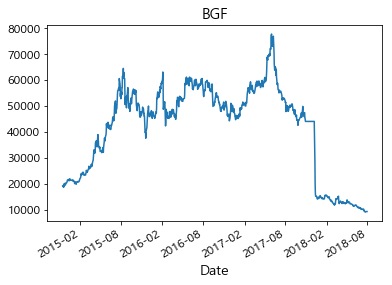

In [171]:
data['027410']['Close'].plot()
plt.title('BGF', fontsize=15)

In [173]:
predictors = [x for x in df.columns if x not in ['Y1','Y2','Y3']]
predictors2 = ['his_vol_7', 'pct_change', 'Volume', 'his_vol_21', 'Open']
target = "Y2"

In [183]:
for i in range(1,2):
    print(i)

1


In [193]:
predictor=predictors
n_time = []
for k in [1,10,100,1000]:
    start = time.time()
    k_time = 0
    for i in raw_data.keys():
        semi_start = time.time()
        alg.set_params(n_estimators=k)
        model, fear_importance, elapse = modelfit(alg, train[i], predictor, target, useTrainCV=False,
                                                  cv_folds=5, early_stopping_rounds=20,
                                                  figure=False, model_report=False)
        pred = model.predict(test[i][predictors])
        semi_elapse = time.time() - semi_start
        k_time += semi_elapse
    n_time.append(k_time)

elapse time : 0.03 sec
elapse time : 0.02 sec
elapse time : 0.02 sec
elapse time : 0.02 sec
elapse time : 0.02 sec
elapse time : 0.02 sec
elapse time : 0.02 sec
elapse time : 0.02 sec
elapse time : 0.02 sec
elapse time : 0.02 sec
elapse time : 0.02 sec
elapse time : 0.02 sec
elapse time : 0.02 sec
elapse time : 0.02 sec
elapse time : 0.03 sec
elapse time : 0.02 sec
elapse time : 0.02 sec
elapse time : 0.02 sec
elapse time : 0.02 sec
elapse time : 0.02 sec
elapse time : 0.02 sec
elapse time : 0.02 sec
elapse time : 0.02 sec
elapse time : 0.02 sec
elapse time : 0.02 sec
elapse time : 0.03 sec
elapse time : 0.03 sec
elapse time : 0.1 sec
elapse time : 0.07 sec
elapse time : 0.05 sec
elapse time : 0.06 sec
elapse time : 0.03 sec
elapse time : 0.02 sec
elapse time : 0.05 sec
elapse time : 0.03 sec
elapse time : 0.04 sec
elapse time : 0.02 sec
elapse time : 0.03 sec
elapse time : 0.03 sec
elapse time : 0.04 sec
elapse time : 0.02 sec
elapse time : 0.02 sec
elapse time : 0.03 sec
elapse time 

elapse time : 0.06 sec
elapse time : 0.07 sec
elapse time : 0.06 sec
elapse time : 0.06 sec
elapse time : 0.07 sec
elapse time : 0.06 sec
elapse time : 0.09 sec
elapse time : 0.09 sec
elapse time : 0.06 sec
elapse time : 0.05 sec
elapse time : 0.06 sec
elapse time : 0.04 sec
elapse time : 0.06 sec
elapse time : 0.06 sec
elapse time : 0.06 sec
elapse time : 0.06 sec
elapse time : 0.06 sec
elapse time : 0.05 sec
elapse time : 0.07 sec
elapse time : 0.06 sec
elapse time : 0.06 sec
elapse time : 0.05 sec
elapse time : 0.06 sec
elapse time : 0.06 sec
elapse time : 0.06 sec
elapse time : 0.06 sec
elapse time : 0.06 sec
elapse time : 0.46 sec
elapse time : 0.33 sec
elapse time : 0.46 sec
elapse time : 0.48 sec
elapse time : 0.48 sec
elapse time : 0.54 sec
elapse time : 0.44 sec
elapse time : 0.56 sec
elapse time : 0.57 sec
elapse time : 0.47 sec
elapse time : 0.45 sec
elapse time : 0.5 sec
elapse time : 0.42 sec
elapse time : 0.73 sec
elapse time : 0.49 sec
elapse time : 0.54 sec
elapse time 

elapse time : 3.06 sec
elapse time : 2.67 sec
elapse time : 1.72 sec
elapse time : 2.89 sec
elapse time : 2.97 sec
elapse time : 3.03 sec
elapse time : 2.82 sec
elapse time : 2.76 sec
elapse time : 2.9 sec
elapse time : 2.84 sec
elapse time : 2.86 sec
elapse time : 2.86 sec
elapse time : 3.14 sec
elapse time : 3.04 sec
elapse time : 2.84 sec
elapse time : 2.45 sec
elapse time : 2.19 sec
elapse time : 2.87 sec
elapse time : 3.02 sec
elapse time : 2.96 sec
elapse time : 3.21 sec
elapse time : 3.14 sec
elapse time : 3.05 sec
elapse time : 2.82 sec
elapse time : 2.91 sec
elapse time : 3.0 sec
elapse time : 2.91 sec
elapse time : 3.01 sec
elapse time : 3.07 sec
elapse time : 3.01 sec
elapse time : 3.07 sec
elapse time : 3.06 sec
elapse time : 2.78 sec
elapse time : 2.74 sec
elapse time : 3.18 sec
elapse time : 6.31 sec
elapse time : 4.26 sec
elapse time : 3.06 sec
elapse time : 3.18 sec
elapse time : 2.08 sec
elapse time : 3.36 sec
elapse time : 2.96 sec
elapse time : 2.91 sec
elapse time :

In [195]:
a = n_time.copy()

In [196]:
a

[6.580358505249023, 14.702659130096436, 91.21238255500793, 573.4146108627319]

In [198]:
predictor=predictors2
n_time = []
for k in [1,10,100,1000]:
    start = time.time()
    k_time = 0
    for i in raw_data.keys():
        semi_start = time.time()
        alg.set_params(n_estimators=k)
        model, fear_importance, elapse = modelfit(alg, train[i], predictor, target, useTrainCV=False,
                                                  cv_folds=5, early_stopping_rounds=20,
                                                  figure=False, model_report=False)
        pred = model.predict(test[i][predictor])
        semi_elapse = time.time() - semi_start
        k_time += semi_elapse
    n_time.append(k_time)

elapse time : 0.02 sec
elapse time : 0.01 sec
elapse time : 0.01 sec
elapse time : 0.01 sec
elapse time : 0.01 sec
elapse time : 0.01 sec
elapse time : 0.01 sec
elapse time : 0.01 sec
elapse time : 0.01 sec
elapse time : 0.01 sec
elapse time : 0.01 sec
elapse time : 0.01 sec
elapse time : 0.01 sec
elapse time : 0.01 sec
elapse time : 0.01 sec
elapse time : 0.01 sec
elapse time : 0.01 sec
elapse time : 0.01 sec
elapse time : 0.01 sec
elapse time : 0.01 sec
elapse time : 0.01 sec
elapse time : 0.01 sec
elapse time : 0.01 sec
elapse time : 0.01 sec
elapse time : 0.01 sec
elapse time : 0.01 sec
elapse time : 0.01 sec
elapse time : 0.01 sec
elapse time : 0.01 sec
elapse time : 0.01 sec
elapse time : 0.01 sec
elapse time : 0.01 sec
elapse time : 0.01 sec
elapse time : 0.01 sec
elapse time : 0.01 sec
elapse time : 0.01 sec
elapse time : 0.01 sec
elapse time : 0.01 sec
elapse time : 0.01 sec
elapse time : 0.01 sec
elapse time : 0.01 sec
elapse time : 0.01 sec
elapse time : 0.01 sec
elapse time

elapse time : 0.03 sec
elapse time : 0.03 sec
elapse time : 0.03 sec
elapse time : 0.03 sec
elapse time : 0.03 sec
elapse time : 0.03 sec
elapse time : 0.03 sec
elapse time : 0.03 sec
elapse time : 0.03 sec
elapse time : 0.03 sec
elapse time : 0.03 sec
elapse time : 0.03 sec
elapse time : 0.03 sec
elapse time : 0.03 sec
elapse time : 0.03 sec
elapse time : 0.03 sec
elapse time : 0.04 sec
elapse time : 0.03 sec
elapse time : 0.03 sec
elapse time : 0.03 sec
elapse time : 0.03 sec
elapse time : 0.03 sec
elapse time : 0.03 sec
elapse time : 0.03 sec
elapse time : 0.03 sec
elapse time : 0.03 sec
elapse time : 0.04 sec
elapse time : 0.2 sec
elapse time : 0.18 sec
elapse time : 0.21 sec
elapse time : 0.2 sec
elapse time : 0.21 sec
elapse time : 0.21 sec
elapse time : 0.21 sec
elapse time : 0.2 sec
elapse time : 0.21 sec
elapse time : 0.21 sec
elapse time : 0.21 sec
elapse time : 0.22 sec
elapse time : 0.21 sec
elapse time : 0.2 sec
elapse time : 0.22 sec
elapse time : 0.23 sec
elapse time : 0

elapse time : 1.63 sec
elapse time : 1.28 sec
elapse time : 1.87 sec
elapse time : 1.8 sec
elapse time : 2.01 sec
elapse time : 1.81 sec
elapse time : 1.74 sec
elapse time : 1.8 sec
elapse time : 1.6 sec
elapse time : 1.73 sec
elapse time : 1.78 sec
elapse time : 1.78 sec
elapse time : 1.78 sec
elapse time : 1.73 sec
elapse time : 1.63 sec
elapse time : 1.58 sec
elapse time : 1.76 sec
elapse time : 1.75 sec
elapse time : 1.79 sec
elapse time : 1.81 sec
elapse time : 1.79 sec
elapse time : 1.68 sec
elapse time : 1.7 sec
elapse time : 1.72 sec
elapse time : 1.76 sec
elapse time : 1.74 sec
elapse time : 1.78 sec
elapse time : 1.75 sec
elapse time : 1.76 sec
elapse time : 1.78 sec
elapse time : 1.59 sec
elapse time : 1.76 sec
elapse time : 1.76 sec
elapse time : 1.81 sec
elapse time : 1.74 sec
elapse time : 1.63 sec
elapse time : 1.74 sec
elapse time : 1.76 sec
elapse time : 1.41 sec
elapse time : 1.8 sec
elapse time : 1.74 sec
elapse time : 1.79 sec
elapse time : 1.78 sec
elapse time : 1.

In [202]:
b = n_time.copy()

In [239]:
a

[6.580358505249023, 14.702659130096436, 91.21238255500793, 573.4146108627319]

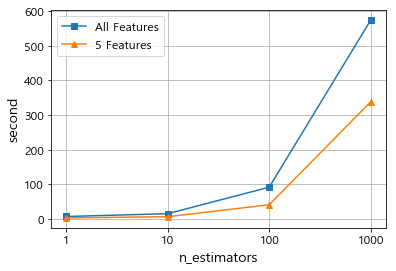

In [251]:
fig, ax = plt.subplots()
ax.plot(['1','10','100','1000'], a, label='All Features', marker='s')
ax.plot(['1','10','100','1000'], b, label='5 Features', marker='^')
ax.set_xlabel("n_estimators")
ax.set_ylabel("second")
plt.grid(True)
plt.legend(fontsize=12, fancybox=True)
plt.show()